# **ER 131 Final Project: Predicting County-Level Climate Beliefs**

> **Note on how to read/navigate this document:** 
> * Project section headings (i.e. abstract, project background, etc) are in **BOLD AND CAPS** 
<br>

# **ABSTRACT**

**Background:**
Global warming is one of the most pressing issues we face today, but it is also one of the most divisive issues in America. People disagree if it is harming us, if it will ever harm us, how emissions and resources should be regulated, or if global warming even exists. Knowing how people’s opinions are changing is necessary to allocating resources, whether they be educational, financial, or political. 
<br><br>
**Methods:**<br>
I looked into predicting people’s opinions concerning climate change and climate change policy by US county. To accomplish this, I used income and poverty factors, past extreme environmental events, past voting trends, and more to predict climate change beliefs for a future year via 5 regression techniques: Lasso Regression and Ridge Regression, K Nearest Neighbors, Decision Trees, and Gradient Boosting. For each of the 3 specific climate change beliefs I investigated, I selected the best performing model to use to predict beliefs for the year 2021, given that the climate change beliefs in question are not surveyed every year. 

**Learnings:** <br>
Our modeling process, including feature selection and modeling selection, revealed that one of the best predictors for climate change beliefs is past voting patterns. Specifically, the percent support for a Democratic House or Presidential candidate were among the two most important features. I also learned just how important data provenance and integrity is, as compiling data sets at such a large scale (national) and geographic specificity (county-level) was a challenging process. Lastly, I use the results to recommend increased advertising and messaging spending in the Midwest. 


# **PROJECT BACKGROUND**

This background explains 
* existing literature on Americans’ perceptions of climate change (which motivates the data I looked for + the challenge of this prediction problem), 
* existing quantitative data on Americans’ climate opinions
* the value that the prediction model adds.

**Existing Literature** <br>
Generally, climate change has failed to garner the political and attention that most scientists argue it merits. While it certainly impacts Americans economically, the long-term time horizons of these impacts reduce public urgency around the issue; projected future impacts don’t feel as urgent and are easier to sweep aside. Additionally, misinformation campaigns from oil and gas interests, combined with rising distrust in institutions, have eroded public belief in the science behind climate change and potential policy approaches.

Communication and climate researchers have analyzed drivers of people’s attitudes towards climate change. For many Americans, their attitudes are closely-tied to political beliefs:  in 1997, when the Clinton administration discussed the Kyoto Protocol, Democrats reported increased support for climate policy which was counteracted by decreased support from Republicans [(Krosnick, Holbrook, Visser, 2020)](https://pprg.stanford.edu/wp-content/uploads/2000-The-impact-of-the-fall-1997-debate-about-global-warming-on-a.pdf).
<br><br>Beyond politics, experiencing natural disasters (which climate change can worsen), can also change someone’s beliefs. However, experiencing events of global warming, like harsh natural disasters or droughts, only increases someone’s support for climate policy if it aligns with their world view (i.e. only if you already believe in climate change is associated with these events) or if they connect the natural disaster to climate change. Otherwise, humans are “remarkably good” at finding other ways to explain away these phenomena. Among natural events and environmental factors, extreme heat increases support for climate action most drastically, compared to other events than precipitation.
<br><br>**Takeaway from literature**<br>All of this literature illustrates the wide variety of factors that go into predicting climate policy—even the same information (experiencing natural disasters, receiving information about climate change) can produce different impacts based on other factors (political support, trust in institutions, worldview). 
<br><br><br>**Current Data**<br>
For politicians looking to craft climate policy and campaign messaging, understanding where the constituents stand is essential. Currently, the Yale Center for Climate Communication (YCCC) surveys Americans on climate beliefs. They provide a comprehensive, county-level view on a variety of climate-related attitudes. Other news and polling outlets (i.e. CNN, Pew, etc.) conduct polls as well, but not with the same scope and annual nature of YCCC. However, while YCCC conducts the survey in spring of each year, the results are only made available in September.  <br><br>
This timeline drives the need for the quantitative analysis: political campaigns can’t use data released in September to inform campaigns when an election is in November. Most campaigns, especially at a local level, start up in December to February. To get county-level data on their own, a campaign would have to conduct its own polling, which is expensive, time-consuming, and possibly inaccurate for campaigns without statistical experts. The high barriers to accessing climate opinion data could sway campaigns against focusing on this important political issue.
<br><br>
**Value Add:** <br>
However, the quantitative analysis can provide the benefit of public opinion data without the cost. This has benefits to a variety of stakeholders. Campaigns gain a rough understanding of public perception on various climate policies, which can inform outreach and advertising dollars. Voters (possible) gain better representation, as candidates can form policy positions based on data, rather than select conservations with constituents or lobbyists. Community organizers can use the analysis to guide creation of initiatives and funding allocation. Lastly, the model could lead to environmental benefits: since Americans as whole tend to support climate policy more strongly than individual Americans expect, the analysis could empower candidates to take on more climate-friendly stances.
<br><br>
**Background summary**: lots of factors influence what people think about climate change. Current polling provides data that is too late (i.e. provided in Sept/Nov) or too small in scope (i.e. not county-level). I hope the model can predict climate change beliefs in a timely manner for political campaigns.

# **PROJECT OBJECTIVE**

**Purpose**: The purpose of this project is to train models that predict county-level climate beliefs, as defined by the percentage of people in a county who respond "yes" to (1) "do you support setting CO2 limits on coal-fired power plants" (2)"are you worried about climate change", and (3) do you believe climate change will harm the US" using data from prior years (i.e. if I was predicting for 2016, I'd use data from 2015 and before). 

**Resource Allocation**: While the answers to this question are published by the Yale Center for Climate Communication, they are only published towards the end of each year (2016, 2018, 2020, etc.) making the results inacessible and unusable for politicans and their campaigns trying to use data to inform their campaign. This model aims to make climate belief data accessible at the start of the year. This would allow campaigns to plan advertising campaigns, focus on certain locations for climate town halls, plan out their climate stances, potentially object to lobbysists (and focus resources on talking to consisutents) because they know their own community's support for climate-related policies.

At the end of this project, when I predict values for 2021, I'll discuss specifics of how the results impact campaign resource allocation for 2022 races.





### Importing Packages and Setting Up Collab

In [91]:
# Run this cell and follow the prompts to stream content from your Google Drive to this notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import re
!pip install geopandas
import geopandas as gpd
from geopandas import GeoDataFrame

In [93]:
# Change the working directory to the project. Make sure your shared project folder lives in your Google Drive.

import os
os.getcwd()
#make sure you have the folder (ER 131 project) not in any subfolder and just generically in your drive.
# that will allow all of us to access this from the same filepath
os.chdir('/content/drive/My Drive/ER 131 Project')
os.getcwd()


'/content/drive/My Drive/ER 131 Project'

# **INPUT DATA DESCRIPTION**

## Data sets in the project
> 
**Target**
1.    Yale climate communication climate opinion data
**Features**
2.    Election data
3.  Extreme heat data
4.  Unemployment data 
5.  Employment breakdown by industry
6. Presidential speech transcripts
7.  County population totals
8.  Educational attainment
9. Number of fossil-fueled power plants per county
10.  Median household income and poverty estimates


**Motivation behind the data chosen** Any dataset needed to have a nation-wide scope, ideally at the county level, and have the desired time range (to predict 2016, 2018, 2020 results with a time lag). This restricted us to primarily demographic data, as climate/environmental-specific data (i.e. EV adoption), didn't have the scope needed. I discuss some of the limitation these data requirements impose in the interpretations/conclusion section.



**Descriptions included for each dataset** 
1. **Origins**: The origins of your data. Where did you get the data? How were the data collected from the original sources?
2. **SGSTF**: The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data. To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time. At a minimum, use some basic methods (.head, .loc, and so on) to provide support for the descriptions you provide for SGSTF.
3. **Target/Feature**You should also describe which data fields you will use as your target variables, and which you will use as features.
4. **Environmental Justice** I also analyze each dataset based on the justice frameworks discussed in class  (i.e. what info might be excluded, how easy is it to access, etc.), just to state/be aware of these concepts as it relates to the data.


# **Data Source 1: Yale Climate Communications Data (YCOMM)**
From [Yale Center on Climate Communications](https://climatecommunication.yale.edu/visualizations-data/ycom-us/)






In [94]:
ycomm_14 = pd.read_csv("https://gallery.mailchimp.com/78464048a89f4b58b97123336/files/YPCCC_County_n28_2015Jan5.csv",encoding='latin-1')
ycomm_16 = pd.read_csv("https://gallery.mailchimp.com/78464048a89f4b58b97123336/files/a27175d9-a983-4f4c-a101-115086d86eae/YCOM_2016_Data.01.csv")
ycomm_18 = pd.read_csv("https://gallery.mailchimp.com/78464048a89f4b58b97123336/files/73c0b22c-19b3-4712-b5e3-a69ff3567c35/YCOM_2018_Data.csv", encoding="latin-1")
ycomm_20 = pd.read_csv("data/YCOM_2020_Data.csv", encoding='latin-1')

In [95]:
#contains data by national, state, county, congressional district, and metro regions
ycomm_16["GeoType"].unique()

array(['National', 'State', 'County', 'cd113', 'CBSA'], dtype=object)

Define a function to return rows with Na Values

In [96]:
#no missing values for desired values
def find_na_rows(df):
  """returns table with rows that have NaN value)"""
  is_NaN = df.isnull()
  row_has_NaN = is_NaN.any(axis=1)
  #rows_with_NaN = df[row_has_NaN]
  return df[row_has_NaN]

find_na_rows(ycomm_16[["CO2limits", "worried", "harmUS"]])

Empty DataFrame
Columns: [CO2limits, worried, harmUS]
Index: []

In [97]:
#example of what county looks like
ycomm_18[ycomm_18["GeoType"]=="County"].head()

GeoType                  GeoName  ...  mediaweekly  mediaweeklyOppose
52  County  Autauga County, Alabama  ...       17.977             80.654
53  County  Baldwin County, Alabama  ...       20.694             77.999
54  County  Barbour County, Alabama  ...       16.276             82.001
55  County     Bibb County, Alabama  ...       17.284             81.341
56  County   Blount County, Alabama  ...       18.272             80.696

[5 rows x 59 columns]

1. **Origins** This data, which indicates the result of climate opinion surveys at a county-level, was provided through the Yale Program on Climate Communication, which studies climate opinion and messaging. In each given year, they conduct a survey on a variety of climate-related topics, which is reflected in this map. After conducting a survey of over 25,000 households, they use a statistical model (specifically, “multilevel regression with post stratification”) to get the final output. The results of this statistical model are cross-validated and compared to results of other independent, local-level surveys conducted in various states, and third-party survey data.
 
2. **Data integrity**
> **Structure:** This data is stored as a CSV. There is a separate CSV for each year, where each row represents a given geographic area (i.e. a given county) and each column is the percentage of respondents who answered in a given way. The question wording and meaning of each response is included in the meta-data.<br> <br>
> **Granularity:** Each record represents a given geographic area, and the percent of respondents who answered in a certain way. Some records capture granularity at a state-level, but I isolate records which capture granularity at a county-level. While there isn’t explicit aggregation, it’s important to note that results were based on a combination of survey responses and modeling off of those responses—so there could be some aggregation in how certain responses were used to model for other areas. I don’t need to do any additional aggregation. <br><br>
> **Scope:** The dataset contains a row for every county in the 50 states, and there is data for 2014, 2016, 2018, and 2020. Because these are results, there are no missing values (and I ultimately use these counties as a reference for other datasets to decide if counties are "missing"). <br><br>
> **Temporality:** Each year indicates the year in which the survey was conducted. I don’t have any funky timestamps because each year is given as its own csv. I don’t know the exact date that each survey was conducted, but that shouldn't’ have much of an impact on the data or the modeling. <br><br>
> **Faithfulness:** I believe data is trustworthy  first because of the reputation of the Yale Center on Climate Communication, whose results have been published in academic papers. Additionally, they have detailed the extensive steps taken to ensure their data is valid (i.e. cross-validation, comparison with other surveys). 
 
3. I use this 2016, 2018, and 2020 data for target variables. In each year, I isolate 3 specific response columns (“are you worried about climate change”, “do you support CO2 limits on power plants” and “do you think climate change will harm people in the US”). These represent questions that were asked in all surveys across time, and represents what I'm trying to predict. <br> However, I also use survey data from the prior survey as a feature for the next survey (i.e. to predict "harmUS" in 2016, I use "harmUS" in 2014)

4. **EJ**: Accessing this data was quite easy (through the website). The survey and overall results were compiled by academics and perhaps one could question whether people at a community organizing level might have prioritized other questions in this survey (i.e. justice implication in who got to say which questions/data was worth collecting).  

# **Data Source 2a: Election Data (from MIT Election Data Science Lab)**
[MIT Election Data Science Lab](https://electionlab.mit.edu/data)


In [98]:
pres_elections = pd.read_csv("data/countypres_2000-2020.csv")


In [99]:
pres_elections.head()

year    state state_po  ... totalvotes   version   mode
0  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
1  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
2  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
3  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
4  2000  ALABAMA       AL  ...    56480.0  20191203  TOTAL

[5 rows x 12 columns]

In [100]:
#getting a rough sense of how many counties there are
len(pres_elections["county_fips"].unique())

3156

In [101]:
pres_elections["year"].unique()

array([2000, 2004, 2008, 2012, 2016, 2020])

In [102]:
#looking for missing values
a =find_na_rows(pres_elections)[["county_name", "year","party", "candidatevotes", "totalvotes"]]
a[(a["party"]=="DEMOCRAT") & (a["year"]!=2020)]

county_name  year     party  candidatevotes  totalvotes
7188         KANSAS CITY  2000  DEMOCRAT             NaN         0.0
12452  STATEWIDE WRITEIN  2000  DEMOCRAT             NaN         0.0
12453       MAINE UOCAVA  2000  DEMOCRAT             NaN         0.0
12454   FEDERAL PRECINCT  2000  DEMOCRAT             NaN         0.0
21806  STATEWIDE WRITEIN  2004  DEMOCRAT             NaN         0.0
21807       MAINE UOCAVA  2004  DEMOCRAT             NaN         0.0
21808   FEDERAL PRECINCT  2004  DEMOCRAT             NaN         0.0
31157  STATEWIDE WRITEIN  2008  DEMOCRAT             NaN         0.0
31158       MAINE UOCAVA  2008  DEMOCRAT             NaN         0.0
31159   FEDERAL PRECINCT  2008  DEMOCRAT             NaN         0.0
40508  STATEWIDE WRITEIN  2012  DEMOCRAT         39366.0     74045.0
40509       MAINE UOCAVA  2012  DEMOCRAT          2071.0     74045.0
40510   FEDERAL PRECINCT  2012  DEMOCRAT             NaN     74045.0
49178            BEDFORD  2016  DEMOCRAT             NaN         0.0
49859  STATEWIDE WRITEIN  2016  DEMOCRAT             NaN      5056.0
49860       MAINE UOCAVA  2016  DEMOCRAT          3017.0      5056.0
49861   FEDERAL PRECINCT  2016  DEMOCRAT           637.0      5056.0
50028        DISTRICT 99  2000  DEMOCRAT             NaN         0.0
50152        DISTRICT 99  2004  DEMOCRAT             NaN         0.0
50275        DISTRICT 99  2008  DEMOCRAT             NaN         0.0
50398        DISTRICT 99  2012  DEMOCRAT             NaN     74045.0
50521        DISTRICT 99  2016  DEMOCRAT           274.0      5056.0

1. **Origins**: I found county-level presidential election data from MIT’s Election Data Science Lab. They collected the data using publicly-available data on election results in each county from 2000-2020, and compiled it into a single CSV for every county in the US. 

2. **Data integrity**
> **Structure**: Data is stored in a single CSV, which contains columns for the county, year, candidate, party, number of votes for a given candidate, and total votes in the county. It does not include an explicit column for the proportion of votes going to a given candidate, which I must add.<br><br>
> **Granularity**: Data is aggregated at the county level. Each row represents a vote for a given candidate in a given county in a given year for a presidential election (i.e. for the 2020 election, there is a row for Joe Biden in County X, Donald Trump in County Y, and other 3rd party candidates in County X). Since county-level election returns are already available, the data was not manipulated or aggregated. I do not have to aggregate additionally, because I want to use county-level data. All records are captured at the same level of granularity (county-level). <br><br>
> **Scope**: This covers the entire 50 states from 2000-2020 in presidential elections only. Looking at missing values, it seems like most of the missing values are for years out of the concern (2000-2008), or in districts that I eventually drop (i.e. I drop Alaska, which contains District 99), or for non-county data (i.e. federal precinct, Maine Uocava represents represents overseas service members). **for the most part, it doesn't seem like the missing values represent county data, but rather other categories of data (some exceptions: i.e. Bedford County in 2016)** <br><br> 
> **Temporality**: Each year represents the year of the presidential election. Time is only represented in years, and since presidential elections happen every 4 years, it would be easy to tell if records were entered incorrect((which they weren’t), because we’d see a year like 2017. I don’t have to worry about funky timestamps, because all I care about is the year, which are all entered in the same format <br><br>
> **Faithfulness**: Since presidential election data is publicly available and released, I don’t have concerns about falsified data. Additionally, the reputation of MIT university research gives us additional confidence in the validity of this data. There are some candidates for whom the data says receive 98%+ of the vote in a county. This seemed exceptionally large, but I examined the same county in previous elections and found that these tend to be smaller counties which leaned heavily towards one party— so while I thought these values were exceptionally large, I did additional fact checking to make sure the data did not have errors. <br><br> 

3. This data is used as a feature: for a given county, we’ll use presidential election data (i.e. proportion for a democratic candidate) as a feature to predict opinions on climate change.

4. **EJ**: Easy to access and information is quite objective, so no EJ considerations in this dataset. You could argue that voting rights and access to the ballot influence the results that I see in this dataset. 

# **Data Source 2b: Midterm Election Data (from Dave Leip’s Atlas of US Election** 

[Dave Leip Atlas](https://library.princeton.edu/resource/4962)


In [103]:
house_election_df_dict = {2014:"house_election_2014", 2016:"house_election_2016",2018:"house_election_2018",2020:"house_election_2020",}
for key in house_election_df_dict:
  df_name = str("house_election_") + str(key)
  file_path = str("data/House_Election_Data_")+str(key)+str(".xlsx")
  house_election_df_dict[key] = pd.read_excel(file_path, sheet_name="County")

In [104]:
house_election_df_dict[2018]
#notice how the last row is labeled "T" indicating Total ==> 
#so I have state total summary rows and county level data


#and I see the NA values for Alaska

Unnamed: 0 Unnamed: 1  ...  Unnamed: 52        LSAD_TRANS
0                     NaN        NaN  ...          NaN               NaN
1                 Autauga         AL  ...          NaN            County
2                 Baldwin         AL  ...          NaN            County
3                 Barbour         AL  ...          NaN            County
4                    Bibb         AL  ...          NaN            County
...                   ...        ...  ...          ...               ...
3448  Wrangell-Petersburg         AK  ...          NaN       Census Area
3449  Wrangell-Petersburg         AK  ...          NaN       Census Area
3450              Yakutat         AK  ...          NaN  City and Borough
3451        Yukon-Koyukuk         AK  ...          NaN       Census Area
3452               Alaska          T  ...          NaN               NaN

[3453 rows x 54 columns]

In [105]:
#number of states (the extra 3 reflects Puerto Rico, DC, and "T" for total)
len(house_election_df_dict[2018]["Unnamed: 1"].unique())

53

Looking for more missing values in states besides "AK" (we're seeing that there are a lot of "spacing rows" on the excel which shows up as rows of all NaN. I also have missing values for Puerto Rico). Important to note for cleaning.

In [106]:
find_na_rows(house_election_df_dict[2018][house_election_df_dict[2018]["Unnamed: 1"]!="AK"][["Unnamed: 0","Democratic", "Republican"]])

Unnamed: 0  Democratic  Republican
0             NaN         NaN         NaN
69            NaN         NaN         NaN
112           NaN         NaN         NaN
129           NaN         NaN         NaN
206           NaN         NaN         NaN
...           ...         ...         ...
3335      Yabucoa         NaN         NaN
3336        Yauco         NaN         NaN
3337  Puerto Rico         NaN         NaN
3338          NaN         NaN         NaN
3452       Alaska         NaN         NaN

[136 rows x 3 columns]

1. This data source provides county-level midterm election data (i.e. for House races). While some sources provide county-level data for some states, this provides county-level House election results across the United States. According to the metadata, these are compiled using primary sources, such as reports from election agencies (Board of Election or Secretary of State). So the values are taken from publicy-available sources in charge of election data, and compiles them into an easily-accessible format.


2. **Data integrity**
> **Structure**: For each election year (2014, 2016, etc.), there is a CSV that includes each county in a state and the proportion of votes in that county going to the republican and democrat candidate. The data is cleanly organized into rows. The data includes other columns besides proportions that are not relevant to the project.<br><br>
> **Granularity**: Each record represents a given county in a given election year. Almost all records capture granularity at the county-level, however the data also includes summaries for each state (i.e. aggregation at a state-level for proportion of votes going to each party). I do not need to aggregate further beyond this. <br><br>
> **Scope**: There is available for elections going back to 1992. I are using data from 2014-2020. While it covers almost every county, I do not have data for Alaskan counties (NaN values), as well as a few random counties in certain years (i.e. Tulsa county in 2018) and for Puerto Rico (not relevant to us). <br><br>
> **Temporality**: Each year represents the year an election happened. Each CSV is for a specific year, so I don’t have specific date/time fields in the data, only in the original CSV download. <br><br>
> **Faithfulness**: Since this data is compiled from primary sources, I have confidence in its values. This atlas is also offered as a library resource at numerous colleges/universities, which give us additional confidence in its trustworthiness.

3. This data is used as a feature: for a given county, we’ll use midterm election data (i.e. proportion for a democratic candidate) as a feature to predict opinions on climate change.

4. **EJ:** Dataset is accessed through university libraries, so there is a barirer to access there. Hoqever, information is quite objective, so no EJ considerations there. Like previously, you could argue that voting rights and access to the ballot influence the results that I see in this dataset. 


# **Data Source 3: Extreme Heat Data**

> Data comes from CDC Environmental Public Health Tracking: https://ephtracking.cdc.gov/DataExplorer/#/


In [107]:
extreme_heat = pd.read_csv("data/2019_heat.csv")
extreme_heat.head(2)

StateFIPS  ...                             Heat Metric
0          1  ...  Heat Metric: Daily Maximum Temperature
1          1  ...  Heat Metric: Daily Maximum Temperature

[2 rows x 10 columns]

In [108]:
extreme_heat["Year"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [109]:
#DC included, HI, AK not
len(extreme_heat["State"].unique())

49

In [110]:
# no NA values for counties in the dataset. however, not all counties in US are in this (i.e. not AK, HI)
find_na_rows(extreme_heat[["County", "Value"]])

Empty DataFrame
Columns: [County, Value]
Index: []


1. **Origins** This dataset of extreme heat events by county was found at the CDC’s EPH (Environmental Public Health) tracking database. It provides a database of environmental measures. This specific dataset depicts extreme heat data, defined as 2 or more consecutive days where the daily maximum temperatures exceeded the county’s 90th percentile. Temperature data is primarily taken from sensors, although some is modeled using the North American Land Data Assimilation System. The percentile values (i.e. for the 90th percentile) are taken from 1979-2016 data. County-level estimates of temperature are taken by processing model data, since there isn’t a single sensor point that encompasses an entire county. Importantly, these metrics are only taken in summer months (May-Sept), since extreme heat likely won’t occur outside of those months (but if it did, it wasn’t included in this data)
2. **Data integrity**
> **Structure**: Data is given in a CSV. Each row represents a county, and column include a year and the value of the metric (i.e. # of extreme heat events). <br><br>
> **Granularity**: Each row represents a county, and column include a year and the value of the metric (i.e. # of extreme heat events). While the values themselves were not aggregated, some of the temperature values used to calculate the number of extreme heat events were taken from a model, which aggregated data points from different locations in the county. I do not have to aggregate further, since this is already at a county-level<br><br>
> **Scope**: The data covers years from 1979-2019. Only extreme heat events in May-Sept are included. All states except Alaska and Hawaii are included. There are no missing values **for counties listed in the dataset**. However, not every county is included (the vast majority are, but CDC mentions they do not have data required to collect this metric for every single county).   <br><br>
> **Temporality**: Dates are represented in a column that describes the year of each data point. Like previous data sets, I don’t have to worry about funky time stamps. <br><br>
> **Faithfulness**: Since this data comes from the CDC, I have confidence in its faithfulness. One could question the model (North American Land Data Assimilation System) used for some values, but since this model is used by government scientists and academics, I believe it’s trustworthy. <br><br>

3. This data is used as a feature: for a given county, we’ll use extreme heat data as a feature to predict opinions on climate change.

4. **EJ**: Only barrier to access was knowing this dataset exists. Otherwise, navigating and downloading information was very easy, and information is quite objective so I don't need to worry about info being distorted. 


# **Data Source 4: Unemployment Data by County** 

> Data comes from [Bureau of Labor Statistics](https://www.bls.gov/lau/#tables)

In [111]:
unemp_df_dict = {2014:"unemp_2014", 2015:"unemp_2015", 2016:"unemp_2016", 2017:"unemp_2017",
                 2018:"unemp_2018", 2019: "unemp_2019", 2020:"unemp_2020"}
#read in data                 
for year in unemp_df_dict:
  file_path = str("data/laucnty")+str(year)[-2:] + str(".xlsx")
  unemp_df_dict[year] = pd.read_excel(file_path, header=4)

In [112]:
#we're seeing some spacing rows (all NaN) that I will need to clean
unemp_df_dict[2017]

Code  Code.1  Code.2  ... Employed  Unemployed   (%)
0                    NaN     NaN     NaN  ...      NaN         NaN   NaN
1        CN0100100000000     1.0     1.0  ...  24858.0      1040.0   4.0
2        CN0100300000000     1.0     3.0  ...  87994.0      3844.0   4.2
3        CN0100500000000     1.0     5.0  ...   7800.0       498.0   6.0
4        CN0100700000000     1.0     7.0  ...   8142.0       385.0   4.5
...                  ...     ...     ...  ...      ...         ...   ...
3218     CN7215100000000    72.0   151.0  ...   7512.0      1488.0  16.5
3219     CN7215300000000    72.0   153.0  ...   8409.0      1751.0  17.2
3220                 NaN     NaN     NaN  ...      NaN         NaN   NaN
3221  SOURCE:  BLS, LAUS     NaN     NaN  ...      NaN         NaN   NaN
3222      April 16, 2021     NaN     NaN  ...      NaN         NaN   NaN

[3223 rows x 10 columns]

In [113]:
#county coverage is high (includes PR)
len(unemp_df_dict[2017]["County Name/State Abbreviation"].unique())

3220

In [114]:
#so there are no missing values for counties in this dataset.
find_na_rows(unemp_df_dict[2017][["County Name/State Abbreviation", "(%)"]])

County Name/State Abbreviation  (%)
0                               NaN  NaN
3220                            NaN  NaN
3221                            NaN  NaN
3222                            NaN  NaN

1. **Origins**: This data from the Bureau of Labor Statistics (BLS) lists average yearly unemployment rates by county for each year from 1990 to 2020. To calculate unemployment rates, BLS sends out surveys monthly that are used to calculate unemployment rate, and then uses internal modeling to project unemployment by county. Over the course of each year, BLS averages this data to find yearly unemployment averages.

2. **Data Integrity**
> **Structure**: Data is given in an XLS (CSV) file. Each year is given in its own file. Data is separated in rows for each county. <br><br>
> **Granularity**: Each row represents a county in a given year, and all represents granularity at this county level. Inherently, data is aggregated at a county-level, which could hide sectoral trends (i.e. if unemployment among, say, women is exceptionally high). Additional aggregation is not desirable. <br><br>
> **Scope**: This covers all states in the United States from 1979-2020, with one data point for each county in each year. Based on the number of unique counties, it seems like this ocntains every single county in the US (which is consistent with other BLS statistic tables) <br><br> 
> **Temporality**: The only date/time factor I deal with is year. Since each data table corresponds to a certain year, I don’t have a year column, but instead identify the year using the name of each data table. <br><br>
> **Faithfulness**: BLS is the go-to resource for labor statistics—it’s entire job is to calculate accurate unemployment statistics, so I have full confidence in this data. <br><br>

3. This data is used as a feature: for a given county, we’ll use unemployment as a feature to predict opinions on climate change.

4. **EJ:** Easy to access and information is quite objective. Potentially the unemployment averages could hide beneath-the-surface changes (i.e. it doesn't capture if unemployment spiked for one group, but fell for another). However, overall there aren't EJ concerns with this dataset.


#**Data Source 5: Employment by industry**

> Data is from [Census](https://data.census.gov/cedsci/table?q=United%20States&t=Industry&g=0100000US%240500000&y=2019&tid=ACSST1Y2019.S2404)

In [115]:
ind_df_dict = {2014:"ind_2014", 2015:"ind_2015", 2016:"ind_2016", 2017:"ind_2017",
                 2018:"ind_2018", 2019: "ind_2019"}

for year in ind_df_dict:
  file_path = str("data/emp_by_ind_")+str(year) + str(".csv")
  ind_df_dict[year] = pd.read_csv(file_path, header=1)

In [116]:
#already seeing the missing values at a county level (DeKalb)
ind_df_dict[2018].head()

id  ... Margin of Error!!Percent Female MOE!!Full-time, year-round civilian employed population 16 years and over!!Public administration
0  0500000US01003  ...                                                9.3                                                                              
1  0500000US01015  ...                                               12.9                                                                              
2  0500000US01043  ...                                               13.9                                                                              
3  0500000US01049  ...                                                  N                                                                              
4  0500000US01051  ...                                               14.6                                                                              

[5 rows x 272 columns]

In [117]:
#clearly not enough for a row per county
len(ind_df_dict[2018]["Geographic Area Name"].unique())

890

In [118]:
#Seeing how many STATES are included (ensuring a row per state)
a = ind_df_dict[2018]
cond_a = a["Geographic Area Name"].str.contains("County", case=False)
cond_b = a["Geographic Area Name"].str.contains("Alaska", case=False)
cond_c = a["Geographic Area Name"].str.contains("Parish", case=False)
cond_d = a["Geographic Area Name"].str.contains("City", case=False)
cond_e = a["Geographic Area Name"].str.contains("Puerto Rico", case=False)

#eliminating all the rows above and seeing how many states
print(len(a[~(cond_a|cond_b|cond_c|cond_d|cond_e)]))
a[~(cond_a|cond_b|cond_c|cond_d|cond_e)].head()



51


id  ... Margin of Error!!Percent Female MOE!!Full-time, year-round civilian employed population 16 years and over!!Public administration
108  0500000US11001  ...                                                3.3                                                                              
838     0400000US01  ...                                                3.0                                                                              
840     0400000US04  ...                                                2.3                                                                              
841     0400000US05  ...                                                3.2                                                                              
842     0400000US06  ...                                                0.9                                                                              

[5 rows x 272 columns]

In [119]:
#no missing for states
find_na_rows(a[~(cond_a|cond_b|cond_c|cond_d|cond_e)])

Empty DataFrame
Columns: [id, Geographic Area Name, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining!!Agriculture, forestry, fishing and hunting, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining!!Agriculture, forestry, fishing and hunting, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining!!Mining, quarrying, and oil and gas extraction, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining!!Mining, quarrying, and oil and gas extraction, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Construction, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Construction, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Manufacturing, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Manufacturing, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Wholesale trade, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Wholesale trade, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Retail trade, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Retail trade, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Transportation and warehousing, and utilities, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Transportation and warehousing, and utilities, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Transportation and warehousing, and utilities!!Transportation and warehousing, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Transportation and warehousing, and utilities!!Transportation and warehousing, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Transportation and warehousing, and utilities!!Utilities, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Transportation and warehousing, and utilities!!Utilities, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Information, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Information, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing, Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing!!Finance and insurance, Margin of Error!!Total MOE!!Full-time, year-round civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing!!Finance and insurance, Estimate!!Total!!Full-time, 

1. **Origins**: This data from the Census Bureau provides employment by sector and demographic for different states and counties (i.e. % of people in a state working in the arts). To collect this data, This data is collected using surveys mailed to a random sample of addresses (approximately 295,000 addresses a month). For non-respondents, ACS follows up with a personal visit to ensure completion. The responses to this data, combined with statistics from other government agencies, are combined to provide the dataset listed above.

2. **Data Integrity**
> **Structure**: Data is provided in a CSV download, where each year is in a separate CSV. The data is already given in rows, and columns include total workforce per state and number of people working in certain industries (i.e. mining, arts, IT, etc.) <br><br>
> **Granularity**: Data can be accessed at both the state and county level. However, the county-level granularity does not include every county, so I opted for state-level data. This data was aggregated by the census bureau after receiving survey results from each subsection of the state. Each record represents a state. <br><br>
We will want to aggregate this somewhat by summing employment in “extractive” industries (i.e. people working in mining, forestry, etc) to find the proportion of workforce in each county that works in an extractive industry. Additionally, because of lack of county-level data (there isn't a row for every county, but rather only some counties), I will aggregate at a state level. <br><br>
> **Scope**: There is data for all 50 states from at least 2005 to 2019. the project only uses data from 2014 onwards. There are no missing values for each state, however there are missing values at the county-level. Given the methodology (survey sent to random addresses), there are limits to how accurate the data can be (i.e. it can’t capture every single person). However, there are no missing years or states, which is why I feel confident in aggregating at a state level. <br><br>
> **Temporality**: The only date/time factor I deal with is year. Since each data table corresponds to a certain year, I don’t have a year column, but instead identify the year using the name of each data table.<br><br>
> **Faithfulness**: Like BLS, the Census Bureau’s job is to produce accurate statistics. While there could be some noise if people lie on their survey response, I have confidence in the source of this data. Looking at the data, I don’t see any violations of obvious dependency (i.e. number of workers being larger than population in the county) that would lead us to question this data.


3. This data is used as a feature: for a given county, we’ll use employment by extractive industries (as specific above in "Granularity") as a feature to predict opinions on climate change.<br><br>

4. **EJ:** Very similar to previous table. Easy to access and information is quite objective. Potentially the employment numbers could hide beneath-the-surface changes (i.e. it doesn't capture types of people in each job). However, for the way the model uses this data, there aren't EJ concerns with this dataset.

#**Data Source 6: Presidential Speech Data**

> [Transcript of official scripts of presidents speeches](https://www.kaggle.com/littleotter/united-states-presidential-speeches/version/1?select=presidential_speeches.csv)



In [120]:
pres_speeches = pd.read_csv("data/presidential_speeches.csv")
pres_speeches.head(3)


Date  ...                                                URL
0  1789-04-30  ...  https://millercenter.org/the-presidency/presid...
1  1789-10-03  ...  https://millercenter.org/the-presidency/presid...
2  1790-01-08  ...  https://millercenter.org/the-presidency/presid...

[3 rows x 7 columns]

In [121]:
min(pres_speeches["Date"]), max(pres_speeches["Date"])

('1789-04-30', '2019-09-25')

In [122]:
#to get a sense of what is being discussed
pres_speeches.tail(10)["Speech Title"].unique()

array(['Statement on the School Shooting in Parkland, Florida',
       'Remarks at the Conservative Political Action Conference',
       'Remarks on Combating the Opioid Crisis',
       'Speech at the Veterans of Foreign Wars National Convention',
       'Address at the 73rd Session of the United Nations General Assembly',
       'Remarks about the US Southern Border',
       'State of the Union Address',
       'Speech Declaring a National Emergency',
       'Remarks at the United Nations General Assembly',
       'Press Conference'], dtype=object)

In [123]:
#look for msot recent
pres_speeches.tail(3)


Date  ...                                                URL
989  2019-02-15  ...  https://millercenter.org/the-presidency/presid...
990  2019-09-24  ...  https://millercenter.org/the-presidency/presid...
991  2019-09-25  ...  https://millercenter.org/the-presidency/presid...

[3 rows x 7 columns]

1. This data set includes transcripts from official presidential speeches and press conferences. Most transcripts were accessed from the Miller Center, an affiliate of the University of Virginia that does research and archival work on American politics. The Miller Center keeps records of official presidential speeches/communication and their transcripts, and this data table compiles them. 
2. **Data integrity**
> **Structure**: Table given as a CSV with predefined rows, where each row is a given speech. Columns include date, president, party, transcript and url of transcript for each speech.<br><br>
> **Granularity**: Each row represents an official presidential speech—this means that more informal remarks from presidents (i.e. press conferences, interviews, speeches at a campaign rally) are not included. All rows are captured at this level, and there is no aggregation. I will aim to aggregate mentions of certain words by year.<br><br>
> **Scope**: The data table includes all official presidential speeches from 1792 to 2019. For the period of interest (2010 onwards), there are certainly no missing values or speeches. However, it might be worth noting that things like tweets, which are certainly a form of communication that people see, are not recorded in here. So this table does not capture the full range of presidental communication. <br><br>
> **Temporality**: Temporality is represented by dates of each speech. All dates represented in a YYYY-MM-DD format, and in extracting the year from this date column I ensured that there were no strange values for years (i.e. if a certain date was written in DD-MM-YYYY, I would have identified that; although I didn’t find any such dates).<br><br>
> **Faithfulness**: Especially for the period of interest, where there is recording and transcripts of almost everything a president does, I are confident that this dataset includes the proper transcript of all official presidential speeches. Additionally, its connection with the Miller Center gives us additional confidence in the original creator of the information that this dataset uses. <br><br>

3. This data is used as a feature: for a given year (and for all counties in that year), we’ll use the number of times a keyword is mentioned in a speech as a feature to predict opinions on climate change.

4. **EJ** Accessing this data (i.e. finding out that it existed) and being able to extract useful information from it was harder (because there was so much to parse through). Additionally, it was created by presidential scholars/academics, so there is an inherent excclusion in terms of the people who compiled this.


#**Data Source 7: County Population Totals**

> From the [US Census Bureau](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-counties-total.html)

In [124]:
# read in raw df
population_county = pd.read_csv("data/population_data.csv", encoding='latin-1')
population_county = population_county.loc[:, 'STNAME':'POPESTIMATE2020']
population_county.head()

STNAME         CTYNAME  ... POPESTIMATE2019  POPESTIMATE2020
0  Alabama         Alabama  ...         4907965          4921532
1  Alabama  Autauga County  ...           55769            56145
2  Alabama  Baldwin County  ...          223565           229287
3  Alabama  Barbour County  ...           24657            24589
4  Alabama     Bibb County  ...           22313            22136

[5 rows x 15 columns]

In [125]:
# confirm that number of observations is approximately what is expected (one for each county)
len(population_county)
len(population_county['CTYNAME'].unique()) #duplicate counties exist, just in different states so not actually duplicates
len(population_county['STNAME'].unique())

51

In [126]:
# check for null/NaN values
population_county.isnull().sum().sum()

0

1. This data from the US Census Bureau provides estimates of county population totals from the years 2010-2020. These values are estimates of the number of residents, based on the most recent decennial census data and factoring in births, deaths, and migrations. The Census Bureau utilizes a “vintage” method in which the release of a new year’s estimates includes a re-release of previous years’ estimates with improved methodology and input data. 
2. Data integrity
> **Structure**: Table given as a CSV with predefined rows, where each row is a given county. Columns include state name, county name, 2010 Census population observation, and population estimates for years 2011-2020. <br><br>
> **Granularity**: Each row represents a county, and columns include a year and the value of the population estimate. While estimates of population by age, sex, and race are created through a top-down aggreagate approach, the total population estimates at the county level are not aggregated. I do not have to aggregate further, since this is already at a county-level. <br><br>
> **Scope**: The Census Bureau offers data dating back to 1900, but the data table I pulled includes all US counties from 2010-2020. For the period of interest (2010 onwards), there are certainly no missing values or speeches. <br><br> 
> **Temporality**: The only date/time factor I deal with is year. I identify the year of the population estimate using the name of each column. <br><br>
> **Faithfulness**: The Census Bureau’s job is to produce accurate statistics. While there is some uncertainty in the population values given that they are estimates, I have confidence in the source of this data. Looking at the data, I don’t see any violations of obvious dependency that would lead us to question this data.

3. This data is used as a feature: for a given year (and for all counties in that year), we’ll use the population of a county as a feature to predict opinions on climate change.

4. **EJ**: Disenfranchised groups and undocumented citizens are less likely to respond to these surveys and thus might be undercounted. However, accessing this data was not hard, as it is through the census, which most people have heard about.
 


#**Data Source 8: Educational Attainment**

> From the [US Census Bureau](https://data.census.gov/cedsci/table?t=Educational%20Attainment&g=0100000US%240500000&tid=ACSST5Y2014.S1501)

In [127]:
# read in data
edu14 = pd.read_csv(f"data/education_2014.csv")
edu14.columns = edu14.iloc[0]
edu14 = edu14.drop([0])
edu14.head()

0              id  ... Female!!Margin of Error!!PERCENT IMPUTED!!Educational attainment
1  0500000US01001  ...                                                (X)              
2  0500000US01003  ...                                                (X)              
3  0500000US01005  ...                                                (X)              
4  0500000US01007  ...                                                (X)              
5  0500000US01009  ...                                                (X)              

[5 rows x 230 columns]

In [128]:
# check that number of rows approximately equal to number of counties expected
len(edu14['Geographic Area Name'].unique())

3220

In [129]:
# check for NaN values
edu14.isnull().sum().sum()
find_na_rows(edu14)

Empty DataFrame
Columns: [id, Geographic Area Name, Total!!Estimate!!Population 18 to 24 years, Total!!Margin of Error!!Population 18 to 24 years, Total!!Estimate!!Less than high school graduate, Total!!Margin of Error!!Less than high school graduate, Total!!Estimate!!High school graduate (includes equivalency), Total!!Margin of Error!!High school graduate (includes equivalency), Total!!Estimate!!Some college or associate's degree, Total!!Margin of Error!!Some college or associate's degree, Total!!Estimate!!Bachelor's degree or higher, Total!!Margin of Error!!Bachelor's degree or higher, Total!!Estimate!!Population 25 years and over, Total!!Margin of Error!!Population 25 years and over, Total!!Estimate!!Population 25 years and over!!Less than 9th grade, Total!!Margin of Error!!Population 25 years and over!!Less than 9th grade, Total!!Estimate!!Population 25 years and over!!9th to 12th grade, no diploma, Total!!Margin of Error!!Population 25 years and over!!9th to 12th grade, no diploma, Total!!Estimate!!Population 25 years and over!!High school graduate (includes equivalency), Total!!Margin of Error!!Population 25 years and over!!High school graduate (includes equivalency), Total!!Estimate!!Population 25 years and over!!Some college, no degree, Total!!Margin of Error!!Population 25 years and over!!Some college, no degree, Total!!Estimate!!Population 25 years and over!!Associate's degree, Total!!Margin of Error!!Population 25 years and over!!Associate's degree, Total!!Estimate!!Population 25 years and over!!Bachelor's degree, Total!!Margin of Error!!Population 25 years and over!!Bachelor's degree, Total!!Estimate!!Population 25 years and over!!Graduate or professional degree, Total!!Margin of Error!!Population 25 years and over!!Graduate or professional degree, Total!!Estimate!!Percent high school graduate or higher, Total!!Margin of Error!!Percent high school graduate or higher, Total!!Estimate!!Percent bachelor's degree or higher, Total!!Margin of Error!!Percent bachelor's degree or higher, Total!!Estimate!!Population 25 to 34 years, Total!!Margin of Error!!Population 25 to 34 years, Total!!Estimate!!Population 25 to 34 years!!High school graduate or higher, Total!!Margin of Error!!Population 25 to 34 years!!High school graduate or higher, Total!!Estimate!!Population 25 to 34 years!!Bachelor's degree or higher, Total!!Margin of Error!!Population 25 to 34 years!!Bachelor's degree or higher, Total!!Estimate!!Population 35 to 44 years, Total!!Margin of Error!!Population 35 to 44 years, Total!!Estimate!!Population 35 to 44 years!!High school graduate or higher, Total!!Margin of Error!!Population 35 to 44 years!!High school graduate or higher, Total!!Estimate!!Population 35 to 44 years!!Bachelor's degree or higher, Total!!Margin of Error!!Population 35 to 44 years!!Bachelor's degree or higher, Total!!Estimate!!Population 45 to 64 years, Total!!Margin of Error!!Population 45 to 64 years, Total!!Estimate!!Population 45 to 64 years!!High school graduate or higher, Total!!Margin of Error!!Population 45 to 64 years!!High school graduate or higher, Total!!Estimate!!Population 45 to 64 years!!Bachelor's degree or higher, Total!!Margin of Error!!Population 45 to 64 years!!Bachelor's degree or higher, Total!!Estimate!!Population 65 years and over, Total!!Margin of Error!!Population 65 years and over, Total!!Estimate!!Population 65 years and over!!High school graduate or higher, Total!!Margin of Error!!Population 65 years and over!!High school graduate or higher, Total!!Estimate!!Population 65 years and over!!Bachelor's degree or higher, Total!!Margin of Error!!Population 65 years and over!!Bachelor's degree or higher, Total!!Estimate!!POVERTY RATE FOR THE POPULATION 25 YEARS AND OVER FOR WHOM POVERTY STATUS IS DETERMINED BY EDUCATIONAL ATTAINMENT LEVEL!!Less than high school graduate, Total!!Margin of Error!!POVERTY RATE FOR THE POPULATION 25 YEARS AND OVER FOR WHOM POVERTY STATUS IS DETERMINED BY EDUCATIONAL ATTAINMENT LEVEL!!Less than hi

1. This data from the US Census Bureau provides estimates of various measures of educational attainment based on the American Community Survey. The particular values of interest are proportion of individuals with only a high school diploma or equivalent and proportion of individuals with a bachelor’s degree or higher in the subpopulations of 18-24 year olds and 25 year olds and older. Like wider census data, this data is created through a survey (American Community Survey) and modeling.
2. Data integrity
> **Structure**: Table given as a CSV with predefined rows, where each row is a given county. Columns include geographic area name (county and state), estimates of various quantifications of educational attainment, and their respective margins of error. <br><br>
> **Granularity**: Each row represents a county, and columns include a proportion value. Because the underlying observations are a survey and not a census, the Census Bureau aggregates responses and statistically transforms observations to come up with estimates at the county level. I do not have to aggregate further, since this is already at a county-level. <br><br>
> **Scope**: The Census Bureau offers data from every 5-year ACS period as well as 1-year estimates. Because the educational attainment values of interest to us (proportions) are omitted from the 1-year estimates, the scope is limited to every 5-year period, particularly 2014 and 2019. <br><br>
> **Temporality**: The only date/time factor I deal with is year. I identify the year of the educational estimate based on the year of the table, since each year’s data is contained in a separate file. <br><br>
> **Faithfulness**: The Census Bureau’s job is to produce accurate statistics. While there is some uncertainty in the educational attainment proportions given that they are estimates, I have confidence in the source of this data. Looking at the data, I don’t see any violations of obvious dependency that would lead us to question this data. <br><br>

3. This data is used as a feature: for a given year (and for all counties in that year), we’ll use the educational attainment of a county as a feature to predict opinions on climate change.

4. **EJ** Like the prior dataset, this from the census. So disenfranchised groups and undocumented citizens are less likely to respond to these surveys and thus might be undercounted. However, accessing this data was not hard, as it is through the census, which most people have heard about.


#**Data Source 9: Number of Fossil Fueled Power Plants**

> From the [EIA](https://www.eia.gov/electricity/data/eia860/)

In [130]:
# read in data
power_plants = pd.read_excel(f"data/power_plants_2014.xlsx", sheet_name="Operable")
power_plants.columns = power_plants.iloc[0]
power_plants = power_plants.drop([0])
power_plants.head()

0 Utility ID  ... Switch Between Oil and Natural Gas?
1          7  ...                                   N
2          8  ...                                   N
3         21  ...                                   N
4         21  ...                                   N
5         25  ...                                   N

[5 rows x 72 columns]

In [131]:
# keep relevant columns
power_plants = power_plants[["State", "County", "Technology"]]
power_plants.head()

0 State      County               Technology
1    IL       Macon  Conventional Steam Coal
2    IN  Tippecanoe  Conventional Steam Coal
3    OK    Le Flore  Conventional Steam Coal
4    OK    Le Flore  Conventional Steam Coal
5    NY       Yates  Conventional Steam Coal

In [132]:
# look for NA rows or incomplete information
find_na_rows(power_plants)

Empty DataFrame
Columns: [State, County, Technology]
Index: []

In [133]:
# check number of counties included, should be less than total number of counties in the US
len(power_plants['County'].unique())

1542

In [134]:
# find unique types of generation technology
power_plants['Technology'].unique()

array(['Conventional Steam Coal', 'Conventional Hydroelectric',
       'Petroleum Liquids', 'Natural Gas Fired Combined Cycle',
       'Other Waste Biomass', 'Natural Gas Fired Combustion Turbine',
       'Natural Gas with Compressed Air Storage',
       'Natural Gas Internal Combustion Engine', 'Nuclear',
       'Natural Gas Steam Turbine', 'Onshore Wind Turbine', 'All Other',
       'Landfill Gas', 'Municipal Solid Waste', 'Geothermal',
       'Hydroelectric Pumped Storage', 'Batteries', 'Solar Photovoltaic',
       'Wood/Wood Waste Biomass', 'Other Gases', 'Other Natural Gas',
       'Petroleum Coke', 'Coal Integrated Gasification Combined Cycle',
       'Solar Thermal without Energy Storage',
       'Solar Thermal with Energy Storage', 'Flywheels'], dtype=object)

1. This data from the EIA provides generator-level specific information about existing and planned generators and associated environmental equipment at electric power plants with 1 megawatt or greater of combined nameplate capacity. Because the data is clearly delineated into currently operating plants and also what type of generation each plant uses for each year, the data can be transformed to represent the number of fossil fuel power plants per county in the US.
2. Data integrity
> **Structure**: Table given as a CSV with predefined rows, where each row is one generator facility. Columns include county name, state abbreviation, name of facility, type of generation, nameplate capacity, and more. <br><br>
> **Granularity**: Each row represents one generation plant, with supplemental column information about what county it resides in. This means I have to aggregate further, grouping by county name to get a value that represents the number of plants at the county-level. <br><br>
> **Scope**: The EIA offers data for every year dating back to 1990. the scope is limited to the years from 2014 to 2019. Geographically, the data contains information from power plants across the entirety of the US. <br><br>
> **Temporality**: The only date/time factor I deal with is year. I identify the year of the power plant information based on the year of the table, since each year’s data is contained in a separate file. <br><br>
> **Faithfulness**: The EIA’s job is to produce accurate information. While there is some uncertainty in how exactly the data for each power plant is collected with this survey form, I have confidence in the source of this data. Looking at the data, I don’t see any violations of obvious dependency that would lead us to question this data.
3. This data is used as a feature: for a given year (and for all counties in that year), we’ll use the number of fossil fueled power plants in a county as a feature to predict opinions on climate change.

4. **EJ** While this dataset contains information relevant about EJ (i.e. power plants per county), the project doesn't use this information to solve an EJ-specific problem. In terms of access, not everyone has heard of EIA so finding this data could inaccessible. However, I don't think any EJ-relevant information was excluded from this or that understanding this data is difficult / hard to access. 


#**Data Source 10: Median Household Income and Poverty Estimate**

> From the [US Census Bureau](https://www.census.gov/data/datasets/2019/demo/saipe/2019-state-and-county.html)




In [135]:
# read in data
mhi_pov = pd.read_excel('data/est15all.xls', header=3)
mhi_pov.head()
# can immediately see that national and state level data is included alongside county level data

State FIPS Code  County FIPS Code  ... 90% CI Lower Bound.8 90% CI Upper Bound.8
0                0                 0  ...                 22.5                 23.1
1                1                 0  ...                 28.1                 30.7
2                1                 1  ...                    .                    .
3                1                 3  ...                    .                    .
4                1                 5  ...                    .                    .

[5 rows x 31 columns]

In [136]:
# confirm number of rows is approximately equal to total number of counties (with ~50 extra)
len(mhi_pov)

3194

In [137]:
# select relevant columns to check for missing values
mhi_pov = mhi_pov[["Name", "Poverty Estimate, All Ages", "Median Household Income"]]
find_na_rows(mhi_pov)

Empty DataFrame
Columns: [Name, Poverty Estimate, All Ages, Median Household Income]
Index: []

1. This data from the [US Census Bureau](https://www.census.gov/data/datasets/2019/demo/saipe/2019-state-and-county.html) provides estimated demographic data related to income and poverty as part of the Small Area Income and Poverty Estimates (SAIPE) Program. Like other census data, this is based on sending out surveys and combining that with modeling to estimate final results.
2. Data integrity
> **Structure**: Table given as an XLSX file with predefined rows, where each row is one geographic area (USA, state, and county). Columns include area name, estimates for number of people living below the poverty line across different age ranges, statistical information about the estimate, and median household income estimate in dollars. <br><br>
> **Granularity**: Different rows represent different geographic scales. The first row represents the entire US, while subsequent rows represent each state followed by its respective counties. This means I have to drop national and state rows to retain only county-level data.<br><br>
> **Scope**: The US Census Bureau offers annual estimates as part of the SAIPE Program. the scope is limited to the years from 2014 to 2019, specifically the years 2015, 2017, and 2019. <br><br>
> **Temporality**: The only date/time factor I deal with is year. I identify the year of the income and poverty information based on the year of the table, since each year’s data is contained in a separate file.<br><br>
> **Faithfulness**: The Census Bureau’s job is to produce accurate information. While there is some statistical uncertainty in the estimates, I have confidence in the source of this data especially considering the confidence intervals provided for each estimate. Looking at the data, I don’t see any violations of obvious dependency that would lead us to question this data.
3. This data is used as 2 features: for a given year (and for all counties in that year), we’ll use the proportion of population living under the poverty line and median household income as features to predict opinions on climate change.

4. **EJ**: As with any census data, response rate could be a justice issue: marignalized groups and undocumented citizens are either less likely to respond or do not receive the survey—so they might be undercounted in this data. 






# **DATA CLEANING**


> **CONTENTS OF THIS SECTION**:
> * I first detail the high-level approach to NA values (i.e. identifying them, ensuring I don't lose values in merge).  <br>
> * I have 10 data sources. For each I details cleaning + include code. In data source 1 (our target data), I do Step 1 of the NA values strategy. After I merge together one final table, I do Step 2 of the NA values strategy. <br>
> * The section ends with a FINAL TABLE that includes the model-ready data, and a corresponding "Checking for Missing Values in FINAL TABLE"









## **[IMPORTANT] Approach to NA Values**

**Motivation:** Ultimately, I only care about NA values if they represents a feature for a county in the target variable dataset (i.e. if a dataset had missing value for Puerto Rico, I don't care about that NA value). To account for this, I take a 2 step approach to missing values: 


**Steps to check for na/missing/lost values:**
1.   Ensure target data (2016, 2018 and 2020 Yale Climate Communication data) all contain the same counties (**this is done in Data Cleaning > Data Source 1 section**). Merge 2016, 2018, 2020 data together on county. By checking that they have the same counties, I ensure that in this merge of the target data I don't lose any counties.


2.   Proceed with data cleaning for all feature data, and then merge all data together (i.e. left merge the  merged Yale Climate data from above with newly-cleaned feature data). This contains a single dataframe with all the rows target AND corresponding features (and I have checked the target to make sure no rows dropped/ lost / missing in the target. This means every row in the merged dataset is needed for the model)<br><br> At this point, I check for missing values in features (because now, any missing values represent a feature value for a county of interest).**This is done in the "Checking for Missing Values in Final Table" section.**

**Justification of approach:**
Taking this approach (i.e. checking for missing values after the final merge), rather than checking for missing values in each individual table, ensures that I are  efficient in the approach (i.e. I only investigate/check for missing values that would ultimately impact the model, rather than dealing with missing values in each indviidual table that might not be relevant).






# **Data Source 1: Yale Climate Communications Data (YCOMM)**







> **This contains the TARGET data.**  (2016, 2018, 2020 are the targets. However, since I also use prior period survey data as a feature, I include 2014, since 2014 survey data used as a feature for 2016.)

> **Summary of data cleaning for this source**
> *   Read in data into a dictionary
> *   Write and apply function to only extract county-level data
> * Define function to rename future feature columns to match the naming convention of counties in YCOMM data
> * **Step 1 of NA values strategy: ensure that 2016, 2018, 2020 contain same counties** 
> * Write function that takes in the target variable and returns a table with values of that target for each county in each year 
> * Identify that Virginia and Louisiana have varying county naming conventions, so extract Virginia/Louisiana county names for future use
> * Drop rows in Alaska due to lack of data for Alaska in later features





Reading in the data into a dictionary

In [138]:
ycomm_14 = pd.read_csv("https://gallery.mailchimp.com/78464048a89f4b58b97123336/files/YPCCC_County_n28_2015Jan5.csv",encoding='latin-1')
ycomm_16 = pd.read_csv("https://gallery.mailchimp.com/78464048a89f4b58b97123336/files/a27175d9-a983-4f4c-a101-115086d86eae/YCOM_2016_Data.01.csv")
ycomm_18 = pd.read_csv("https://gallery.mailchimp.com/78464048a89f4b58b97123336/files/73c0b22c-19b3-4712-b5e3-a69ff3567c35/YCOM_2018_Data.csv", encoding="latin-1")
ycomm_20 = pd.read_csv("data/YCOM_2020_Data.csv", encoding='latin-1')


ycomm_dict={2014:ycomm_14, 2016:ycomm_16,2018:ycomm_18,2020:ycomm_20}

The 2014 data already includes only counties. However, 2016, 2018, 2020 include counties and states. I need to clean 2016-2020 to only include county level data (and remove state level data).We also want to lower case county names so that county naming is consistent across all datasets to make for easier merging for the eventual features.

**Justification for dropping Alaska**: Since many of the chosen features did not have observations for Alaska, I ultimately decided to exclude Alaska from the scope of the analysis. 

In [139]:
def only_counties(df):
  """get only county data from YCOMM datasets and make county names lower case to make eventual merging
  easier as well. Drop rows in Alaska"""
  if ycomm_14.equals(df):
    df["County"] = df["Countyname"].str.lower()
    #return df
    return df.drop(df[df["County"].str.contains("alaska", na=False)].index, inplace=True)

  df.drop(df[df["GeoType"]!="County"].index, inplace = True)
  df["GeoName"] = df["GeoName"].str.lower()
  df.rename(columns={"GeoName": "County"}, inplace=True)
  return df.drop(df[df["County"].str.contains("alaska", na=False)].index, inplace=True)

#actually apply the functions
for year in ycomm_dict:         
  only_counties(ycomm_dict[year])
  #ycomm_dict[year] = ycomm_dict[year][["County", "CO2limits", "worried", "harmUS"]]

#isolate the target columns I care about
for year in ycomm_dict:
  ycomm_dict[year]=ycomm_dict[year][["County","CO2limits","harmUS","worried" ]]
  #.add_suffix(
    #  "_"+str(year))
  #county_rename = "County" + "_"  +str(year)
  #ycomm_dict[year] = ycomm_dict[year].rename(columns={county_rename:"County"})

#There are some weird indivdiual renaming operations I have to do for certain counties
ycomm_dict[2016].loc[ycomm_dict[2016]["County"].str.contains("do_a ana county, new mexico"),
                     "County"] = "doña ana county, new mexico"
#before 2015, oglala county was known as "shannon county". 
ycomm_dict[2014].loc[ycomm_dict[2014]["County"].str.contains("shannon county, south dakota"),
                     "County"] = "oglala lakota county, south dakota"

def rename_county(df, county_col, state_col):
  """ this functions renames County columns so that it is all lower case 
  and matches the format with the YCOMM data; will make merging easier"""

  df[county_col] = (df[county_col] + " County, " + df[state_col]).str.lower()
  return df


def get_ycomm_data(output):
  """output can be CO2limits, worried, harmUS. This function takes in the name of one of the 
  target columns and returns a table with that target over all relevant years """
  df = ycomm_dict[2016][["County"]]
  for year in ycomm_dict:
    df = df.merge(ycomm_dict[year][["County",output]].rename(columns={output:output+"_"+str(year)}), how="left")
  return df



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Define a function that takes in DF and returns any rows that have NaN values.

In [140]:
def find_na_rows(df):
  """returns table with rows that have NaN value)"""
  is_NaN = df.isnull()
  row_has_NaN = is_NaN.any(axis=1)
  #rows_with_NaN = df[row_has_NaN]
  return df[row_has_NaN]



## Merging TARGET data (i.e. YCOMM 2016, 2018, 2020) after ensuring Counties are identical in each one (**STEP 1 of missing values approach**)

Ensuring that YCOMM 2016, 2018 and 2020 have the same counties. We'll compare 2018 and 2020 to 2016, to see what differences there are (if any). 

In [141]:
#first check (2016-2020 data should have the same number of rows, if they have the same # of counties)
for key in ycomm_dict:
  print (ycomm_dict[key].shape)

(3114, 4)
(3113, 4)
(3113, 4)
(3113, 4)


More robust check: check for discrepancies and then investigate discrepancies further

In [142]:
ycomm_dict[2016][ycomm_dict[2016]["County"] != ycomm_dict[2018]["County"]]

County  CO2limits  harmUS  worried
2464     pennington county, south dakota     61.808  50.094   48.159
2465        perkins county, south dakota     61.033  52.678   49.224
2466         potter county, south dakota     57.843  49.200   46.212
2467        roberts county, south dakota     58.641  58.422   57.566
2468        sanborn county, south dakota     62.730  53.060   51.194
2469  oglala lakota county, south dakota     78.651  70.098   70.102

For each row that Pandas says is difference between 2016 and 2018, I search 2018 for that county and print (to ensure that the county actually is there)

In [143]:
a = ycomm_dict[2016][ycomm_dict[2016]["County"] != ycomm_dict[2018]["County"]]
for cty in a["County"]:
  print(ycomm_dict[2018][ycomm_dict[2018]["County"].str.contains(cty)])

                               County  CO2limits  harmUS  worried
2465  pennington county, south dakota     63.605  51.268   51.316
                            County  CO2limits  harmUS  worried
2466  perkins county, south dakota     62.127  54.614   52.643
                           County  CO2limits  harmUS  worried
2467  potter county, south dakota     59.717  50.402   49.182
                            County  CO2limits  harmUS  worried
2468  roberts county, south dakota     59.564  58.968   58.607
                            County  CO2limits  harmUS  worried
2469  sanborn county, south dakota     62.498  53.404   52.652
                                  County  CO2limits  harmUS  worried
2464  oglala lakota county, south dakota     80.535  70.741   73.429


Do the same for comparing 2016 and 2020

In [144]:
ycomm_dict[2016][ycomm_dict[2016]["County"] != ycomm_dict[2020]["County"]]

County  CO2limits  harmUS  worried
2464     pennington county, south dakota     61.808  50.094   48.159
2465        perkins county, south dakota     61.033  52.678   49.224
2466         potter county, south dakota     57.843  49.200   46.212
2467        roberts county, south dakota     58.641  58.422   57.566
2468        sanborn county, south dakota     62.730  53.060   51.194
2469  oglala lakota county, south dakota     78.651  70.098   70.102

In [145]:
a = ycomm_dict[2016][ycomm_dict[2016]["County"] != ycomm_dict[2020]["County"]]
for cty in a["County"]:
  print(ycomm_dict[2020][ycomm_dict[2020]["County"].str.contains(cty)])

                               County  CO2limits  harmUS  worried
2465  pennington county, south dakota     59.609  52.621   52.989
                            County  CO2limits  harmUS  worried
2466  perkins county, south dakota      61.89  57.633   55.245
                           County  CO2limits  harmUS  worried
2467  potter county, south dakota     57.163  51.593   50.411
                            County  CO2limits  harmUS  worried
2468  roberts county, south dakota     57.329  61.202   60.889
                            County  CO2limits  harmUS  worried
2469  sanborn county, south dakota     60.725  55.134   53.872
                                  County  CO2limits  harmUS  worried
2464  oglala lakota county, south dakota     77.698    72.8   75.712


**SUMMARY:** 2016, 2018, 2020 all have the same number of rows (initial evidence that each has same counties). I examined for difference in counties between 2018 and 2016, and 2020 and 2016—and while Pandas said some rows were different, the searching shows that the counties do in fact match up (i.e. for each of the rows that pandas said was "different", I checked in each table for those counties and those counties appeared.

**CONCLUSION: If I left merge 2016, 2018, 2020 I will not lose counties. This allows us to merge 2016-2020 to create one TARGET table.** 


After cleaning all the features, I will left merge TARGET table with feature data (Step 2 of missing values approach), and then check for missing values. However, I will be **certain** that in this process I have not dropped any counties due to merging

## Dealing with some naming conventions for counties in Louisiana and Virginia

**Example:** YCOMM refers to a certain region as "Assumption Parish." Some datasets refer to the same region as "Assumption County."

Weant to extract parish names because some counties in Louisiana are named "parish" not "county." Having names will help us with reformating county names for merging later.



In [146]:
parish_names = ycomm_dict[2016].loc[ycomm_dict[2016]["County"].str.contains("parish"),
                                    "County"].str.replace("parish, louisiana","")

parish_names.head(2)

1165    acadia 
1166     allen 
Name: County, dtype: object


Some counties in virginia operate as both cities and counties ("considered county for census purposes"). Some datasets refer to a region as "XYZ county" others will call it "XYZ city". Extracting the names of these special counties to help us with renaming later.



In [147]:
#SPECIAL VIRGINIA COUNTY-CITIES THAT ARE NAMED CITIES BUT TREATED AS COUNTIES BY YCOMM
condition_a = ycomm_dict[2016]["County"].str.contains("virginia")
condition_b = ycomm_dict[2016]["County"].str.contains("city")
condition_c = ycomm_dict[2016]["County"].str.contains("county")

#we want a, b, and NOT C (i.e. city in virginia)
virginia_special = ycomm_dict[2016].loc[condition_a & condition_b & ~condition_c ,"County"].str.replace("city, virginia", "")


virginia_special.head(2)

2967    alexandria 
2968       bristol 
Name: County, dtype: object

# **Data Source 2: Election Data**
> Election data comes from 2 datasets: Presidential election by county  and midterm election by county 

>**House Election Data**
>*   Read data for each year into a dictionary
>*   Rename columns and merge state abbreviation with state abbreviation to state full name datatable to get state full name (and then rename county column with state full name to match YCOMM county column
>*Rename counties in Virginia and Louisiana using variables extracted above
>*Make naming for adjustments for a few cities to ensure they match up with YCOMM naming (i.e. adding a tilde)


>**Presidential Election Data**
>*   Read data 
>*   Create a proportion column by dividing votes for a certain party / total votes
>* Rename county column similarly to house election data

>**Functions to collect data**
>* Wrote function to get election data in a certain year
>* Wrote function that takes in election data that you want outputted, and returns a signle data frame with County and desired data (to be used for merging later)


In [148]:
#presidential elections
pres_elections = pd.read_csv("data/countypres_2000-2020.csv")

#midterm elections
house_election_df_dict = {2014:"house_election_2014", 2016:"house_election_2016",2018:"house_election_2018",2020:"house_election_2020",}
for key in house_election_df_dict:
  df_name = str("house_election_") + str(key)
  file_path = str("data/House_Election_Data_")+str(key)+str(".xlsx")
  house_election_df_dict[key] = pd.read_excel(file_path, sheet_name="County")
  
  #so now calling house_election_df_dict[2014] returns data table



In [149]:
#democratic, republican are columns of interest
house_election_df_dict[2018].head()

Unnamed: 0 Unnamed: 1  Total Vote    D  ...  CTY    FIPS  Unnamed: 52  LSAD_TRANS
0        NaN        NaN         NaN  NaN  ...  NaN     NaN          NaN         NaN
1    Autauga         AL     19665.0  2.0  ...  1.0  1001.0          NaN      County
2    Baldwin         AL     77829.0  2.0  ...  3.0  1003.0          NaN      County
3    Barbour         AL      8354.0  2.0  ...  5.0  1005.0          NaN      County
4       Bibb         AL      6859.0  2.0  ...  7.0  1007.0          NaN      County

[5 rows x 54 columns]

**House Election Data**
We have a few things to clean:

1. Remove rows that have NaN values for every single column (note: these were rows that, on Excel, were completely empty (no text at all, not even a county name), but pandas added NaN value to cell (i.e. I are not removing any counties through this)
2. Rename column names to be more intuitive
3. Expand state abbreviation to full name (this will require merging with a state abbreviation to full name data set), and then adjust county column so that the style matches the county name style in YCOMM data.
4. Have to account for small string differences in county naming between YCOMM  and this one. 

In [150]:
#read in state abbreviation to full state name column
state_abbrev = pd.read_csv("data/state abbreviations.csv").rename(columns={"State":"State Name"})

def clean_house_data(df):
  """clean house election data to drop the first NaN row, rename columns, make lower case county name to make easier merge,
   only keep columns with proportions of votes. """
  #drop the first row which contains all NA
  df.drop(0, inplace=True)
  
  df = df.rename(columns={'Unnamed: 0':"County", 'Unnamed: 1':"State", "Democratic":"Prop_democrat", 
                     "Republican":"Prop_republican"})
  df = df[["County", "State", "Prop_democrat", "Prop_republican"]]

  # replace rows where missing data is represented with "-" with nan
  df.loc[df["Prop_democrat"]=="-","Prop_democrat"]=np.nan
  df.loc[df["Prop_republican"]=="-","Prop_republican"]=np.nan

  df["Prop_democrat"] = pd.to_numeric(df["Prop_democrat"])
  df["Prop_republican"] = pd.to_numeric(df["Prop_republican"])

  #merge to translate state abbreviations to full state name (helps with merging with YCOMM data)
  df = df.merge(state_abbrev[["Code","State Name"]], how="left", left_on="State", right_on="Code")


   
  #using rename_county function so I can merge with YCOMM data
  rename_county(df, "County", "State Name")
  #we have to rename certain counties in louisiana whose county name ends in PARISH
  df.loc[df["County"].str.replace("county, louisiana","").isin(parish_names),"County"] = df["County"].str.replace("county", "parish")

  #and certain counties in Virginia whose name ends in CITY
  df.loc[df["County"].str.replace("county, virginia","").isin(virginia_special),"County"] = df["County"].str.replace("county", "city")

  #drop all rows with no county name (these are summary rows for states) )
  df.drop(df[df["County"].isnull()].index, inplace=True)
  #new_dem = "house_prop_dem_" + str(year)
  #new_rep = "house_prop_rep_" + str(year)
  df = df.drop(["State", "State Name", "Code"], axis=1)
  
  #a handful of counties have duplicated (due to some being county-cities, especially in Virginia. 
  #Have to adjust naming to account for that. Fortunately, ordering helps us out (cities come first, then cty)
  city = df[df["County"].duplicated(keep="first") & ~df["County"].str.contains("alaska")].index
  county = df[df["County"].duplicated(keep="last") & ~df["County"].str.contains("alaska")].index

  df.loc[city, "County"] = df.loc[city, "County"].str.replace("county", "city")
  
  #have to make a special adjustment for baltimore
  df.loc[df["County"]=="baltimore city, maryland", "County"] = "baltimore county, maryland"
  df.loc[(df["County"]=="baltimore county, maryland") & (df["Prop_democrat"]>0.7), "County"] = "baltimore city, maryland"


  #and for carson city
  df.loc[df["County"].str.contains("carson city"), "County"] = "carson city, nevada"

  #and dona ana county
  df.loc[df["County"].str.contains("ana county, new mexico"), "County"] = "doña ana county, new mexico"

  
  #and oglala lakota county
  df.loc[df["County"].str.contains("shannon county, south dakota"), "County"] = "oglala lakota county, south dakota"
  
  
  return df
 


#add suffix of year to merged column and apply function
for year in house_election_df_dict:

  new_dem = "Prop_democrat" + str(year)
  new_rep = "Prop_republican" + str(year)
  house_election_df_dict[year] = clean_house_data(house_election_df_dict[year])
  

In [151]:
house_election_df_dict[2018].head(3)

County  Prop_democrat  Prop_republican
0  autauga county, alabama       0.316349         0.681414
1  baldwin county, alabama       0.228437         0.770818
2  barbour county, alabama       0.498204         0.501676

**President Election Data Cleaning**

1. Add a proportion column by dividing votes for a candidate by total votes
2. Rename county column to match naming style of YCOMM

In [152]:
pres_elections.head()

year    state state_po  ... totalvotes   version   mode
0  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
1  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
2  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
3  2000  ALABAMA       AL  ...    17208.0  20191203  TOTAL
4  2000  ALABAMA       AL  ...    56480.0  20191203  TOTAL

[5 rows x 12 columns]

In [153]:
#table only lists the number of votes; I need to add a proportion column
def clean_election(elections_df):
  #add proportion column
  elections_df["prop"] = elections_df["candidatevotes"] / elections_df["totalvotes"]

  #have to change SAINT LOUIS to ST. LOUIS for MINNESOTA
  elections_df.loc[elections_df["county_name"].str.contains("SAINT LOUIS"), "county_name"] = "ST. LOUIS"

  # changing county column to all lower case to make for easier merge later
  rename_county(elections_df, "county_name", "state")
  #PARISH UPDATES
  elections_df.loc[elections_df["county_name"].str.replace("county, louisiana","").isin(parish_names),"county_name"] = elections_df["county_name"].str.replace("county", "parish")
  
  #in special case where I have "city, county", remove "county"
  elections_df["county_name"] = elections_df["county_name"].str.replace("city county", "city")

  #have to make manual adjustment for st. louis county to faciltate merge with YCOMM
  elections_df.loc[elections_df["county_name"].str.contains("st. louis county county"), 
                   "county_name"] = "st. louis county, missouri" 

  elections_df.loc[elections_df["county_name"].str.contains("ana county, new mexico"), "county_name"] = "doña ana county, new mexico"

  #one for st. louis, minnestoa
  elections_df.loc[elections_df["county_name"].str.contains("saint louis county, minnesota"), "county_name"] = "st. louis county, minnesota"



  #make adjustment for counties in virginia ending in CITY
  elections_df.loc[elections_df["county_name"].str.replace("county, virginia","").isin(virginia_special),"county_name"] = elections_df["county_name"].str.replace("county", "city")


  #elections_df["county_name"] = (elections_df["county_name"] + " County, " + elections_df["state"]).str.lower()
  return elections_df
  
pres_elections = clean_election(pres_elections)

Write a function to extract all election data (house or pres) from a certain year

In [154]:
def get_election_data(year, PARTY, elec_type):
  """returns county name and proportion voting for PARTY in YEAR. PARTY MUST BE UPPERCASE. elec_Type can "pres" or "house" """
  renamed = "prop" + "_" + PARTY.lower()[:3] + "_" + elec_type +"_"+ str(year)[-2:]
  if elec_type=="pres":
    df = pres_elections[(pres_elections["year"]==year) & (pres_elections["party"]==PARTY)][["county_name", "prop"]].rename(columns={
        "prop":renamed, "county_name":"County"})
  if elec_type=="house":
    table = house_election_df_dict[year]
    party_col = str("Prop_")+ PARTY.lower()
    df = table[["County", party_col]].rename(columns={party_col:renamed})


  
  return df


#for 2020, democrat
get_election_data(2020, "DEMOCRAT", "pres").head(2)


County  prop_dem_pres_20
50524  autauga county, alabama          0.270184
50527  baldwin county, alabama          0.224090

Write a function that uses previous function (election data from certain year) and  creates a single data table with all election results **across all available years.**

Note: 2020 data isn't extracted because I don't use 2020 data as a feature (bc of lagged predictors)

In [155]:
def merged_election_data(PARTY, elec_type):
  """Returns a single data frame with results for party and elec_type across all years"""
  if elec_type =="house":
    first_yr = 2014
    years = np.arange(2014, 2020, 2)
  if elec_type=="pres":
    #first_yr = 2012
    years = [2012, 2016]

  df = ycomm_dict[2016][["County"]]
  #df = get_election_data(first_yr, PARTY, elec_type)
  for year in years:
    df = df.merge(get_election_data(year, PARTY, elec_type))

  df.drop_duplicates(subset=["County"], keep="first",inplace=True)
  return df

#dem_house = get_election_data(2014, "DEMOCRAT", "house")
#for year in np.arange(2016, 2021, 2):
#  dem_house = dem_house.merge(get_election_data(year, "DEMOCRAT", "house"))
#dem_house.head()



#dem_pres = get_election_data(2012, "DEMOCRAT", "pres")
#dem_pres = dem_pres.merge(get_election_data(year, "DEMOCRAT", "pres"))
#dem_pres.head()
#merged_election_data("DEMOCRAT", "house").head()
merged_election_data("DEMOCRAT", "pres").head(2)





County  prop_dem_pres_12  prop_dem_pres_16
0  autauga county, alabama          0.265878          0.237697
1  baldwin county, alabama          0.215894          0.193856

# **Data Source 3: Extreme Heat Data**

> Data comes from CDC Environmental Public Health Tracking: https://ephtracking.cdc.gov/DataExplorer/#/

> Note that the link above allows you to click on a metric and then values of that metric are extracted (i.e. for us, "Value" column represents # of extreme events per county per year. More details in the data description portion)


> **Overview of cleaning**
>*   Isolate county and value column 
>*   Rename County column to match convention (XYZ county, full state name) of YCOMM data

> **Functions written/used**
>* Function that takes in a year and returns cleaned data from that year only
>* Use a for loop to then merge data from each desired year and output **merged_heat** which contains final output for section


In [156]:
extreme_heat = pd.read_csv("data/2019_heat.csv")
extreme_heat.head(2)

StateFIPS  ...                             Heat Metric
0          1  ...  Heat Metric: Daily Maximum Temperature
1          1  ...  Heat Metric: Daily Maximum Temperature

[2 rows x 10 columns]

In [157]:
#apply function to rename county column to match YCOMM naming convention
rename_county(extreme_heat, "County", "State")

def get_heat_data(year):
  """returns value of extreme heat events in a given year"""

  extreme_heat.loc[extreme_heat["County"].str.replace("county, louisiana","").isin(parish_names),"County"] = extreme_heat["County"].str.replace("county", "parish")

  new_name = "Extreme_Heat_Events" + "_" + str(year)[-2:]


  #make a correction for DC
  extreme_heat.loc[extreme_heat["County"].str.contains("district of"),
                   "County"] = "district of columbia, district of columbia"
  
  #make a correction for baltimore city
  extreme_heat.loc[extreme_heat["County"].str.contains("baltimore city"),
                   "County"] = "baltimore city, maryland"
  
  # and for carson city
  extreme_heat.loc[extreme_heat["County"].str.contains("carson city"), "County"] = "carson city, nevada"

  #and for dona ana county new mexico
  extreme_heat.loc[extreme_heat["County"].str.contains("ana county, new mexico"), "County"] = "doña ana county, new mexico"
  

  #and for certain counties in virginia
  extreme_heat.loc[extreme_heat["County"].str.replace("county, virginia","").isin(virginia_special),"County"] = extreme_heat["County"].str.replace("county", "city")
  #and for st. louis 
  extreme_heat.loc[extreme_heat["County"].str.contains("st. louis city county"), "County"] = "st. louis city, missouri"
  #and for oglala county (formerly known as shannon county)
  extreme_heat.loc[extreme_heat["County"].str.contains("shannon county, south dakota"), "County"] = "oglala lakota county, south dakota"


  #and for lasalle county
  extreme_heat.loc[extreme_heat["County"].str.contains("la salle county, illinois"), "County"] = "lasalle county, illinois"
  return extreme_heat[extreme_heat["Year"]==year][["County","Value"]].rename(columns={"Value": new_name})

#created merged_heat, which contains all heat event values for all available years
merged_heat = get_heat_data(2014)
for year in np.arange(2015,2020):
  merged_heat = merged_heat.merge(get_heat_data(year), how="outer")

merged_heat.head(2)

County  ...  Extreme_Heat_Events_19
0  autauga county, alabama  ...                      33
1  baldwin county, alabama  ...                      27

[2 rows x 7 columns]

# **Data Source 4: Unemployment Data by County** 

> Data comes from Bureau of Labor Statistics https://www.bls.gov/lau/#tables,  scroll down to county tables

> **Overview of cleaning**
>* Isolate columns of interest (County, Year, UE Percent)
>* Remove blank rows that were read in from Excel as Nan
>*Rename columns and match YCOMM county naming convention 

> **Functions Used/Written**:
>* clean_unemployment_data(df) performs all cleaning
>* get_unemployment_data(year) returns data for all counties for a given year 
>* Use for loop to merge data from all years together





In [158]:
unemp_df_dict = {2014:"unemp_2014", 2015:"unemp_2015", 2016:"unemp_2016", 2017:"unemp_2017",
                 2018:"unemp_2018", 2019: "unemp_2019", 2020:"unemp_2020"}
#read in data                 
for year in unemp_df_dict:
  file_path = str("data/laucnty")+str(year)[-2:] + str(".xlsx")
  unemp_df_dict[year] = pd.read_excel(file_path, header=4)

In [159]:
unemp_df_dict[2016].head(3)

Code  Code.1  Code.2  ... Employed  Unemployed  (%)
0              NaN     NaN     NaN  ...      NaN         NaN  NaN
1  CN0100100000000     1.0     1.0  ...  24395.0      1315.0  5.1
2  CN0100300000000     1.0     3.0  ...  84972.0      4806.0  5.4

[3 rows x 10 columns]

In [160]:

def clean_unemployment(df):
  """first I have to rename columns due to the way columns are labeled in excel, which pandas can't interpret. then I drop some NA rows that are also due to spacing in the excel doc"""
  df = df[["County Name/State Abbreviation", "Year", "(%)"]].rename(columns={"County Name/State Abbreviation":"County Name",
                                                                             "(%)":"UE Rate"})
  #Drop first row that has all NaN
  df.drop(0, axis=0)

  #Dropping extraneous rows (i.e. rows where the Year values is NaN. 
  #These are rows with no data entered)
  
  to_drop = df[df["Year"].isnull()].index 
  df.drop(to_drop, axis=0, inplace=True)

  
  df["Year"] = df["Year"].astype(int)
  df["State Abbreviation"] = df["County Name"].str[-2:]
  df["County Name"] = df["County Name"].str[:-3]

  df = df.merge(state_abbrev[["Code","State Name"]], how="left", left_on="State Abbreviation", right_on="Code")

  #washington dc won't work with the abbreviation approach. have to specially rename washington dc to match ycomm
  df.loc[df["State Abbreviation"]=="ia", "County Name"]="district of columbia,"
  df.loc[df["State Abbreviation"]=="ia", "State Name"]="district of columbia"

  
  
  df["County Name"] = (df["County Name"] + " " + df["State Name"]).str.lower()
  #we have to adjust a few more county names to ensure they merge properly with YCOMM at the end


  df.loc[df["County Name"].str.contains("san francisco",na=False), "County Name"] = "san francisco county, california"
  df.loc[df["County Name"].str.contains("broomfield",na=False), "County Name"] = "broomfield county, colorado"
  df.loc[df["County Name"].str.contains("denver",na=False), "County Name"] = "denver county, colorado"
  df.loc[df["County Name"].str.contains("nantucket",na=False), "County Name"] = "nantucket county, massachusetts"
  
  df.loc[df["County Name"].str.contains("ana county, new mexico", na=False), "County Name"] = "doña ana county, new mexico"
  df.loc[df["County Name"].str.contains("philadelphia", na=False), "County Name"] = "philadelphia county, pennsylvania"
  

  #have to adjust for VIRGINIA counties ending in CITY
  df.loc[df["County Name"].str.replace("county, virginia","").isin(virginia_special),"County Name"] = df["County Name"].str.replace("county", "city")

  return df
  
  #you'll notice some NA values. Those are all in Puerto Rico, which I don't need for the model.
for year in unemp_df_dict:
  unemp_df_dict[year] = clean_unemployment(unemp_df_dict[year])



In [161]:
def get_unemployment_data(year):
    """returns all unemployment data for a single year 
    and drops Na value from Puerto Rico data"""
    new_name = "UE_Rate"+"_"+str(year)[-2:]
    unemp_df_dict[year] = unemp_df_dict[year][["County Name","UE Rate"]].rename(columns={
      "UE Rate":new_name, "County Name":"County"}).dropna()
    return unemp_df_dict[year]


merged_unemp = get_unemployment_data(2014)
for year in unemp_df_dict:
  if year ==2014:
    continue
  #print(year)
  get_unemployment_data(year)
  UE_col_name = "UE_Rate"+"_"+str(year)[-2:]
  #print(UE_col_name)
  #print(unemp_df_dict[year].columns)
  df = unemp_df_dict[year][["County", UE_col_name]]
  merged_unemp = merged_unemp.merge(df, how="outer")


In [162]:
merged_unemp.head(2)

County  UE_Rate_14  ...  UE_Rate_19  UE_Rate_20
0  autauga county, alabama         5.8  ...         2.7         4.9
1  baldwin county, alabama         6.1  ...         2.8         5.6

[2 rows x 8 columns]

#**Data Source 5: Employment by industry**

> Data is from  https://data.census.gov/cedsci/table?q=United%20States&t=Industry&g=0100000US%240500000&y=2019&tid=ACSST1Y2019.S2404)

> **Overview of cleaning**
> * Read data into dictionary 
> *Only select STATE records, not COUNTY records (there aren't enough counties to cover every county, so I made this feature state-level)
> * Isolate columns of interest (keep State Name and Total Worker columns; don't need standard error columns)
> * Create a "Prop of People employed in extractive industries" column using workers in ag/forestry/fishing/hunting mining and total workforce
> * Ultimately merge the state level data I are extracting with the county-level rows to create model-ready feature columns.


> **Functions written/used**
> * clean_industry(df) performs all cleaning and creation of desired proportion column
> * get_industry_data(year) returns data for all states for a given year
> * merge_industry_data(year) returns df that has as many rows as counties in YCOMM with relevant data for each county
> * use for loop to merge data from all years together



Reading in data

In [163]:
ind_df_dict = {2014:"ind_2014", 2015:"ind_2015", 2016:"ind_2016", 2017:"ind_2017",
                 2018:"ind_2018", 2019: "ind_2019"}

for year in ind_df_dict:
  file_path = str("data/emp_by_ind_")+str(year) + str(".csv")
  ind_df_dict[year] = pd.read_csv(file_path, header=1)

In [164]:
ind_df_dict[2015].head(2)

id  ... Percent Female!!Margin of Error!!Public administration
0  0500000US01003  ...                                               12.9    
1  0500000US01015  ...                                               10.9    

[2 rows x 272 columns]

In [165]:
def clean_industry_data(df):
  
  """Clean the employment by industry by county and create a new column with prop extraction"""

  df = df.loc[df["Geographic Area Name"].isin(state_abbrev["State Name"]),:]
  
  #keep columns that include a Total Amount OR the Geographic Name (remove unnecessary columns)
  keep_cols = df.columns[df.columns.str.contains("Estimate!!Total!!|Geographic Area Name|Total!!Estimate!!") ] 
  totals = df[keep_cols]
  #renaming columns to be more intuitive
  
  #return totals
  if any(totals.columns.str.contains('Total!!Estimate!!Agriculture, forestry, fishing and hunting, and mining')):
    num = pd.to_numeric(totals['Total!!Estimate!!Agriculture, forestry, fishing and hunting, and mining'])
    denom = pd.to_numeric(totals['Total!!Estimate!!Full-time, year-round civilian employed population 16 years and over'])
  else:
    #return totals
  
    denom = pd.to_numeric(totals['Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over'], errors="ignore")
    totals.rename(columns={'Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining:':
                           'Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining'}, errors="ignore", inplace=True)
    num = pd.to_numeric(totals['Estimate!!Total!!Full-time, year-round civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining'])

  
  totals["Prop Employed in Extraction"] = num/denom
  
  totals["Geographic Area Name"] =  totals["Geographic Area Name"].str.lower()
  totals.rename(columns={"Geographic Area Name":"State Name"},inplace=True)
  return totals[["State Name", "Prop Employed in Extraction"]]



for year in ind_df_dict:
  ind_df_dict[year] = clean_industry_data(ind_df_dict[year])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [166]:
def get_industry_data(year):
  """returns all industry data for a given year"""
  renaming = "Prop_Extraction" + "_"+ str(year)[-2:]
  return ind_df_dict[year].rename(columns={"Prop Employed in Extraction":renaming})


In [167]:
def merge_industry_data(industry_data_year):
  yale_data = ycomm_dict[2016]
  yale_data["State Name"] = yale_data["County"].str.split(",", expand=True)[1].str.lstrip(" ")
  new_name = "State Prop Employed in Extraction_" + str(industry_data_year)
  return yale_data.merge(ind_df_dict[industry_data_year], how="left")[["County", "Prop Employed in Extraction"]].rename(
      columns={"Prop Employed in Extraction": new_name})

#MERGE ALL DATA FROM A GIVEN COUNTY TOGETHER ACROSS YEARS
merged_extractive_data = ycomm_dict[2016][["County"]]
for year in ind_df_dict:
  merged_extractive_data = merged_extractive_data.merge(merge_industry_data(year), how="outer")


merged_extractive_data.head(3)
#for all counties in alabama, value of this data is the same (bc it is state)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


County  ...  State Prop Employed in Extraction_2019
0  autauga county, alabama  ...                                0.012955
1  baldwin county, alabama  ...                                0.012955
2  barbour county, alabama  ...                                0.012955

[3 rows x 7 columns]

#**Data Source 6: Presidential Speech Data**

>* [Transcript of official scripts of presidents speeches](https://www.kaggle.com/littleotter/united-states-presidential-speeches/version/1?select=presidential_speeches.csv)


>**Motivation:** dataset can be used to help differentiate year-to-year differences across all counties (i.e. maybe if a president mentions climate more, it could predict people worrying about it more)

>**Overview of cleaning**
>* Extract year from each data 
>* Create function that allows us to search for keywords in speeches (and returns number of time keyword is said in speech in a year)



>**Functions used/written**
>* get_pres_speeches(years, words) identifies frequency of keywords in different years
>* merged_pres_speeches(years, words) returns dataframe with as many rows as counties in YCOMM with frequency of keyword in each year

In [168]:
pres_speeches = pd.read_csv("data/presidential_speeches.csv")
pres_speeches.head(3)


Date  ...                                                URL
0  1789-04-30  ...  https://millercenter.org/the-presidency/presid...
1  1789-10-03  ...  https://millercenter.org/the-presidency/presid...
2  1790-01-08  ...  https://millercenter.org/the-presidency/presid...

[3 rows x 7 columns]


Convert date to datetime and extract year from each date


In [169]:
pres_speeches["Date"] = pd.to_datetime(pres_speeches["Date"], infer_datetime_format=True)
pres_speeches["Year"]= [date.year for date in pres_speeches["Date"]]
pres_speeches.head(2)

Date  ...  Year
0 1789-04-30  ...  1789
1 1789-10-03  ...  1789

[2 rows x 8 columns]

Functions that extract keywords as desired 

In [170]:
import re

def get_pres_speeches(years, phrases):
  """searches through different years for different phrases and returns
  amount of times each phrase was mentioned in transcript for each year"""
  a =[]
  for year in years:
    just_year = pres_speeches[pres_speeches["Year"]==year]
    
    for phrase in phrases:
      count = 0
      for index in just_year.index:
        # remove puncutation?
        row = pres_speeches.iloc[index]
        count+= len(re.findall(phrase.lower(), row["Transcript"].lower()))
      a.append([str(phrase) + " " + str(year), count])
  
  first = [item[0] for item in a]
  counts = [item[1] for item in a]
  #return counts
  table = pd.DataFrame(columns=first)
  table.loc[0] = counts
  
  df = table.loc[table.index.repeat(len(ycomm_16))]
  return df.apply(pd.to_numeric)






def merged_pres_speeches(years, phrases):
  """merged pres speech data across years into 1 dataframe with county names"""
  values_df = get_pres_speeches(years, phrases).reset_index(drop=True)
  counties_df = ycomm_dict[2016][["County"]].reset_index(drop=True)
  return pd.concat([counties_df, values_df], axis=1)




In [171]:
#we decided on these 2 words because, unlike phrases like "global", these tend to be somewhat limited in their meaning
#i.e. if a president says climate, they're almost definitely talking about this. 
#i.e data taken before covid, so "science" is political discourse largely referred to climate science. 
#(and even if it didn't, refelcted a wider emphasis on "believing science")
merged_pres_speeches([2015, 2017, 2019], ["climate", "science"]).head(2)

County  climate 2015  ...  climate 2019  science 2019
0  autauga county, alabama             4  ...             0             2
1  baldwin county, alabama             4  ...             0             2

[2 rows x 7 columns]

# **Data Source 7: County Population Totals**

> Data from population estimates from 2010 - 2020: https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-counties-total.html

> **Overview of cleaning**
> * Read in data, isolate columns of interest (county, county population)
> * Rename counties to match YCOMM county naming convention




In [172]:
population_county = pd.read_csv("data/population_data.csv", encoding='latin-1')
population_county = population_county.loc[:, 'STNAME':'POPESTIMATE2020']
population_county.head(3)


STNAME         CTYNAME  ... POPESTIMATE2019  POPESTIMATE2020
0  Alabama         Alabama  ...         4907965          4921532
1  Alabama  Autauga County  ...           55769            56145
2  Alabama  Baldwin County  ...          223565           229287

[3 rows x 15 columns]

In [173]:
#DROP STATE TOTAL POPULATION ROWS, ONLY KEEP COUNTY TOTAL ROWS
population_county_cleaned = pd.DataFrame(population_county)
for row in population_county.index:
  if 'County' not in population_county['CTYNAME'][row]:
    population_county_cleaned.drop(index = row, inplace = True)
population_county_cleaned.head(2)

STNAME         CTYNAME  ... POPESTIMATE2019  POPESTIMATE2020
1  Alabama  Autauga County  ...           55769            56145
2  Alabama  Baldwin County  ...          223565           229287

[2 rows x 15 columns]

Rename county in accordance with YCOMM naming convention and remove STATE NAME column (i.e. only keep COUNTY NAME)

In [174]:
county_string_index = 0
for row in population_county_cleaned.index:
  county_string_index = population_county_cleaned['CTYNAME'][row].find('County')
  population_county_cleaned['CTYNAME'][row] = population_county_cleaned['CTYNAME'][row][0:county_string_index]
#population_county_cleaned
rename_county(population_county_cleaned, "CTYNAME", "STNAME")
#population_county_cleaned.head(2)
population_county_ready = population_county_cleaned[['CTYNAME', 'POPESTIMATE2014', 'POPESTIMATE2016','POPESTIMATE2018','POPESTIMATE2020']]
population_county_ready.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


CTYNAME  POPESTIMATE2014  ...  POPESTIMATE2018  POPESTIMATE2020
1  autauga  county, alabama            54922  ...            55533            56145
2  baldwin  county, alabama           199306  ...           218071           229287

[2 rows x 5 columns]

In [175]:
population_county_ready = population_county_cleaned[['CTYNAME', 'POPESTIMATE2014', 'POPESTIMATE2016','POPESTIMATE2018','POPESTIMATE2020']]
population_county_ready.head(2)

CTYNAME  POPESTIMATE2014  ...  POPESTIMATE2018  POPESTIMATE2020
1  autauga  county, alabama            54922  ...            55533            56145
2  baldwin  county, alabama           199306  ...           218071           229287

[2 rows x 5 columns]

# **Data Source 8: Educational Attainment**
> Data from 2014 and 2019 [US Census Bureau ACS](https://data.census.gov/cedsci/table?t=Educational%20Attainment&g=0100000US%240500000&tid=ACSST5Y2014.S1501)

> **Overview of cleaning**
> * Read data
> * Keep percent HS graduate or higher and percent bachelor's degree or higher columns AND rename columns
> * Account for changes in county names between 2014 and 2019 ("Shannon County, South Dakota" was renamed "Oglala Lakota County, South Dakota")
> * Merge 2014 and 2019 data together

> **Functions Used/Written**
> * clean_edu14() reads the 2014 table, keeps and renames relevant columns, and accounts for County name changes
> * clean_edu19() reads the 2019 table, keeps and renames relevant columns
> * Note: because naming conventions of original table changed btwn 2014 and 2019 (i.e. changed from "Total!!Estimate!! to Estimate!!Total!!, separate functions used for 2014 and 2019)





2014 data cleaning:

In [176]:
def clean_edu14():
    """reads the 2014 table, keeps and renames relevant columns, 
    and accounts for County name changes"""
    edu = pd.read_csv(f"data/education_2014.csv")
    #reformat column headers to have descriptive information
    edu.columns = edu.iloc[0]
    edu = edu.drop([0])
    #keep percent HS graduate or higher and percent bachelor's degree or higher columns AND rename columns
    edu = edu[["Geographic Area Name",
               "Total!!Estimate!!High school graduate (includes equivalency)",
               "Total!!Estimate!!Bachelor's degree or higher",
               "Total!!Estimate!!Population 25 years and over!!High school graduate (includes equivalency)",
               "Total!!Estimate!!Percent bachelor's degree or higher"
              ]]
    edu = edu.rename(columns={"Geographic Area Name": "County",
                         "Total!!Estimate!!High school graduate (includes equivalency)": "prop_18_24_HS_14",
                         "Total!!Estimate!!Bachelor's degree or higher": "prop_18_24_BS_14",
                         "Total!!Estimate!!Population 25 years and over!!High school graduate (includes equivalency)": "prop_25_HS_14",
                         "Total!!Estimate!!Percent bachelor's degree or higher": "prop_25_BS_14"
                             })
    #fix county name changes between 2014 and 2019:
    edu.loc[edu["County"] == "Wade Hampton Census Area, Alaska", "County"] = "Kusilvak Census Area, Alaska"
    edu.loc[edu["County"] == "Shannon County, South Dakota", "County"] = "Oglala Lakota County, South Dakota"
    #standardize county names by making all lower case
    edu["County"] = edu["County"].apply(lambda x: x.lower())
    #make percent/proportion columns floats instead of strings
    edu[["prop_18_24_HS_14", "prop_18_24_BS_14", "prop_25_HS_14", "prop_25_BS_14"]] = edu[["prop_18_24_HS_14", "prop_18_24_BS_14", "prop_25_HS_14", "prop_25_BS_14"]].astype(float)
    return edu

2019 data cleaning:

In [177]:
def clean_edu19(low_memory=False):
    """reads the 2019 table, keeps and renames relevant columns"""
    edu = pd.read_csv(f"data/education_2019.csv")
    #reformat column headers to have descriptive information
    edu.columns = edu.iloc[0]
    edu = edu.drop([0])
    #keep percent HS graduate or higher and percent bachelor's degree or higher columns AND rename columns
    edu = edu[["Geographic Area Name",
               "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)",
               "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher",
               "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)",
               "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"
              ]]
    edu = edu.rename(columns={"Geographic Area Name": "County",
                         "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)": "prop_18_24_HS_19",
                         "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher": "prop_18_24_BS_19",
                         "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)": "prop_25_HS_19",
                         "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": "prop_25_BS_19"
                             })

    #standardize county names by making all lower case
    edu["County"] = edu["County"].apply(lambda x: x.lower())
    #make percent/proportion columns floats instead of strings
    edu[["prop_18_24_HS_19", "prop_18_24_BS_19", "prop_25_HS_19", "prop_25_BS_19"]] = edu[["prop_18_24_HS_19", "prop_18_24_BS_19", "prop_25_HS_19", "prop_25_BS_19"]].astype(float)
    return edu

Merge 2014 and 2019 educational attainment data.



In [180]:
cleaned_edu = clean_edu14().merge(clean_edu19(), how="left")
cleaned_edu.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,40,41,42,43,44,46,47,48,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,118,119,122,123,124,125,132,133,134,135,136,137,138,139,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,162,163,164,165,168,169,170,171,174,175,176,177,180,181,182,183,186,187,188,189,192,193,194,195,228,229,230,231,234,235,236,237,238,239,240,241,242,243,244,245,258,260,261,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,290,291,292,293,294,296,297,298,299,300,302,303,304,305,306,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,34

0                   County  prop_18_24_HS_14  ...  prop_25_HS_19  prop_25_BS_19
0  autauga county, alabama              37.7  ...           33.6           26.6
1  baldwin county, alabama              32.3  ...           27.7           31.9
2  barbour county, alabama              35.7  ...           35.6           11.6

[3 rows x 9 columns]

# **Data Source 9: Number of Fossil Fueled Power Plants per County**

> From the [EIA](https://www.eia.gov/electricity/data/eia860/) <br>

> **Cleaning Overview**
> * Read in data (and abbreviation to full name mapping for County name correction)
> * Only select rows where generators use fossil fuels
>  * "Fossil Fueled" includes generation by: 'Conventional Steam Coal', 'Petroleum Liquids', 'Natural Gas Fired Combined Cycle', 'Natural Gas Fired Combustion Turbine', 'Natural Gas with Compressed Air Storage', 'Natural Gas Internal Combustion Engine', 'Natural Gas Steam Turbine', 'Other Gases', 'Other Natural Gas', 'Petroleum Coke', 'Coal Integrated Gasification Combined Cycle'
> *Fix naming issues in certain counties (including parishes in LA, county-cities in VA) so that eventual merge with YCOMM data is smooth
> *Check if any counties from the power plants data set are being dropped when merged with YCOMM data: if county is dropped because of naming issue (eg. missing hyphen in Miami-Dade or missing period in St. Louis), manually amend

> **Functions Used/Written**
> * read_and_format_num_pp(year): reads power plant table for the input year, keeps power plants that use fossil fuels for generation
> * clean_num_pp(num_pp_df, year): selects relevant columns, standardizes county naming, reformats county names to match YCOMM, manually adjusts county names where needed
> * check_missing_counties_num_pp(cleaned_num_pp_df): merges input df with list of county names from YCOMM to see which rows are dropped because of possible county name mismatch


In [179]:
#read in mapping of state abbrevations to full names for later County name correction
state_abbr_mapping = pd.read_csv("data/state_abbr_mapping.csv", names=["State", "Name"])
state_abbr_mapping.head(2)

State     Name
0    AL  Alabama
1    AK   Alaska

Read in datasets and only select rows where generators use fossil fuels.

In [ ]:
def read_and_format_num_pp(year):
  """reads power plant table for the input year, keeps power plants that use fossil fuels for generation"""
  power_plants = pd.read_excel(f"data/power_plants_{year}.xlsx", sheet_name="Operable")
  #make column headers descriptive, remove original 1st row
  power_plants.columns = power_plants.iloc[0]
  power_plants = power_plants.drop([0])
  #keep only power plants that use fossil fuels for generation
  #power_plants["Technology"].unique()
  power_plants = power_plants.loc[(power_plants["Technology"] == 'Conventional Steam Coal') |
                                            (power_plants["Technology"] == 'Petroleum Liquids') |
                                            (power_plants["Technology"] == 'Natural Gas Fired Combined Cycle') |
                                            (power_plants["Technology"] == 'Natural Gas with Compressed Air Storage') |
                                            (power_plants["Technology"] == 'Natural Gas Internal Combustion Engine') |
                                            (power_plants["Technology"] == 'Natural Gas Steam Turbine') |
                                            (power_plants["Technology"] == 'Other Gases') |
                                            (power_plants["Technology"] == 'Other Natural Gas') |
                                            (power_plants["Technology"] == 'Petroleum Coke') |
                                            (power_plants["Technology"] == 'Coal Integrated Gasification Combined Cycle')]
  return power_plants

num_pp_14 = read_and_format_num_pp(2014)
num_pp_15 = read_and_format_num_pp(2015) #keep
num_pp_16 = read_and_format_num_pp(2016)
num_pp_17 = read_and_format_num_pp(2017) #keep
num_pp_18 = read_and_format_num_pp(2018)
num_pp_19 = read_and_format_num_pp(2019) #keep

Extract County column for YCOMM data, assign it to huge (because huge will eventually be the fully merged dataset)

In [181]:
huge = get_ycomm_data("CO2limits")[["County"]]
huge.head()

County
0  autauga county, alabama
1  baldwin county, alabama
2  barbour county, alabama
3     bibb county, alabama
4   blount county, alabama

In [182]:
def clean_num_pp(num_pp_df, year):
  """selects relevant columns, standardizes county naming, reformats county 
  names to match YCOMM, manually adjusts county names where needed"""
  #select relevant columns
  power_plants_2014 = num_pp_df[["State", "County"]]
  #power_plants_2014["uniqueCounties"] = power_plants_2014["State"] + power_plants_2014["County"]
  # len(power_plants_2014["uniqueCounties"].unique()) ***should be 1250 unique counties*** 
  #format state and county names into one column with consistent format
  power_plants_2014 = power_plants_2014.merge(state_abbr_mapping, how="left")
  #make county names lowercase before groupby to avoid issues where same county is read as different because of case differences
  power_plants_2014["County"] = power_plants_2014["County"].apply(lambda x: x.lower())
  power_plants_2014["Name"] = power_plants_2014["Name"].apply(lambda x: x.lower())
  power_plants_2014["County Full"] = power_plants_2014["County"] + " county, " + power_plants_2014["Name"]
  power_plants_2014.at[power_plants_2014["County Full"] == "st louis city county, missouri", "County Full"] = "st louis county, missouri"

  #use regex to match county col format to format in final merge
  fullCounties = huge[["County"]].drop_duplicates(subset=["County"])
  for row in range(len(power_plants_2014)):
    county = power_plants_2014.loc[row, "County"]
    state = power_plants_2014.loc[row, "Name"]
    matcher = fullCounties["County"].str.match(pat = f"(({county})[a-z,.\s]*({state}))")
    fullCounties['Matcher'] = matcher
    # newval = fullCounties.loc[fullCounties['Matcher'] == True, 'County']
    # oldval = power_plants_2014.loc[row, "County Full"]
    test = fullCounties.index[fullCounties['Matcher'] == True].tolist()
    if len(test) != 0:
      newval = fullCounties["County"][test[0]]
      oldval = power_plants_2014["County Full"][row]
      power_plants_2014 = power_plants_2014.replace(oldval, newval)
      # power_plants_2014.loc[row, "County Full"] = fullCounties.loc[fullCounties['Matcher'] == True, 'County']

  # #fix small string issues leading to incomplete matching in final merge, case by case cleaning
  power_plants_2014.loc[(power_plants_2014["County"] == "desoto") & (power_plants_2014["Name"] == "louisiana"), "County Full"] = "de soto parish, " + power_plants_2014["Name"]
  power_plants_2014.loc[power_plants_2014["County"].str.contains("^(st )"), "County Full"] = "st. " + power_plants_2014["County Full"].str[3:]
  power_plants_2014.at[power_plants_2014["County Full"] == "st. bernard county, louisiana", "County Full"] = "st. bernard parish, louisiana"
  power_plants_2014.at[power_plants_2014["County Full"] == "st. charles county, louisiana", "County Full"] = "st. charles parish, louisiana"
  power_plants_2014.at[power_plants_2014["County Full"] == "st. james county, louisiana", "County Full"] = "st. james parish, louisiana"
  power_plants_2014.at[power_plants_2014["County Full"] == "st. mary county, louisiana", "County Full"] = "st. mary parish, louisiana"

  power_plants_2014.at[power_plants_2014["County Full"] == "dewitt county, illinois", "County Full"] = "de witt county, illinois"
  #rename dona ana county
  power_plants_2014.loc[power_plants_2014["County Full"].str.contains("ana county, new mexico", case=False), "County Full"] = "doña ana county, new mexico"
  power_plants_2014.at[power_plants_2014["County Full"] == "miami dade county, florida", "County Full"] = "miami-dade county, florida"
  power_plants_2014.at[power_plants_2014["County Full"] == "prince georges county, maryland", "County Full"] = "prince george's county, maryland"

  power_plants_2014.at[power_plants_2014["County Full"] == "prince of wales ketchikan county, alaska", "County Full"] = "prince of wales-hyder census area, alaska"
  power_plants_2014.at[power_plants_2014["County Full"] == "skagway hoonah angoon county, alaska", "County Full"] = "hoonah-angoon census area, alaska"
  # power_plants_2014.at[power_plants_2014["County Full"] == "wade hampton county, alaska", "County Full"] = "kusilvak census area, alaska" (not in final merged county list)
  power_plants_2014.at[power_plants_2014["County Full"] == "wrangell petersburg county, alaska", "County Full"] = "wrangell city and borough, alaska"
  power_plants_2014.at[power_plants_2014["County Full"] == "yukon koyukuk county, alaska", "County Full"] = "yukon-koyukuk census area, alaska"
  power_plants_2014.at[power_plants_2014["County Full"] == "valdez cordova county, alaska", "County Full"] = "valdez-cordova census area, alaska"


  power_plants_2014 = power_plants_2014.groupby("County Full").count()
  power_plants_2014.reset_index(inplace=True)
  power_plants_2014 = power_plants_2014[["State", "County Full"]].rename(columns={"County Full": "County", "State": f"num_pp_{year}"})
  power_plants_2014["County"] = power_plants_2014["County"].apply(lambda x: x.lower())
  return power_plants_2014

cleaned_num_pp_14 = clean_num_pp(num_pp_14, 2014)
cleaned_num_pp_15 = clean_num_pp(num_pp_15, 2015)
cleaned_num_pp_16 = clean_num_pp(num_pp_16, 2016)
cleaned_num_pp_17 = clean_num_pp(num_pp_17, 2017)
cleaned_num_pp_18 = clean_num_pp(num_pp_18, 2018)
cleaned_num_pp_19 = clean_num_pp(num_pp_19, 2019)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/usr/local/lib/python3.7/dist-

Check that the only dropped/missing counties when merged with the huge dataset are the 27 from Alaska (Alaskan counties ommitted from the analysis). We'll be able to fully confirm that I didn't miss out any relevant values at the end of this data cleaning section, but want to perform a quick check here.

In [ ]:
#Merge power plants counties with full list of county names (inner merge) to find what counties may be dropped
def check_missing_counties_num_pp(cleaned_num_pp_df):
  """merges input df with list of county names from YCOMM to see which rows
   are dropped because of possible county name mismatch"""
  fullCounties = huge[["County"]]
  fullCounties["empty"] = 0
  merged_total = fullCounties.merge(cleaned_num_pp_df, how='inner')
  missing = cleaned_num_pp_df["County"][~cleaned_num_pp_df["County"].isin(merged_total["County"])]
  missing_df = pd.DataFrame(missing)
  pd.set_option('display.max_rows', 20)
  return missing_df

missing_counties_14 = check_missing_counties_num_pp(cleaned_num_pp_14)
missing_counties_15 = check_missing_counties_num_pp(cleaned_num_pp_15)
missing_counties_16 = check_missing_counties_num_pp(cleaned_num_pp_16)
missing_counties_17 = check_missing_counties_num_pp(cleaned_num_pp_17)
missing_counties_18 = check_missing_counties_num_pp(cleaned_num_pp_18)
missing_counties_19 = check_missing_counties_num_pp(cleaned_num_pp_19)

In [ ]:
missing_list = [missing_counties_14, missing_counties_15, 
                missing_counties_16, missing_counties_17,
                missing_counties_18, missing_counties_19]

for a in missing_list:
  print(a[~a["County"].str.contains("alaska", case=False)])

Empty DataFrame
Columns: [County]
Index: []
Empty DataFrame
Columns: [County]
Index: []
Empty DataFrame
Columns: [County]
Index: []
Empty DataFrame
Columns: [County]
Index: []
Empty DataFrame
Columns: [County]
Index: []
Empty DataFrame
Columns: [County]
Index: []


# **Data Source 10: Median Household Income and Poverty Estimate**
> From the [US Census Bureau](https://www.census.gov/data/datasets/2019/demo/saipe/2019-state-and-county.html)


> **Cleaning Overview**
> * Read in tables for relevant years
> * Read in mapping of state codes to state names
> * Rename county names to match YCOMM format and naming conventions, adding in state names
> * Read in population data from Data Source 7 and adjust county names
> * Merge population data with income and poverty data
> * Transform poverty column from number of county residents living below the poverty line to proportion of county residents living below the poverty line

> **Functions Used/Written**
> * filter_county_rows(df): corrects names of counties to match names in YCOMM data and appends state names to county names

In [184]:
# read in poverty and income data
pemi_19 = pd.read_excel('data/est19all.xls', header=3)
pemi_17 = pd.read_excel('data/est17all.xls', header=3)
pemi_15 = pd.read_excel('data/est15all.xls', header=3)

In [185]:
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'
states = pd.read_html(cw_location + cw_filename)[0]
states['Description'] = states['Description'].apply(str.lower)
state_code_map = dict(zip(states['Code'], states['Description'] 
                          ))

In [186]:
from re import search
def filter_county_rows(df):
  """corrects names of counties to match names in YCOMM data and appends state names to county names"""
  names = df['Name']
  tf = [True if search(r"County|city|Parish|City", name) else False for name in names]
  filtered = df[tf]
  filtered = filtered.rename(columns={"Name": "County", "Poverty Estimate, All Ages": "Poverty Estimate"})
  #filtered['County'] = [county.replace(r"County","").replace(r"Parish","").replace(r"city","").lower() for county in filtered['County']]
  filtered['County'] = [county.lower() for county in filtered['County']]
  filtered['State'] = filtered['Postal Code'].map(state_code_map)
  filtered['County'] = filtered['County'] + ', ' + filtered['State']

  #special renaming for doña ana county, new mexico
  filtered.loc[filtered["County"]=="dona ana county, new mexico", "County"] = "doña ana county, new mexico"
  
  #special renaming for debaca county, new mexico
  filtered.loc[filtered["County"]=="debaca county, new mexico", "County"] = "de baca county, new mexico"
  
  #special renaming for mckean county, pennslyvania
  filtered.loc[filtered["County"]=="mc kean county, pennsylvania", "County"] = "mckean county, pennsylvania"
  
  #special renaming for dekalb county, indiana
  filtered.loc[filtered["County"]=="de kalb county, indiana", "County"] = "dekalb county, indiana"


  #special renaming for laporte county, indiana
  filtered.loc[filtered["County"]=="la porte county, indiana", "County"] = "laporte county, indiana"

  #special renaming for lasalle county, illinois
  filtered.loc[filtered["County"]=="la salle county, illinois", "County"] = "lasalle county, illinois"

  filtered = filtered[['County', 'Poverty Estimate', 'Median Household Income']]
  return filtered

In [187]:
poverty_median_income_2019 = filter_county_rows(pemi_19)
poverty_median_income_2017 = filter_county_rows(pemi_17)
poverty_median_income_2015 = filter_county_rows(pemi_15)

In [188]:
poverty_median_income_2015.head(3)

County  Poverty Estimate  Median Household Income
2  autauga county, alabama              6966                    56580
3  baldwin county, alabama             25941                    52387
4  barbour county, alabama              7380                    31433

In [189]:
# read in population data from Data Source 7 and adjust county names to match convention
population = pd.read_excel('data/population.xlsx', header=3)
population = population.rename(columns={'Unnamed: 0': 'Name', 2015:'pop_2015', 2017:'pop_2017',2019:'pop_2019'}).dropna()
tf = [True if search(r"County|city|Parish", name) else False for name in population['Name']]
population = population[tf]
population['County'] = [county.lower().strip()[1:] for county in population['Name']]

population.loc[population["County"]=="ottineau county, north dakota", "County"] = "bottineau county, north dakota"
population.loc[population["County"]=="la salle county, illinois", "County"] = "lasalle county, illinois"

population = population[['County', 'pop_2015', 'pop_2017', 'pop_2019']]

In [190]:
# merge data together such that merge_yr contains only the relevant data for THAT year and create poverty_proportion columns

merge_15 = poverty_median_income_2015.merge(population, on=['County'], how='inner')
merge_15['poverty_proportion_15'] = merge_15['Poverty Estimate'].astype(int) / merge_15['pop_2015'].astype(int)
merge_15 = merge_15.rename(columns={'Median Household Income':'mhi_2015'})
merge_15 = merge_15.drop(columns=['Poverty Estimate','pop_2017', 'pop_2019'])

merge_17 = poverty_median_income_2017.merge(population, on=['County'], how='inner')
merge_17['poverty_proportion_17'] = merge_17['Poverty Estimate'] / merge_17['pop_2017']
merge_17 = merge_17.rename(columns={'Median Household Income':'mhi_2017'})
merge_17 = merge_17.drop(columns=['Poverty Estimate','pop_2015', 'pop_2019'])

merge_19 = poverty_median_income_2019.merge(population, on=['County'], how='inner')
merge_19['poverty_proportion_19'] = merge_19['Poverty Estimate'] / merge_19['pop_2019']
merge_19 = merge_19.rename(columns={'Median Household Income':'mhi_2019'})
merge_19 = merge_19.drop(columns=['Poverty Estimate','pop_2017', 'pop_2015'])

In [191]:
merge_19.head(2)

County  mhi_2019  pop_2019  poverty_proportion_19
0  autauga county, alabama     58233   55869.0               0.120335
1  baldwin county, alabama     59871  223234.0               0.100164

# **Merging all datasets together**

> **PROCESS**: 
Now that I have all the features, I will merge everything together.First I start with the column of counties from YCOMM (which I know is the same for 2016, 2018, 2020). 

> Then I left merge each data set (starting with target data, then all of the features). I do an additional for loop to merge in the last set of features (num of power plants). 

> This results in FINAL_HUGE which contains all of the data. 


## NOTE: See the next section, "Checking for Missing Values", for details about how I justify the validity of the merging


In [192]:
df_list = [get_ycomm_data("CO2limits"),
           get_ycomm_data("worried"),
           get_ycomm_data("harmUS"),
           
           merged_election_data("DEMOCRAT", "house"),
           merged_election_data("DEMOCRAT", "pres"),

           merged_heat,
           merged_unemp,
           merged_extractive_data,

           merged_pres_speeches([2015, 2017, 2019], ["global", "science", "environment", 'climate']),
           
           cleaned_edu,
           merge_15,
           merge_17,
           merge_19
           ]

huge = get_ycomm_data("CO2limits")[["County"]]
for df in df_list:
  huge = huge.merge(df, how="left")


#now merge the number power plants dataframes into the table as well
num_pp_df_list = [cleaned_num_pp_14, cleaned_num_pp_15, cleaned_num_pp_16, cleaned_num_pp_17, cleaned_num_pp_18, cleaned_num_pp_19]
merged_num_pp = huge

year = 2014
for df in num_pp_df_list:
  merged_num_pp = merged_num_pp.merge(df, how="left")
  merged_num_pp[f"num_pp_{year}"] = merged_num_pp[f"num_pp_{year}"].fillna(0)
  year += 1

pd.set_option('display.max_rows', None)

#huge.head()

final_huge = merged_num_pp

# FINAL TABLE

This is the final table after cleaning and merging various data sources. 

In [193]:
random_index = [10, 15, 1243]
final_huge.iloc[random_index]

County  CO2limits_2014  ...  num_pp_2018  num_pp_2019
10      chilton county, alabama              53  ...          0.0          0.0
15       coffee county, alabama              57  ...          0.0          0.0
1243  keweenaw county, michigan              63  ...          0.0          0.0

[3 rows x 72 columns]

# Checking for Missing Values in FINAL TABLE

**Justification for each missing value (i.e. why these are missing values, not values lost in merges)**
>* DC: has missing data because DC doesn't vote in midterm elections
>* All Hawaiian counties: do not have extreme event data. Kalawao county has no election data, either, likely due to how small the county is. 
>* Tulsa county, Wagoner county, Washington county all have NaN for election data in 2014, 2016 (house races). This was true in original data files
>* Lasalle parish, Louisiana isn't included in extreme heat data OR election data
>* Carson city, nevada isn't contained in the population file, which is why it appears on this (no feature values for poverty data)
>* Each county in virginia that appears 


Showing missing values (justification for each above)



In [ ]:
a = find_na_rows(final_huge)

In [203]:

a

County  ...  num_pp_2019
290   district of columbia, district of columbia  ...          0.0
341                        pasco county, florida  ...          2.0
517                        hawaii county, hawaii  ...         22.0
518                      honolulu county, hawaii  ...         24.0
519                       kalawao county, hawaii  ...          0.0
520                         kauai county, hawaii  ...         16.0
521                          maui county, hawaii  ...         45.0
1113                   lasalle parish, louisiana  ...          0.0
1734                         carson city, nevada  ...          3.0
2173                      tulsa county, oklahoma  ...         12.0
2174                    wagoner county, oklahoma  ...          6.0
2175                 washington county, oklahoma  ...          0.0

[12 rows x 72 columns]

**CONCLUSION**: I have over 3000 rows in the dataset. Only 12 contain missing values. Because this is such a small amount, I feel comfortable imputing these values (using SKLearn, as detailed in the modeling section) and feel confident that missing values won't impact the ability to make conclusions from the prediction model. 

**Note:** reducing the # of missing values was an iterative process. On the first test, I had much more—but identifying the missing values is how I discovered all the string errors and errors in the functions that were creating missing values in the merge. After correcting these, the only missing values remianing are those due to missing data, not merging error. 





# **DATA SUMMARY AND EXPLORATORY DATA ANALYSIS**


**CONTENTS OF THIS SECTION**

**EDA Part 1:** Geographic heat maps for target variables

**EDA Part 2:** Violin Plots for response variables to understand range and distribution over time

**EDA Part 3:** Correlation graphs between features and target variables (for same year and lagging predictor)

**EDA Part 1:** Geographic Visualizations

Because the observations for the features and target variables are distributed geographically at the county level, I start by examining geographic patterns in the target variables. To do this, I use the GeoPandas library to create a map from the US Census Bureau's county-level geographic data, accessible via [shapefile](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29). The geometry data is merged with the feature and target variable data so that I can create cloropleths representing all relevant counties in the US. Because the three prediction questions are ultimately predictions in time, I create cloropleths for each year to enable comparison over both space and time.

In [204]:
# read in county-level geometry from US Census shapefile
usa = gpd.read_file("data/usa_county_geo/tl_2021_us_county.shp")

# read and merge mapping between FIPS code and state name to enable county renaming
fips = pd.read_csv("data/fips_state.csv")
fips = fips[["state_name", "fips"]]
fips.rename(columns={"fips": "STATEFP"})
usa["STATEFP"] = usa["STATEFP"].astype(str).astype(int)
usa = usa.merge(fips, how="left", left_on="STATEFP", right_on="fips")

#rename dona ana county
usa.loc[usa["NAME"].str.contains("DoÃ±a Ana", case=False), "NAME"] = "doña ana"

rename_county(usa, "NAME", "state_name").rename(columns={"NAME":"County"}, inplace=True)

#account for Louisiana "PARISH"
usa.loc[usa["County"].str.replace("county, louisiana","").isin(parish_names),"County"] = usa["County"].str.replace("county", "parish")

#and certain counties in Virginia whose name ends in CITY
usa.loc[usa["County"].str.replace("county, virginia","").isin(virginia_special),"County"] = usa["County"].str.replace("county", "city")

usa = usa[["County", "state_name", "geometry"]]

#drop Hawaiian counties (see Merging all datasets section for more info)
# usa.loc[usa["County"].str.contains("Hawaii", case=False), "County"] = np.NaN
usa = usa[usa["County"].str.contains("Hawaii", case=False)==False]

#now can merge on County with all features
final_huge_geo = final_huge.merge(usa, how="left")
final_huge_geo = GeoDataFrame(final_huge_geo)

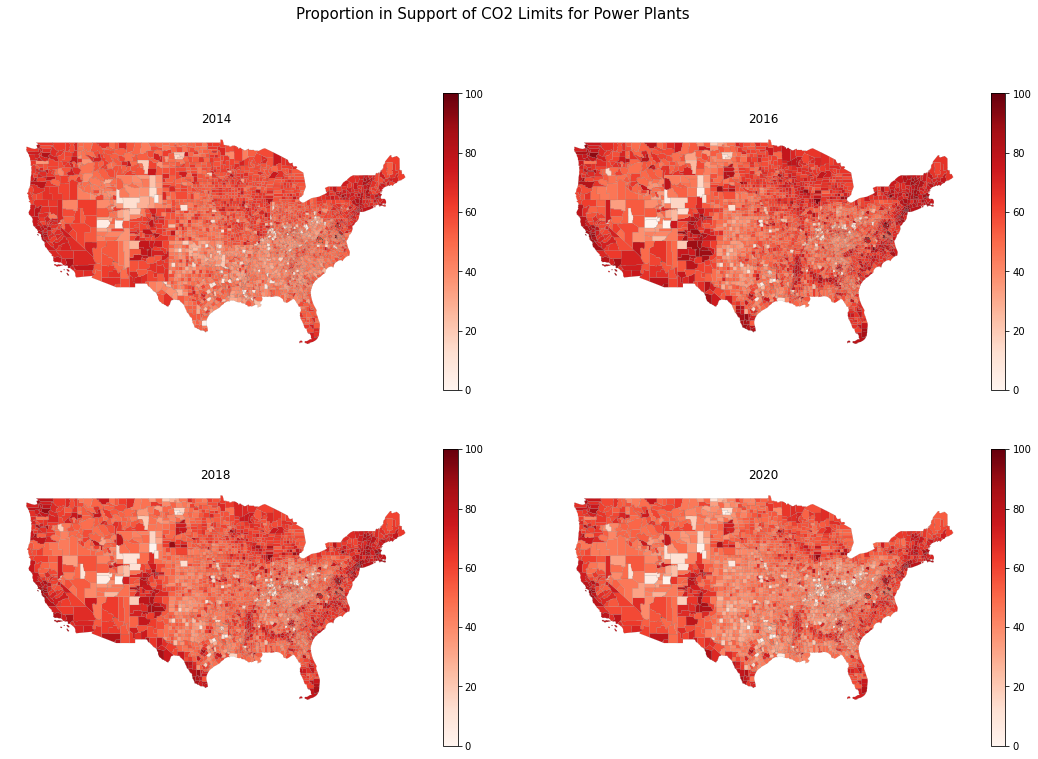

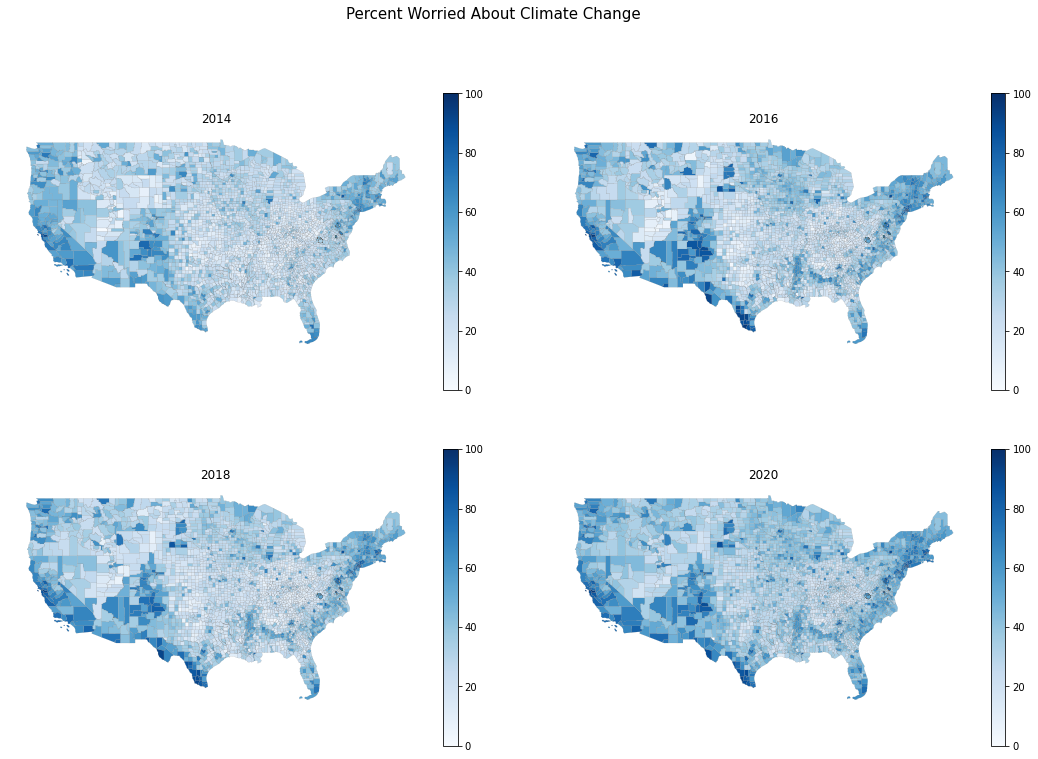

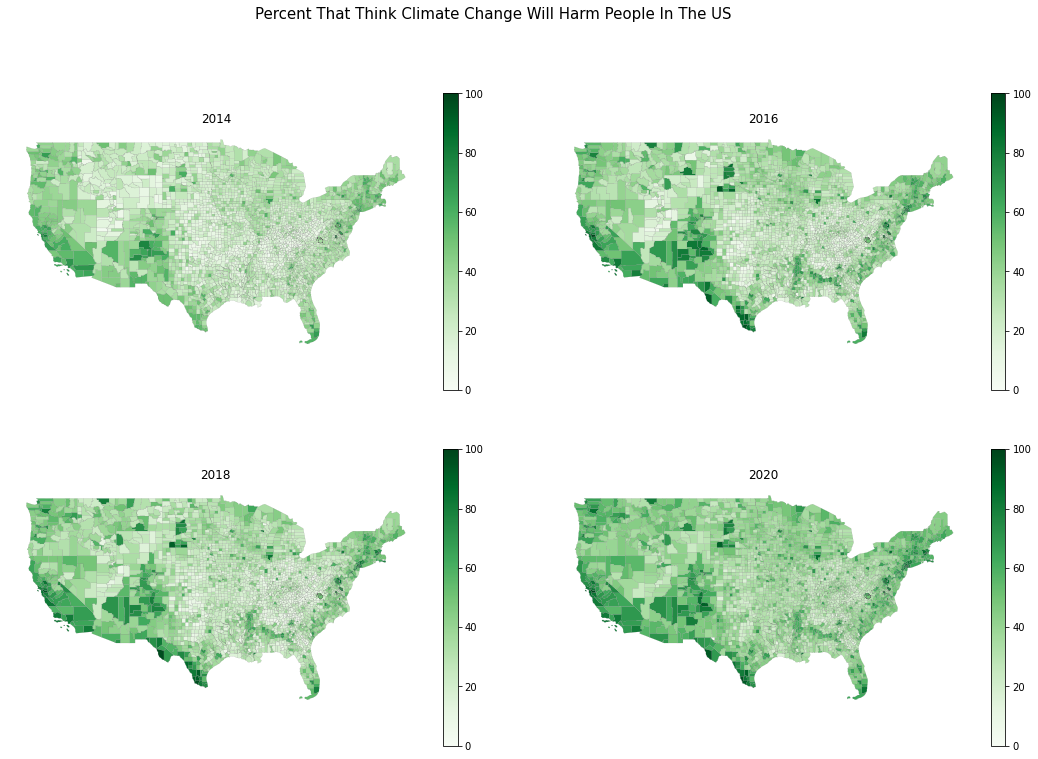

In [205]:
# create cloropleths for each target variable in each year

def plot_feature_geo(col_name, pos, year, color):
    ax = plt.subplot(2, 2, pos)
    plt.xticks(rotation=90)
    plt.title(year)
    final_huge_geo.plot(column=col_name, cmap=color, linewidth=0.1, ax=ax, edgecolor=".4")
    bar_info = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=100))#final_huge_geo["CO2limits_2020"].max()))
    bar_info._A = []
    cbar = plt.colorbar(bar_info, fraction=0.046, pad=0.04)
    ax.axis("off")

def plot_all_geo(title, var, color):
    fig = plt.figure(figsize=(18, 12))
    plot_feature_geo(f"{var}_2014", 1, 2014, color)
    plot_feature_geo(f"{var}_2016", 2, 2016, color)
    plot_feature_geo(f"{var}_2018", 3, 2018, color)
    plot_feature_geo(f"{var}_2020", 4, 2020, color)
    fig.suptitle(title, fontsize=15)

plot_all_geo("Proportion in Support of CO2 Limits for Power Plants", "CO2limits", "Reds")
plot_all_geo("Percent Worried About Climate Change", "worried", "Blues")
plot_all_geo("Percent That Think Climate Change Will Harm People In The US", "harmUS", "Greens")

Viewing the distribution of the target variables over both time and space reveals some interesting patterns. While one might assume that proportions of "yes" answers to each of the three survey questions is closely tied to political leanings or progressiveness, I can see that the target variables are more varied in distribution. While liberal areas such as California and New York do have high support for CO2 limits on power plants, high percent worrying about cliamte change, and high percent that believe climate change will harm the US, more unexpected areas such as New Mexico, southern Texas, and parts of the Midwest stand out as well. These heat maps also show us that while worry about climate change and belief in harm that climate change will cause seem to be increasing from 2014 to 2020 across the US, many counties maintained their stance on placing CO2 limits on power plants, with support actually decreasing in many areas in 2020. 

**Takeaway:** This indicates that different features will be significant for prediction model #1 in comparison to prediction models #2 and #3.



**EDA Part 2:** Violin Plots Comparing Distribution of Target Variables Over Time

To add to the temporal understanding of the target variables, I created violin plots to observe changes in their distribution over the 4 relevant years. These plots illustrate the range of values each target variable takes on, the mean, and the shape of the distribution.



Text(0.5, 0.98, 'Visualizing Distributions of Target Variables Over Time')

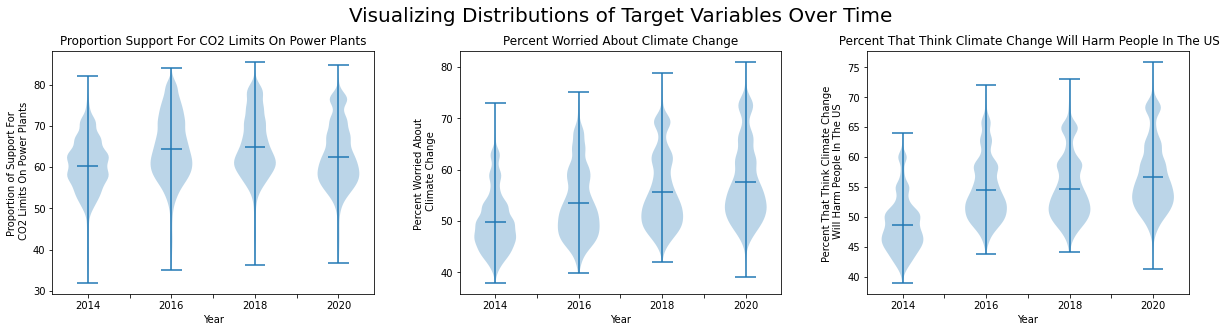

In [206]:
final_huge_vplot = final_huge.dropna()
fig = plt.figure(3, figsize=(18, 5))

ax1 = fig.add_subplot(131)
ax1.violinplot(final_huge_vplot[['CO2limits_2014', 'CO2limits_2016', 'CO2limits_2018', 'CO2limits_2020']].values, showmeans=True, showextrema=True)
ax1.set_xticklabels(['', '2014', '', '2016', '', "2018", '', "2020"])
plt.xlabel("Year")
plt.ylabel("Proportion of Support For \n CO2 Limits On Power Plants")
plt.title("Proportion Support For CO2 Limits On Power Plants")

ax2 = fig.add_subplot(132)
ax2.violinplot(final_huge_vplot[['worried_2014', 'worried_2016', 'worried_2018', 'worried_2020']].values, showmeans=True, showextrema=True)
ax2.set_xticklabels(['', '2014', '', '2016', '', "2018", '', "2020"])
plt.xlabel("Year")
plt.ylabel("Percent Worried About \n Climate Change")
plt.title("Percent Worried About Climate Change")

ax3 = fig.add_subplot(133)
ax3.violinplot(final_huge_vplot[['harmUS_2014', 'harmUS_2016', 'harmUS_2018', 'harmUS_2020']].values, showmeans=True, showextrema=True)
ax3.set_xticklabels(['', '2014', '', '2016', '', "2018", '', "2020"])
plt.xlabel("Year")
plt.ylabel("Percent That Think Climate Change \n Will Harm People In The US")
plt.title(" Percent That Think Climate Change Will Harm People In The US")


plt.tight_layout(pad = 3.5)
plt.suptitle('Visualizing Distributions of Target Variables Over Time', fontsize = 20)

While the heat maps in Part 1 give insight into geographic patterns, **these violin plots better illustrate changes in distribution of each target variable over time**. For Proportion Support For CO2 Limits On Power Plants, I can see that while the entire range of values shifted higher in 2016 and held relatively constant in 2018, the average proportion in support decreased in 2020. Percent Worried About Climate Change and Percent That Think Climate Change Will Harm People In The US have similar patterns, with the entire distribution shifting upwards between 2014 and 2018, and the range increasing in both direction in 2020. Although the range expanded in 2020, the mean for both of these target variables still increased.

**EDA Part 3:** Correlation Plots between Features and Target Variables

To get a better understanding of the associations between the features and target variables, I create scatterplots that map each feature with each target variable. Because the prediction models aim to use a lagging feature to predict a future target variable that is currently unknown and unobserved, I organize the scatterplots into 2 rows:

> **1st row (Same Year Plots):** These plots visualize the relationship between a feature from Year N and the target variable from the same Year N. Because the target variable is only observed every 2 years and the frequency of observation for the features varies from annually to once every 5 years, "Same Year Plots" are not available for every year between 2014-2020.

> **2nd row (Lagging Predictor Plots):** These plots visualize the relationship between a feature from Year N and the target variable from Year N + i. i is minimized in each combination of feature and target variable whenever possible, so that ideally the target variable is being predicted by a feature with only 1 year of lag time.

These 2 rows of plots are organized into 4 columns, one representing each of the years 2014, 2016, 2018, and 2020. This organization enables comparison of correlation across years as well as between same year variables and lagged predictors.

This organization of Correlation Plots is repeated for each combination of feature and target variable.

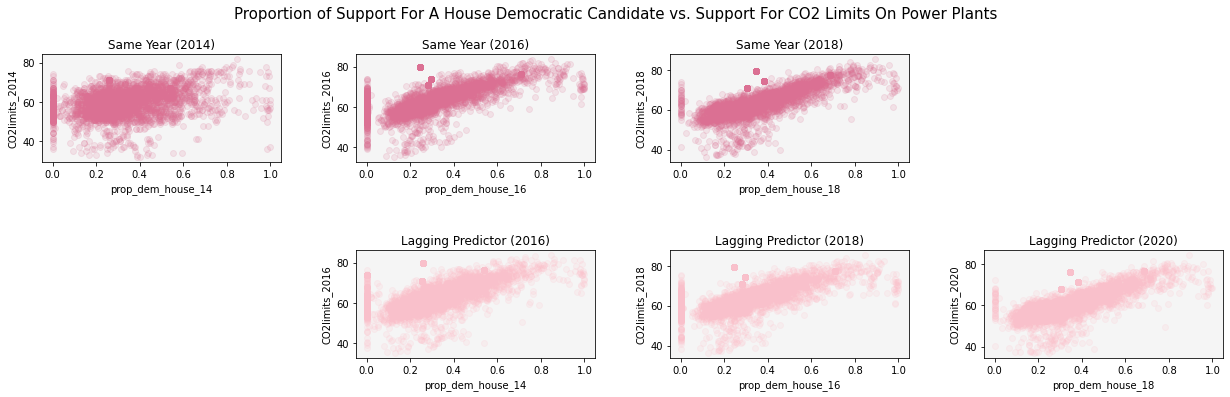

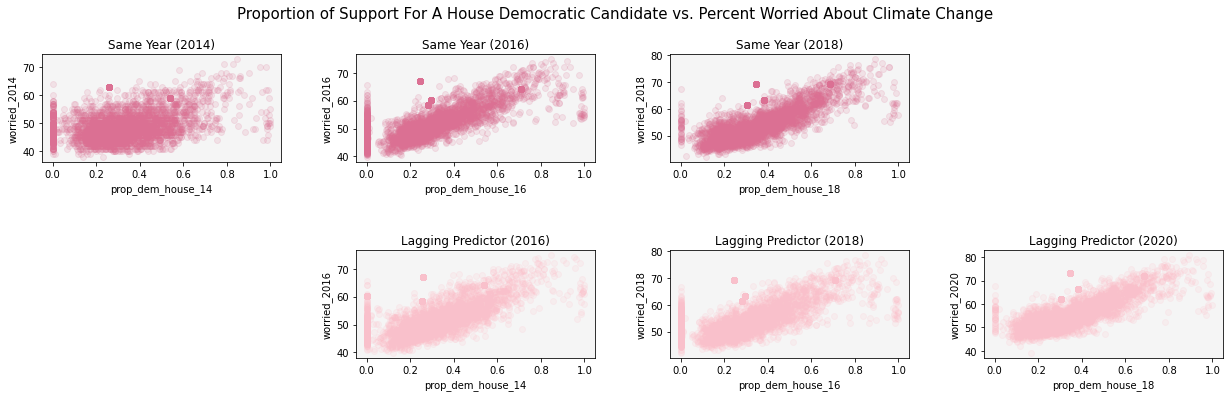

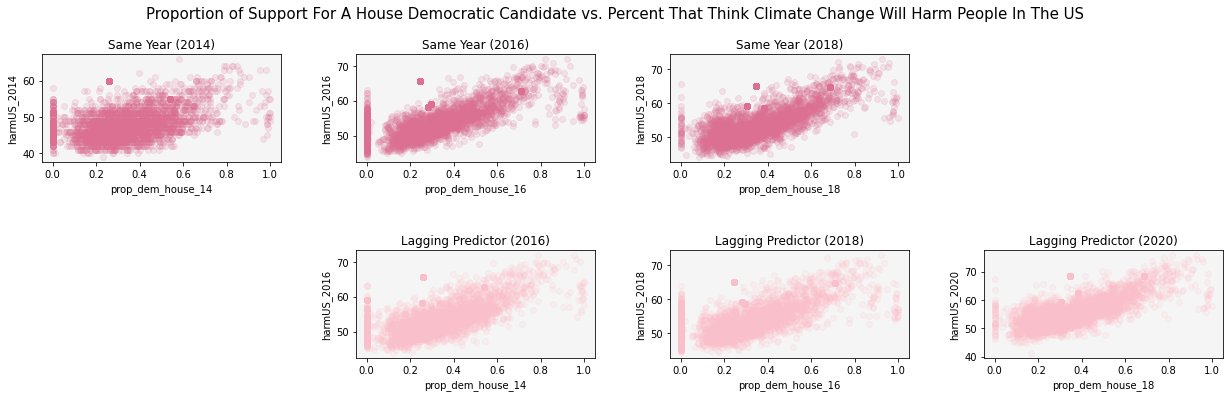

In [207]:
scatterplots_house1 = [
                "prop_dem_house_16", 'CO2limits_2016',
                "prop_dem_house_18", 'CO2limits_2018',   
                "prop_dem_house_14", 'CO2limits_2016',
                "prop_dem_house_16", 'CO2limits_2018',
                "prop_dem_house_18", 'CO2limits_2020'
                ]

scatterplots_house2 = [
                "prop_dem_house_16", 'worried_2016',
                "prop_dem_house_18", 'worried_2018',
                "prop_dem_house_14", 'worried_2016',
                "prop_dem_house_16", 'worried_2018',
                "prop_dem_house_18", 'worried_2020'
                ]

scatterplots_house3 = [
                "prop_dem_house_16", 'harmUS_2016',
                "prop_dem_house_18", 'harmUS_2018',
                "prop_dem_house_14", 'harmUS_2016',
                "prop_dem_house_16", 'harmUS_2018',
                "prop_dem_house_18", 'harmUS_2020'
                ]


def plot_house_support(x_col, y_col, x_label, y_label, plot_num, plot_year, ax1):
    ax = plt.subplot(2, 4, plot_num)#, sharey=ax1)
    if plot_num < 4:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='palevioletred', alpha=0.15)
        plt.title(f"Same Year ({plot_year})")
    else:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='pink', alpha=0.15)
        plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_house_support(plot_title, y_col, scatterplots):
    fig = plt.figure(figsize=(18, 6))
    ax1 = plt.subplot(2, 4, 1)
    ax1.scatter(final_huge["prop_dem_house_14"], final_huge[y_col], c='palevioletred', alpha=0.15)
    ax1.set_facecolor("whitesmoke")
    plt.title('Same Year (2014)')
    plt.xlabel('prop_dem_house_14')
    plt.ylabel(y_col)
    plot_num = 2
    plot_year = 2016
    for i in range(0, 10, 2):
        plot_house_support(scatterplots[i], scatterplots[i + 1], scatterplots[i], scatterplots[i + 1], plot_num, plot_year, ax1)
        plot_num += 1
        plot_year += 2
        if plot_num == 4:
            plot_num += 2
            plot_year = 2016
    plt.suptitle(f"Proportion of Support For A House Democratic Candidate vs. {plot_title}", fontsize = 15);
    plt.tight_layout(pad = 4)

plot_all_house_support("Support For CO2 Limits On Power Plants", "CO2limits_2014", scatterplots_house1)
plot_all_house_support("Percent Worried About Climate Change", "worried_2014", scatterplots_house2)
plot_all_house_support("Percent That Think Climate Change Will Harm People In The US", "harmUS_2014", scatterplots_house3)

**Data Source 2:** Election Data (House)

We see that across all 3 sets of target variables and Same Year vs. Lagging Predictor plots that there is a positive, linear association between the Proportion of Support for A House Democratic Candidate in a county and the target variables. A string of observations lined up at x=0 is likely explained by the absence of a Democratic House candidate, meaning support is at 0%. While there is some cloudiness for all 3 2014 plots, the association gains clarity in later years, especially for the Support for CO2 Limits on Power Plants target variable.  

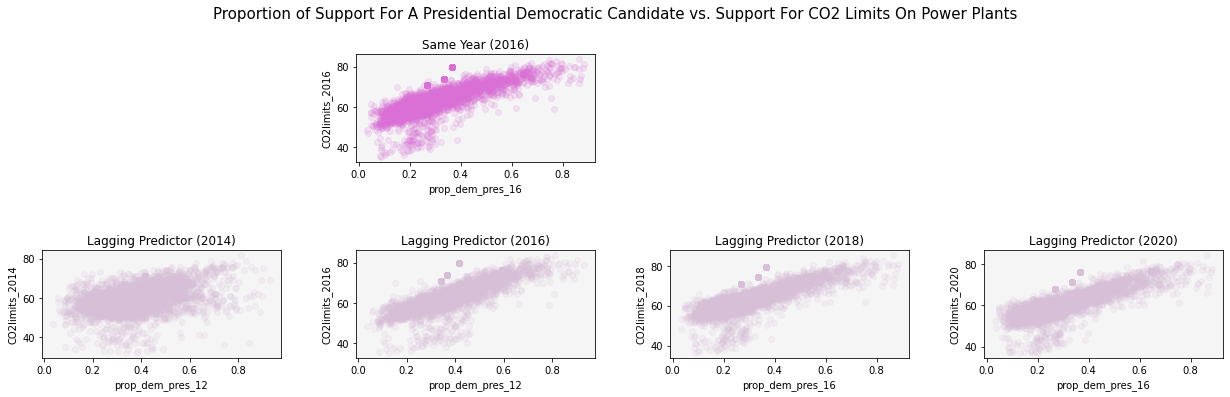

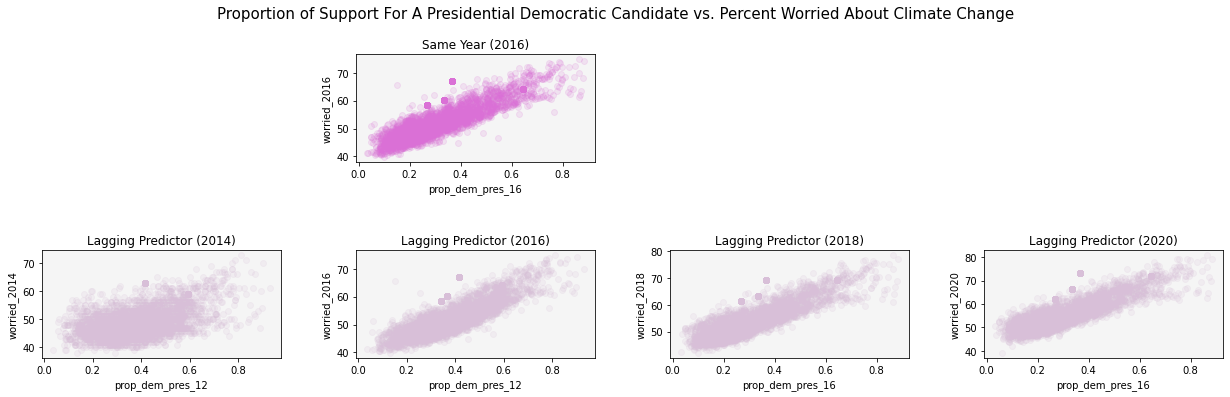

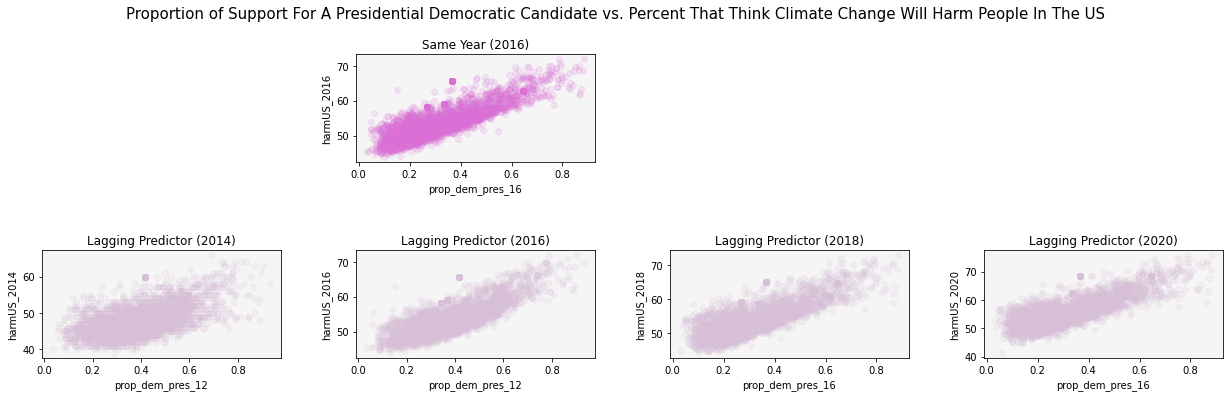

In [208]:
scatterplots_pres1 = [
                "prop_dem_pres_12", 'CO2limits_2014',
                "prop_dem_pres_12", 'CO2limits_2016',
                "prop_dem_pres_16", 'CO2limits_2018',
                "prop_dem_pres_16", 'CO2limits_2020'
                ]

scatterplots_pres2 = [
                "prop_dem_pres_12", 'worried_2014',
                "prop_dem_pres_12", 'worried_2016',
                "prop_dem_pres_16", 'worried_2018',
                "prop_dem_pres_16", 'worried_2020'
                ]

scatterplots_pres3 = [
                "prop_dem_pres_12", 'harmUS_2014',
                "prop_dem_pres_12", 'harmUS_2016',
                "prop_dem_pres_16", 'harmUS_2018',
                "prop_dem_pres_16", 'harmUS_2020'
                ]


def plot_pres_support(x_col, y_col, x_label, y_label, plot_num, plot_year, ax1):
    ax = plt.subplot(2, 4, plot_num)#, sharey=ax1)
    if plot_num < 4:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='orchid', alpha=0.15)
        plt.title(f"Same Year ({plot_year})")
    else:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='thistle', alpha=0.15)
        plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_pres_support(plot_title, y_col, scatterplots):
    fig = plt.figure(figsize=(18, 6))
    ax1 = plt.subplot(2, 4, 2)
    ax1.scatter(final_huge["prop_dem_pres_16"], final_huge[y_col], c='orchid', alpha=0.15)
    ax1.set_facecolor("whitesmoke")
    plt.title('Same Year (2016)')
    plt.xlabel('prop_dem_pres_16')
    plt.ylabel(y_col)
    plot_num = 5
    plot_year = 2014
    for i in range(0, 8, 2):
        plot_pres_support(scatterplots[i], scatterplots[i + 1], scatterplots[i], scatterplots[i + 1], plot_num, plot_year, ax1)
        plot_num += 1
        plot_year += 2
    plt.suptitle(f"Proportion of Support For A Presidential Democratic Candidate vs. {plot_title}", fontsize = 15);
    plt.tight_layout(pad = 4)

plot_all_pres_support("Support For CO2 Limits On Power Plants", "CO2limits_2016", scatterplots_pres1)
plot_all_pres_support("Percent Worried About Climate Change", "worried_2016", scatterplots_pres2)
plot_all_pres_support("Percent That Think Climate Change Will Harm People In The US", "harmUS_2016", scatterplots_pres3)

**Data Source 2:** Election Data (President)

These scatterplots show us that Proportion of Support For A Presidential Democratic Candidate has the strongest correlation out of all of the features with all 3 target variables. There is a well defined positive, linear association between feature and target variable, even with the presence of some outliers. It is interesting to note that while using 2012 Presidential Support data as a Lagging Predictor for 2014 has some association, increasing the lag time by using the 2012 feature to predict 2016 outcomes has a much stronger association. While all 3 target variables have some deviation away from the visible trend, it is strongest for the Support For CO2 Limits feature even at high proportions of support for a democratic candidate. This helps illustrate that although the prediction questions are similar, the specifics of each survey question matters: while questions 2 and 3 are about the general consequences of climate change, question 1 is about a specific policy action that results in change.

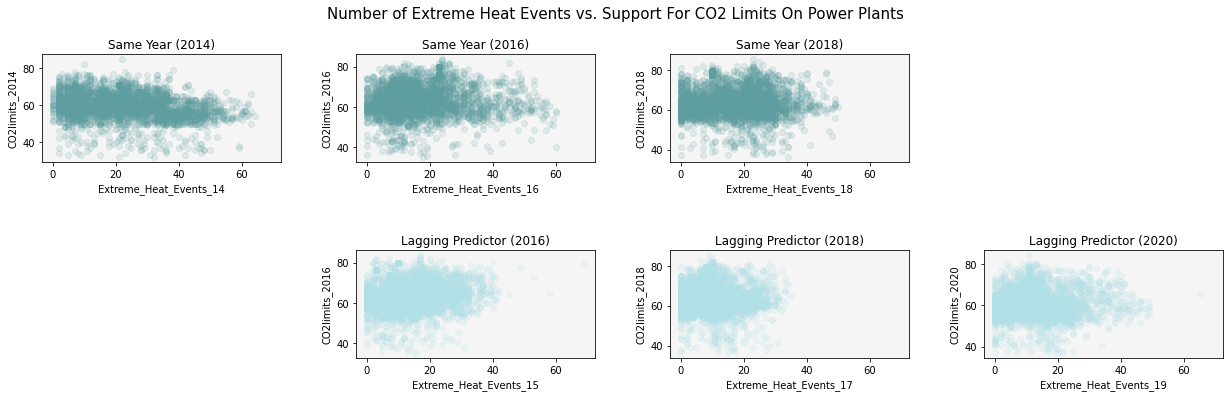

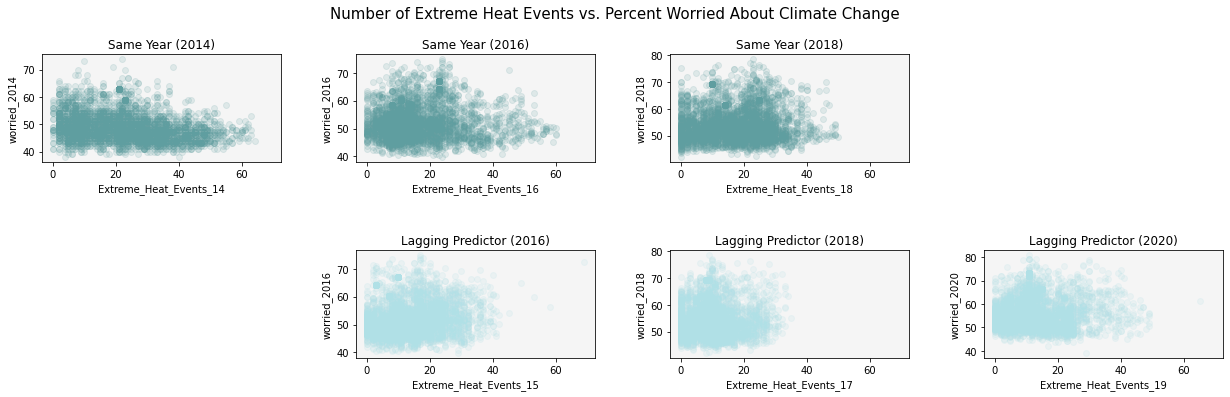

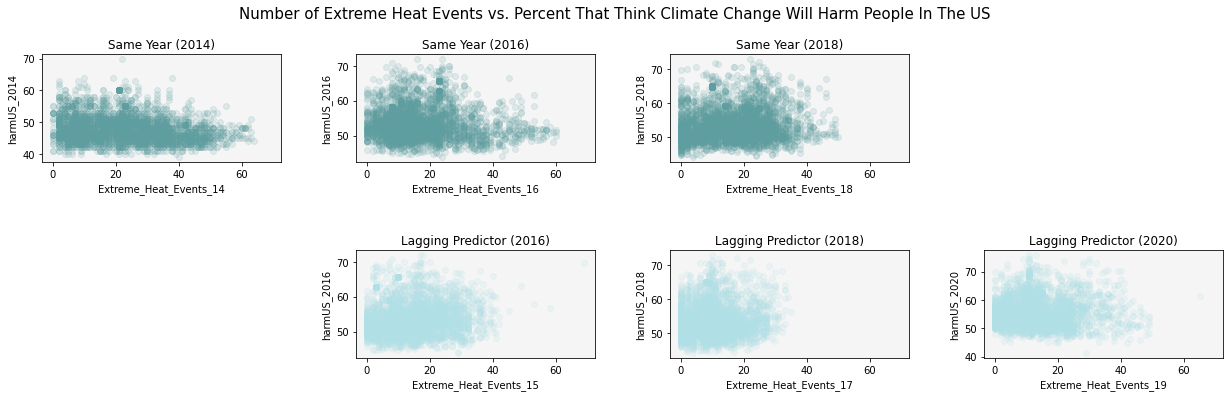

In [209]:
scatterplots_heat1 = {
                "Extreme_Heat_Events_16": 'CO2limits_2016',
                "Extreme_Heat_Events_18": 'CO2limits_2018',   
                "Extreme_Heat_Events_15": 'CO2limits_2016',
                "Extreme_Heat_Events_17": 'CO2limits_2018',
                "Extreme_Heat_Events_19": 'CO2limits_2020'
               }

scatterplots_heat2 = {
                "Extreme_Heat_Events_16": 'worried_2016',
                "Extreme_Heat_Events_18": 'worried_2018',
                "Extreme_Heat_Events_15": 'worried_2016',
                "Extreme_Heat_Events_17": 'worried_2018',
                "Extreme_Heat_Events_19": 'worried_2020',
               }

scatterplots_heat3 = {
                "Extreme_Heat_Events_16": 'harmUS_2016',
                "Extreme_Heat_Events_18": 'harmUS_2018',
                "Extreme_Heat_Events_15": 'harmUS_2016',
                "Extreme_Heat_Events_17": 'harmUS_2018',
                "Extreme_Heat_Events_19": 'harmUS_2020',
               }


def plot_heat_event(x_col, y_col, x_label, y_label, plot_num, ax1, plot_year):
    ax = plt.subplot(2, 4, plot_num, sharex=ax1)
    if plot_num < 4:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='cadetblue', alpha=0.15)
        plt.title(f"Same Year ({plot_year})")
    else:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='powderblue', alpha=0.15)
        plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_heat_events(plot_title, y_col, scatterplots):
    fig = plt.figure(figsize=(18, 6))
    ax1 = plt.subplot(2, 4, 1)
    ax1.scatter(final_huge["Extreme_Heat_Events_14"], final_huge[y_col], c='cadetblue', alpha=0.15)
    ax1.set_facecolor("whitesmoke")
    plt.title('Same Year (2014)')
    plt.xlabel('Extreme_Heat_Events_14')
    plt.ylabel(y_col)
    plot_num = 2
    plot_year = 2016
    for x_col in scatterplots:
        plot_heat_event(x_col, scatterplots[x_col], x_col, scatterplots[x_col], plot_num, ax1, plot_year)
        plot_num += 1
        plot_year += 2
        if plot_num == 4:
            plot_num += 2
            plot_year = 2016
    plt.suptitle(f"Number of Extreme Heat Events vs. {plot_title}", fontsize = 15);
    plt.tight_layout(pad = 4)

plot_all_heat_events("Support For CO2 Limits On Power Plants", 'CO2limits_2014', scatterplots_heat1)
plot_all_heat_events("Percent Worried About Climate Change", 'worried_2014', scatterplots_heat2)
plot_all_heat_events("Percent That Think Climate Change Will Harm People In The US", 'harmUS_2014', scatterplots_heat3)

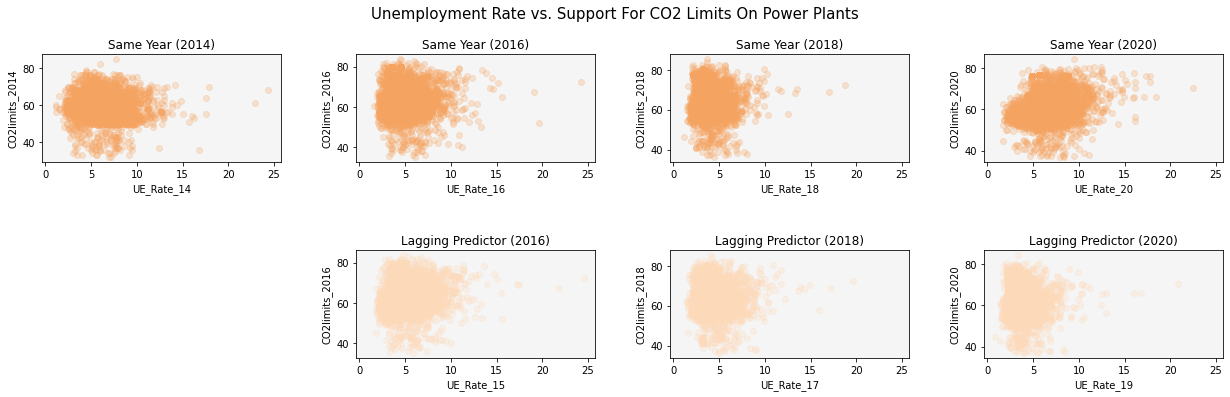

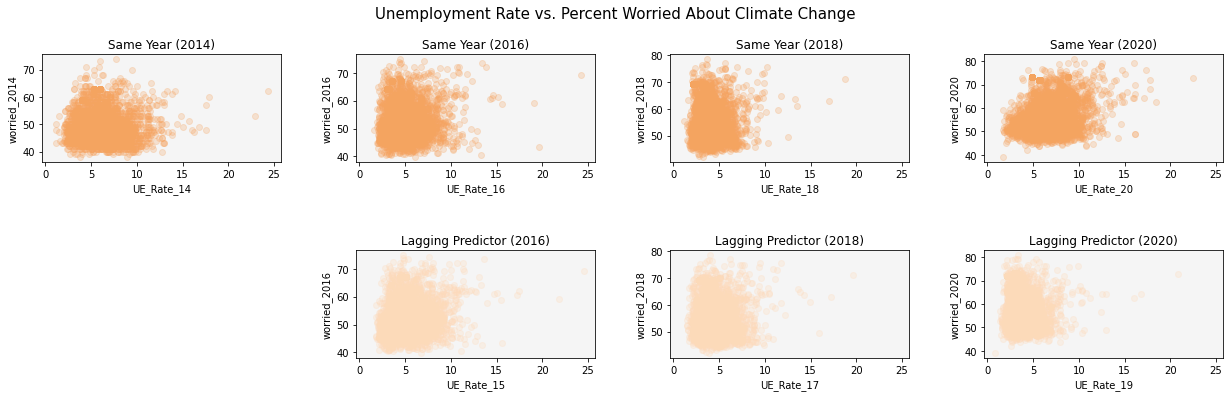

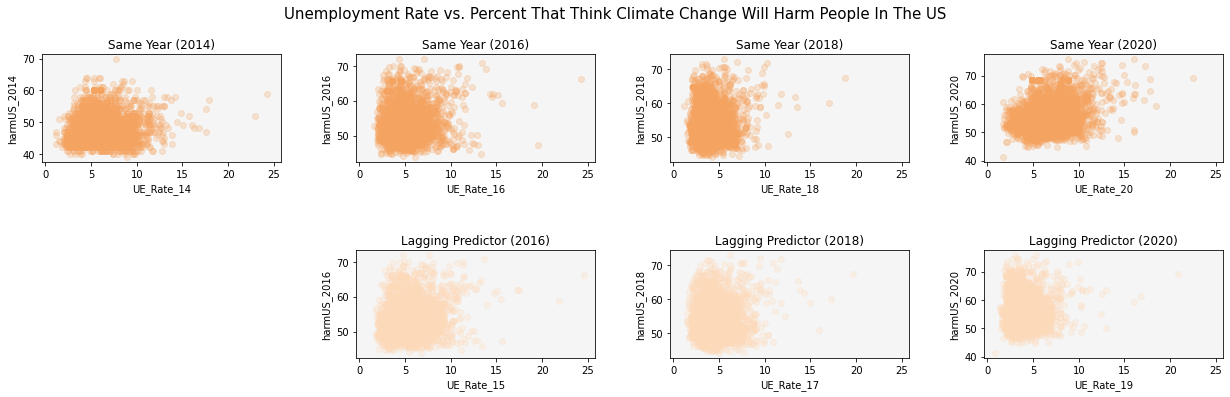

In [210]:
scatterplots_UE1 = [
                "UE_Rate_16", 'CO2limits_2016',
                "UE_Rate_18", 'CO2limits_2018', 
                "UE_Rate_20", 'CO2limits_2020',
                "UE_Rate_15", 'CO2limits_2016',
                "UE_Rate_17", 'CO2limits_2018',
                "UE_Rate_19", 'CO2limits_2020'
                ]

scatterplots_UE2 = [
                "UE_Rate_16", 'worried_2016',
                "UE_Rate_18", 'worried_2018', 
                "UE_Rate_20", 'worried_2020',
                "UE_Rate_15", 'worried_2016',
                "UE_Rate_17", 'worried_2018',
                "UE_Rate_19", 'worried_2020'
                ]

scatterplots_UE3 = [
                "UE_Rate_16", 'harmUS_2016',
                "UE_Rate_18", 'harmUS_2018', 
                "UE_Rate_20", 'harmUS_2020',
                "UE_Rate_15", 'harmUS_2016',
                "UE_Rate_17", 'harmUS_2018',
                "UE_Rate_19", 'harmUS_2020'
                ]


def plot_UE(x_col, y_col, x_label, y_label, plot_num, ax1, plot_year):
    ax = plt.subplot(2, 4, plot_num, sharex=ax1)
    if plot_num <= 4:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='sandybrown', alpha=0.25)
        plt.title(f"Same Year ({plot_year})")
    else:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='peachpuff', alpha=0.25)
        plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_UE(plot_title, y_col, scatterplots):
    fig = plt.figure(figsize=(18, 6))
    ax1 = plt.subplot(2, 4, 1)
    ax1.scatter(final_huge["UE_Rate_14"], final_huge[y_col], c='sandybrown', alpha=0.25)
    ax1.set_facecolor("whitesmoke")
    plt.title('Same Year (2014)')
    plt.xlabel('UE_Rate_14')
    plt.ylabel(y_col)
    plot_num = 2
    plot_year = 2016
    for i in range(0, 12, 2):
        plot_UE(scatterplots[i], scatterplots[i + 1], scatterplots[i], scatterplots[i + 1], plot_num, ax1, plot_year)
        plot_num += 1
        plot_year += 2
        if plot_num == 5:
            plot_num += 1
            plot_year = 2016
    plt.suptitle(f"Unemployment Rate vs. {plot_title}", fontsize = 15);
    plt.tight_layout(pad = 4)

plot_all_UE("Support For CO2 Limits On Power Plants", 'CO2limits_2014', scatterplots_UE1)
plot_all_UE("Percent Worried About Climate Change", 'worried_2014', scatterplots_UE2)
plot_all_UE("Percent That Think Climate Change Will Harm People In The US", 'harmUS_2014', scatterplots_UE3)

**Data Source 3 & Data Source 4:** Both of sets of scatterplots above fail to reveal a strong association between the features and target variables. While there may be some slight association, the scatterplots are too cloudy to make any qualitative or visual conclusions. Feature selection in the modeling selection will shed more light on the importance of these features in prediction.

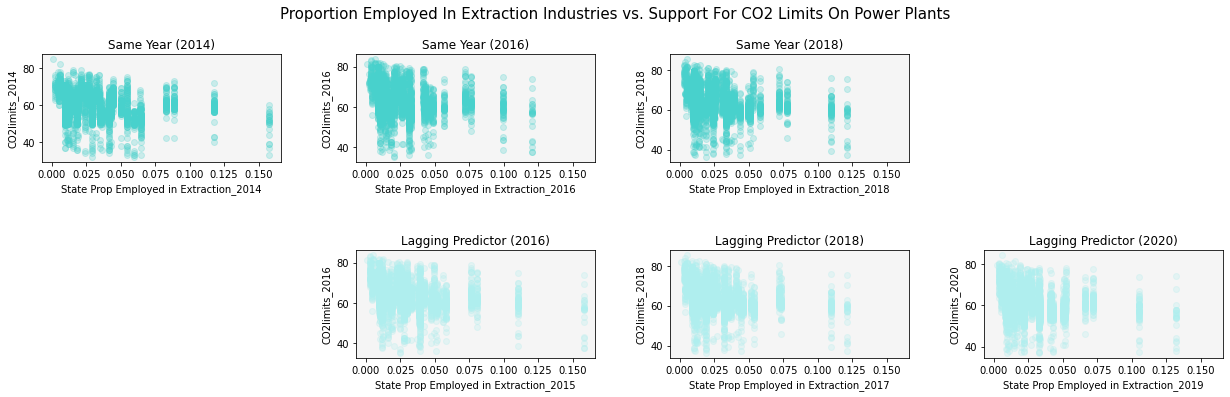

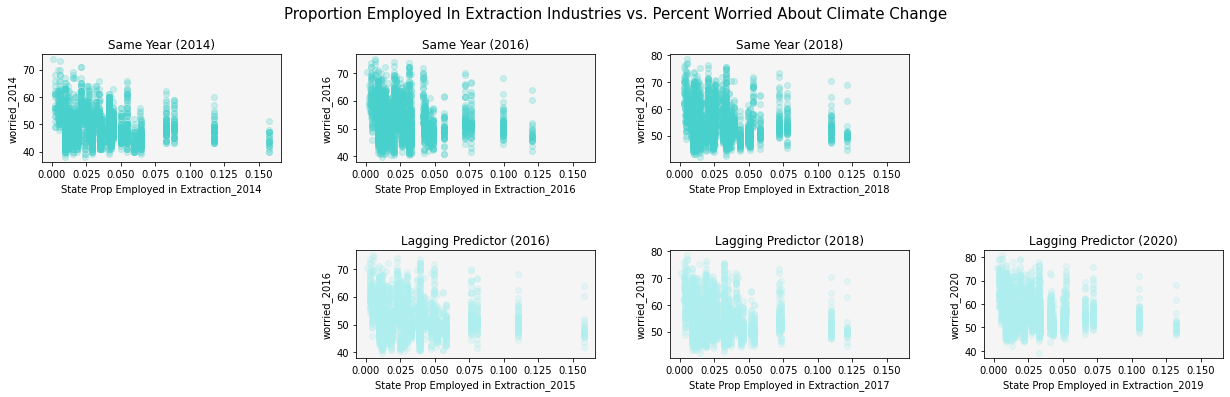

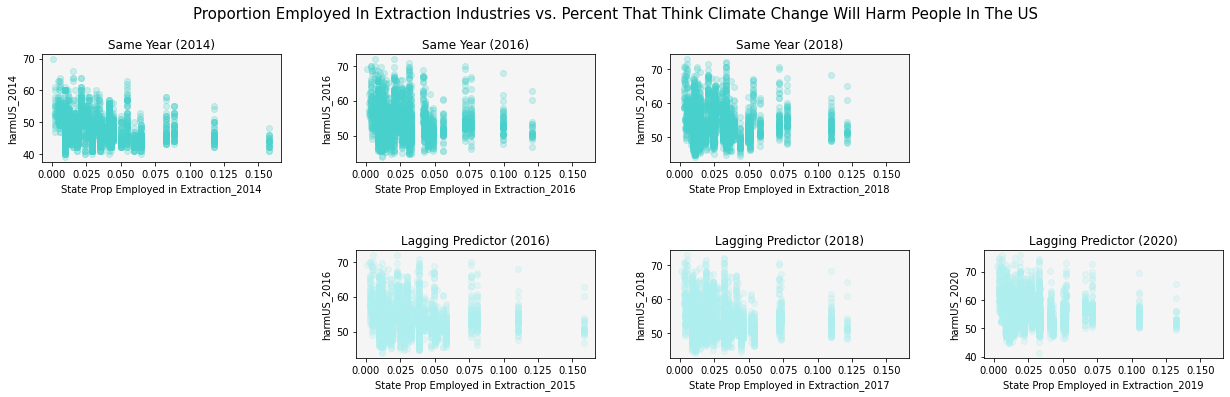

In [211]:
scatterplots_extraction1 = [
                "State Prop Employed in Extraction_2016", 'CO2limits_2016',
                "State Prop Employed in Extraction_2018", 'CO2limits_2018', 
                "State Prop Employed in Extraction_2015", 'CO2limits_2016',
                "State Prop Employed in Extraction_2017", 'CO2limits_2018',
                "State Prop Employed in Extraction_2019", 'CO2limits_2020'
                ]

scatterplots_extraction2 = [
                "State Prop Employed in Extraction_2016", 'worried_2016',
                "State Prop Employed in Extraction_2018", 'worried_2018', 
                "State Prop Employed in Extraction_2015", 'worried_2016',
                "State Prop Employed in Extraction_2017", 'worried_2018',
                "State Prop Employed in Extraction_2019", 'worried_2020'
                ]

scatterplots_extraction3 = [
                "State Prop Employed in Extraction_2016", 'harmUS_2016',
                "State Prop Employed in Extraction_2018", 'harmUS_2018', 
                "State Prop Employed in Extraction_2015", 'harmUS_2016',
                "State Prop Employed in Extraction_2017", 'harmUS_2018',
                "State Prop Employed in Extraction_2019", 'harmUS_2020'
                ]


def plot_extraction_num_pp(x_col, y_col, x_label, y_label, plot_num, ax1, plot_year, first_x):
    ax = plt.subplot(2, 4, plot_num, sharex=ax1)
    if plot_num < 4:
        if first_x == "State Prop Employed in Extraction_2014":
            ax.scatter(final_huge[x_col], final_huge[y_col], c='mediumturquoise', alpha=0.25)
        else:
            ax.scatter(final_huge[x_col], final_huge[y_col], c='olive', alpha=0.25)
        plt.title(f"Same Year ({plot_year})")
    else:
        if first_x == "State Prop Employed in Extraction_2014":
            ax.scatter(final_huge[x_col], final_huge[y_col], c='paleturquoise', alpha=0.25)
        else:
            ax.scatter(final_huge[x_col], final_huge[y_col], c='darkkhaki', alpha=0.25)
        plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_extraction_num_pp(plot_title, first_x, first_y, scatterplots):
    fig = plt.figure(figsize=(18, 6))
    ax1 = plt.subplot(2, 4, 1)
    if first_x == "State Prop Employed in Extraction_2014":
        ax1.scatter(final_huge[first_x], final_huge[first_y], c='mediumturquoise', alpha=0.25)
    else:
        ax1.scatter(final_huge[first_x], final_huge[first_y], c='olive', alpha=0.25)
    ax1.set_facecolor("whitesmoke")
    plt.title('Same Year (2014)')
    plt.xlabel(first_x)
    plt.ylabel(first_y)
    plot_num = 2
    plot_year = 2016
    for i in range(0, 10, 2):
        plot_extraction_num_pp(scatterplots[i], scatterplots[i + 1], scatterplots[i], scatterplots[i + 1], plot_num, ax1, plot_year, first_x)
        plot_num += 1
        plot_year += 2
        if plot_num == 4:
            plot_num += 2
            plot_year = 2016
    plt.suptitle(plot_title, fontsize = 15);
    plt.tight_layout(pad = 4)

plot_all_extraction_num_pp("Proportion Employed In Extraction Industries vs. Support For CO2 Limits On Power Plants", "State Prop Employed in Extraction_2014", 'CO2limits_2014', scatterplots_extraction1)
plot_all_extraction_num_pp("Proportion Employed In Extraction Industries vs. Percent Worried About Climate Change", "State Prop Employed in Extraction_2014", 'worried_2014', scatterplots_extraction2)
plot_all_extraction_num_pp("Proportion Employed In Extraction Industries vs. Percent That Think Climate Change Will Harm People In The US", "State Prop Employed in Extraction_2014", 'harmUS_2014', scatterplots_extraction3)

**Data Source 5:** While the trend is slightly difficult to confirm visually, there appears to be a negative association between Proportion Employed In Extraction Industries and all 3 target variables, particularly #2 and #3. The scatterplots also give insight to the granularity of the data, specifically that this feature is not actually representative of the county level. The fact that many observations are clustered in vertical lines suggests that all counties in each state have the same feature value, lowering the significance this feature might have to the predictive models.

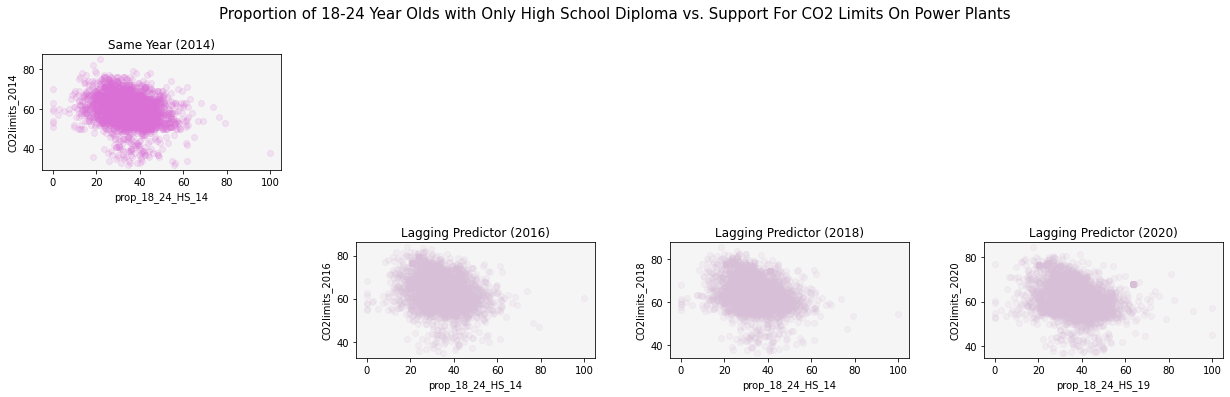

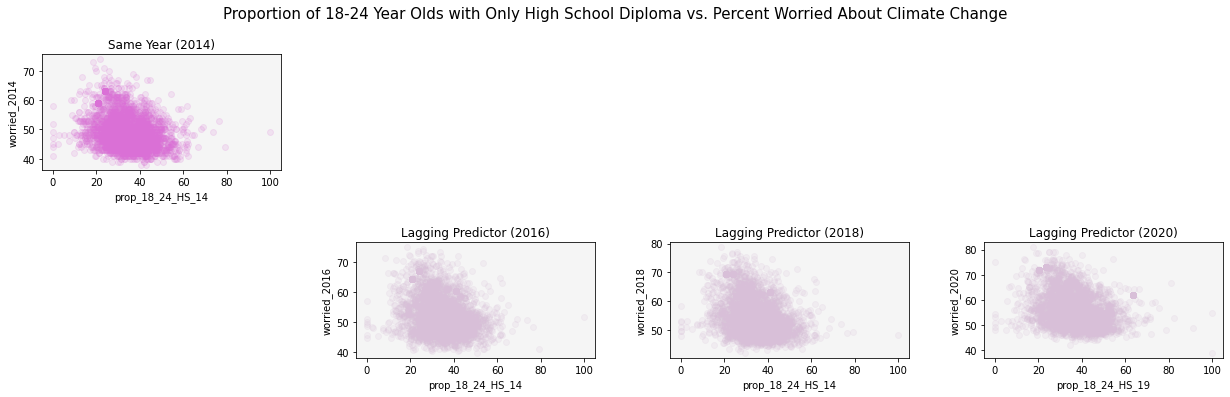

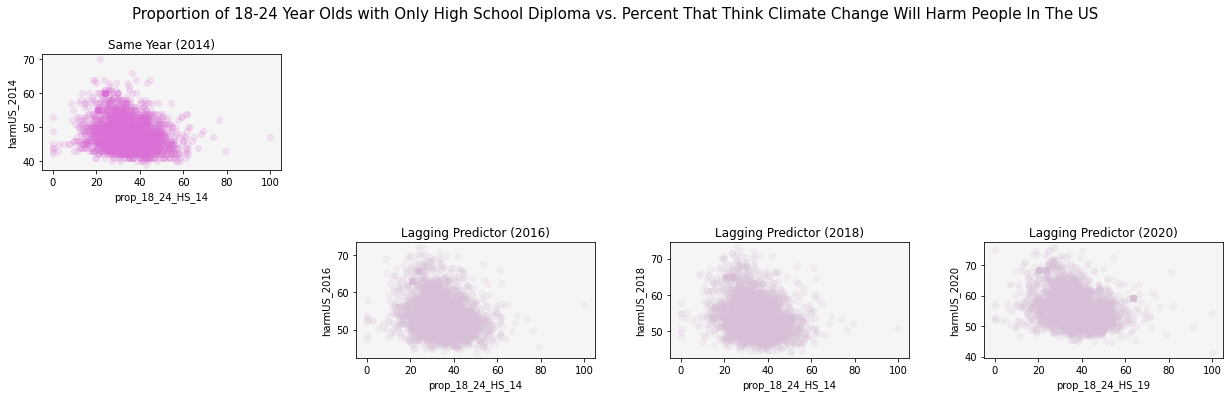

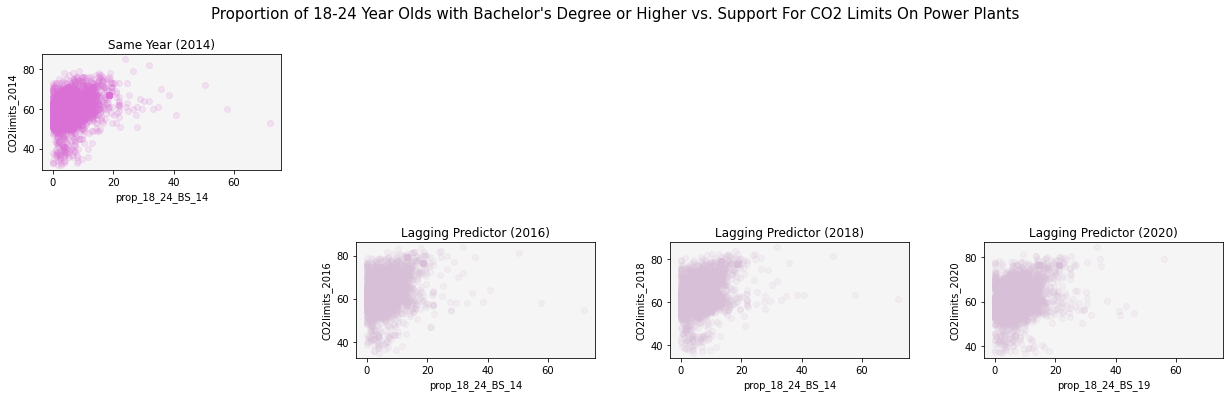

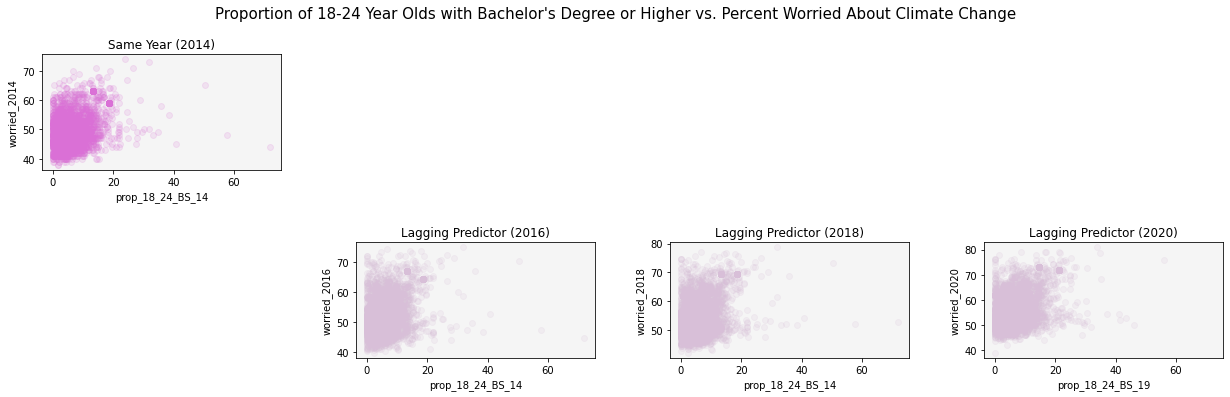

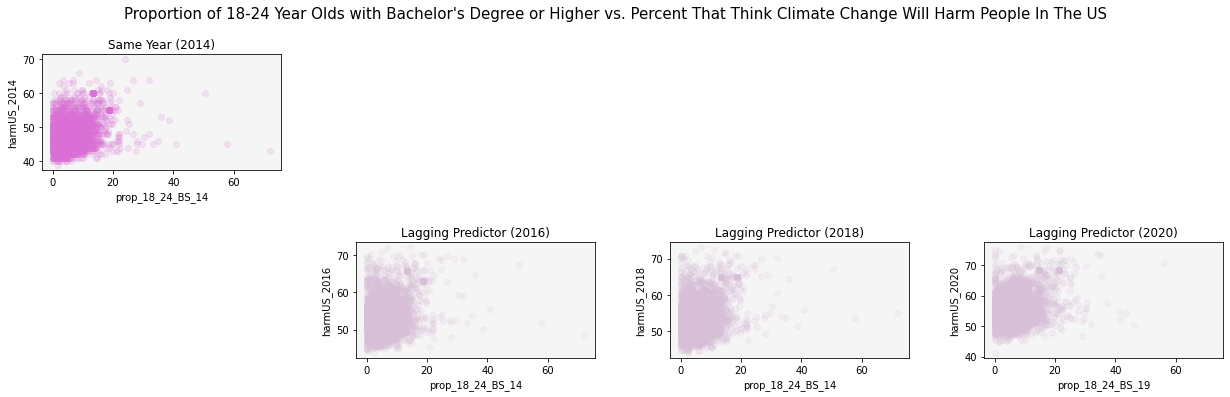

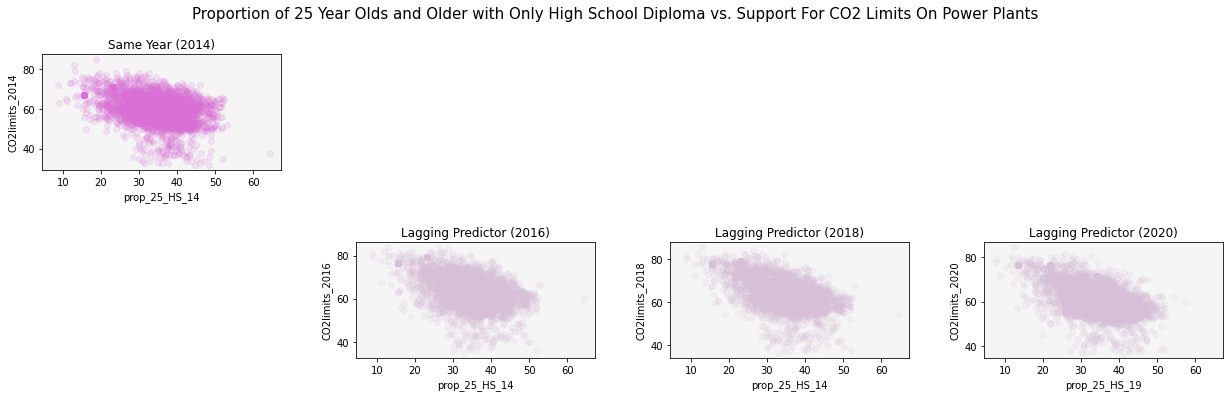

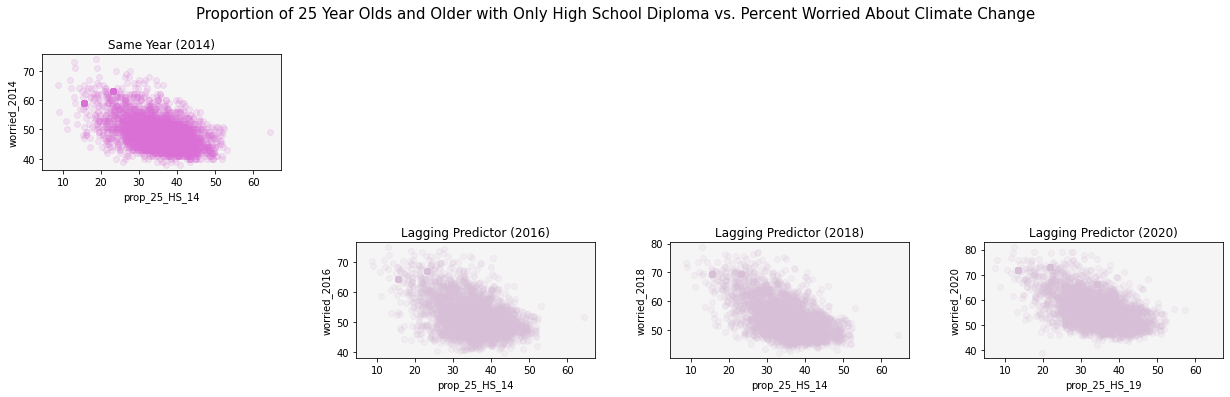

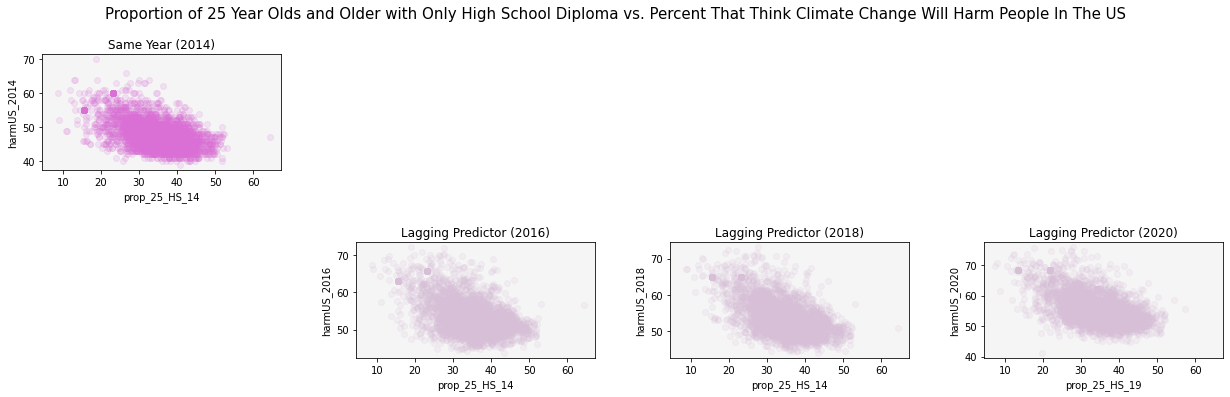

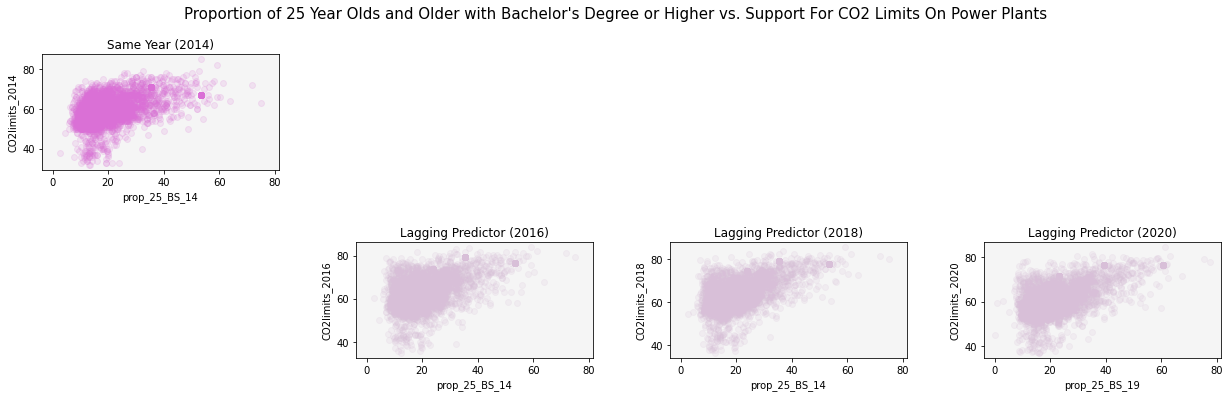

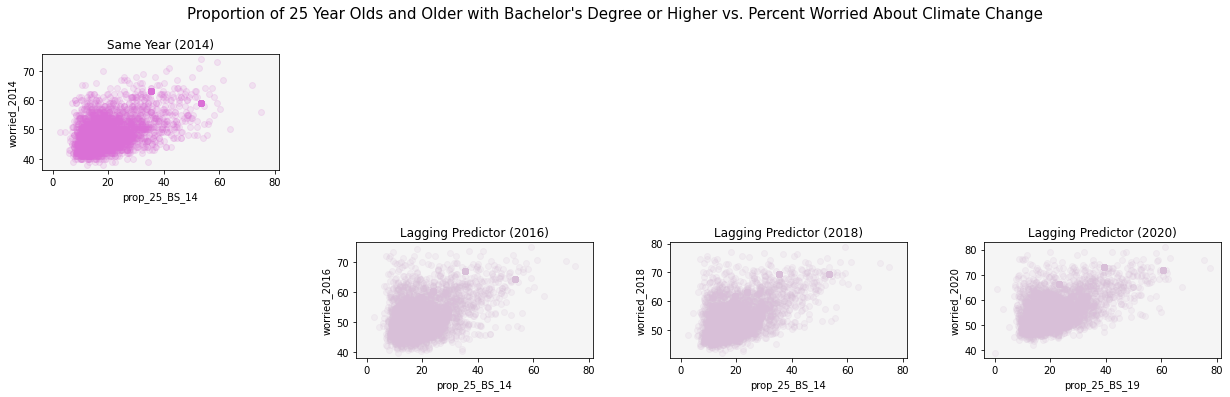

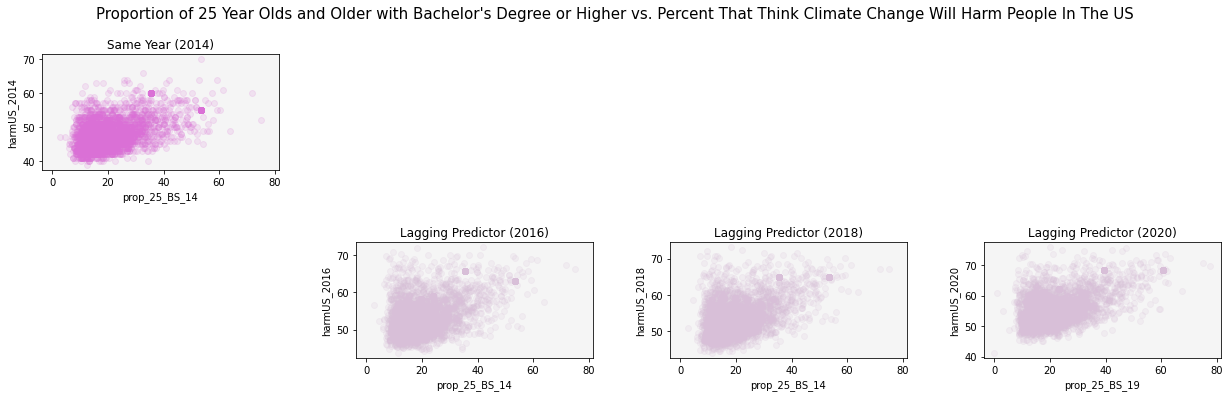

In [212]:
scatterplots_edu1 = [
                "prop_18_24_HS_14", 'CO2limits_2016',
                "prop_18_24_HS_14", 'CO2limits_2018',
                "prop_18_24_HS_19", 'CO2limits_2020'
                ]

scatterplots_edu2 = [
                "prop_18_24_HS_14", 'worried_2016',
                "prop_18_24_HS_14", 'worried_2018',
                "prop_18_24_HS_19", 'worried_2020'
                ]

scatterplots_edu3 = [
                "prop_18_24_HS_14", 'harmUS_2016',
                "prop_18_24_HS_14", 'harmUS_2018',
                "prop_18_24_HS_19", 'harmUS_2020'
                ]

scatterplots_edu4 = [
                "prop_18_24_BS_14", 'CO2limits_2016',
                "prop_18_24_BS_14", 'CO2limits_2018',
                "prop_18_24_BS_19", 'CO2limits_2020'
                ]

scatterplots_edu5 = [
                "prop_18_24_BS_14", 'worried_2016',
                "prop_18_24_BS_14", 'worried_2018',
                "prop_18_24_BS_19", 'worried_2020'
                ]

scatterplots_edu6 = [
                "prop_18_24_BS_14", 'harmUS_2016',
                "prop_18_24_BS_14", 'harmUS_2018',
                "prop_18_24_BS_19", 'harmUS_2020'
                ]

scatterplots_edu7 = [
                "prop_25_HS_14", 'CO2limits_2016',
                "prop_25_HS_14", 'CO2limits_2018',
                "prop_25_HS_19", 'CO2limits_2020'
                ]

scatterplots_edu8 = [
                "prop_25_HS_14", 'worried_2016',
                "prop_25_HS_14", 'worried_2018',
                "prop_25_HS_19", 'worried_2020'
                ]

scatterplots_edu9 = [
                "prop_25_HS_14", 'harmUS_2016',
                "prop_25_HS_14", 'harmUS_2018',
                "prop_25_HS_19", 'harmUS_2020'
                ]

scatterplots_edu10 = [
                "prop_25_BS_14", 'CO2limits_2016',
                "prop_25_BS_14", 'CO2limits_2018',
                "prop_25_BS_19", 'CO2limits_2020'
                ]

scatterplots_edu11 = [
                "prop_25_BS_14", 'worried_2016',
                "prop_25_BS_14", 'worried_2018',
                "prop_25_BS_19", 'worried_2020'
                ]

scatterplots_edu12 = [
                "prop_25_BS_14", 'harmUS_2016',
                "prop_25_BS_14", 'harmUS_2018',
                "prop_25_BS_19", 'harmUS_2020'
                ]


def plot_edu_support(x_col, y_col, x_label, y_label, plot_num, plot_year, ax1):
    ax = plt.subplot(2, 4, plot_num, sharex=ax1)
    if plot_num < 4:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='orchid', alpha=0.15)
        plt.title(f"Same Year ({plot_year})")
    else:
        ax.scatter(final_huge[x_col], final_huge[y_col], c='thistle', alpha=0.15)
        plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_edu_support(plot_title, x_col, y_col, scatterplots):
    plt.figure(figsize=(18, 6))
    ax1 = plt.subplot(2, 4, 1)
    ax1.scatter(final_huge[x_col], final_huge[y_col], c='orchid', alpha=0.15)
    ax1.set_facecolor("whitesmoke")
    plt.title('Same Year (2014)')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plot_num = 6
    plot_year = 2016
    for i in range(0, 6, 2):
        plot_edu_support(scatterplots[i], scatterplots[i + 1], scatterplots[i], scatterplots[i + 1], plot_num, plot_year, ax1)
        plot_num += 1
        plot_year += 2
    plt.suptitle(plot_title, fontsize = 15);
    plt.tight_layout(pad = 4)

plot_all_edu_support("Proportion of 18-24 Year Olds with Only High School Diploma vs. Support For CO2 Limits On Power Plants", "prop_18_24_HS_14", "CO2limits_2014", scatterplots_edu1)
plot_all_edu_support("Proportion of 18-24 Year Olds with Only High School Diploma vs. Percent Worried About Climate Change", "prop_18_24_HS_14", "worried_2014", scatterplots_edu2)
plot_all_edu_support("Proportion of 18-24 Year Olds with Only High School Diploma vs. Percent That Think Climate Change Will Harm People In The US", "prop_18_24_HS_14", "harmUS_2014", scatterplots_edu3)

plot_all_edu_support("Proportion of 18-24 Year Olds with Bachelor's Degree or Higher vs. Support For CO2 Limits On Power Plants", "prop_18_24_BS_14", "CO2limits_2014", scatterplots_edu4)
plot_all_edu_support("Proportion of 18-24 Year Olds with Bachelor's Degree or Higher vs. Percent Worried About Climate Change", "prop_18_24_BS_14", "worried_2014", scatterplots_edu5)
plot_all_edu_support("Proportion of 18-24 Year Olds with Bachelor's Degree or Higher vs. Percent That Think Climate Change Will Harm People In The US", "prop_18_24_BS_14", "harmUS_2014", scatterplots_edu6)

plot_all_edu_support("Proportion of 25 Year Olds and Older with Only High School Diploma vs. Support For CO2 Limits On Power Plants", "prop_25_HS_14", "CO2limits_2014", scatterplots_edu7)
plot_all_edu_support("Proportion of 25 Year Olds and Older with Only High School Diploma vs. Percent Worried About Climate Change", "prop_25_HS_14", "worried_2014", scatterplots_edu8)
plot_all_edu_support("Proportion of 25 Year Olds and Older with Only High School Diploma vs. Percent That Think Climate Change Will Harm People In The US", "prop_25_HS_14", "harmUS_2014", scatterplots_edu9)

plot_all_edu_support("Proportion of 25 Year Olds and Older with Bachelor's Degree or Higher vs. Support For CO2 Limits On Power Plants", "prop_25_BS_14", "CO2limits_2014", scatterplots_edu10)
plot_all_edu_support("Proportion of 25 Year Olds and Older with Bachelor's Degree or Higher vs. Percent Worried About Climate Change", "prop_25_BS_14", "worried_2014", scatterplots_edu11)
plot_all_edu_support("Proportion of 25 Year Olds and Older with Bachelor's Degree or Higher vs. Percent That Think Climate Change Will Harm People In The US", "prop_25_BS_14", "harmUS_2014", scatterplots_edu12)

**Data Source 8:** the educational attainment data is split into 2 age ranges, 18-24 Year Olds or 25 and Older, with 2 educational levels (Only High School Diploma or Bachelor's Degree or Higher) for a total of 4 distinct features. the scatterplots show that the data for 25 and Older has stronger associations with the target variables than the data for 18-24 Year Olds. In particular, Proportion of 25 Year Olds and Older with Only HS Diploma has a negative, linear association with all 3 target variables, while Proportion of 25 Year Olds and Older with Bachelor's Degree or Higher has positive association. While these trends may seem contradictory, they make sense because of the distinction between *only* a HS diploma vs. BS degree *or higher*. While a higher proportion with a BS degree or higher means generally higher educational attainment, a higher proportion with only a HS diploma may indicate that less of a proportion completes higher education beyond HS.

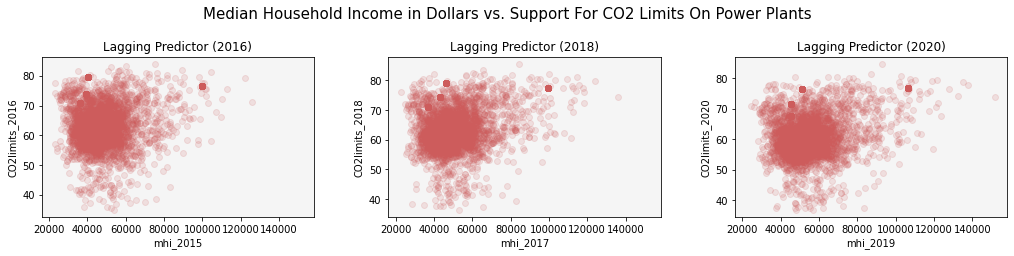

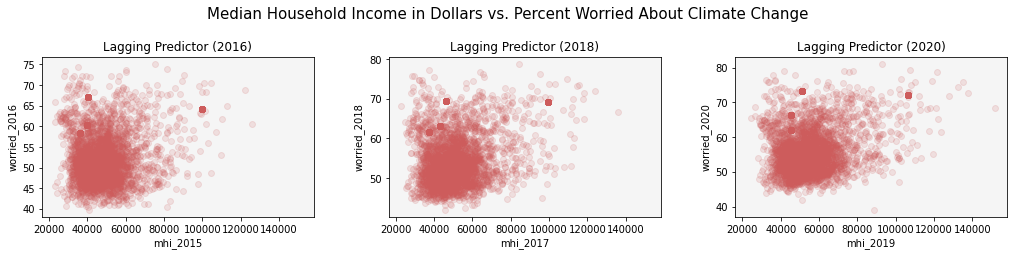

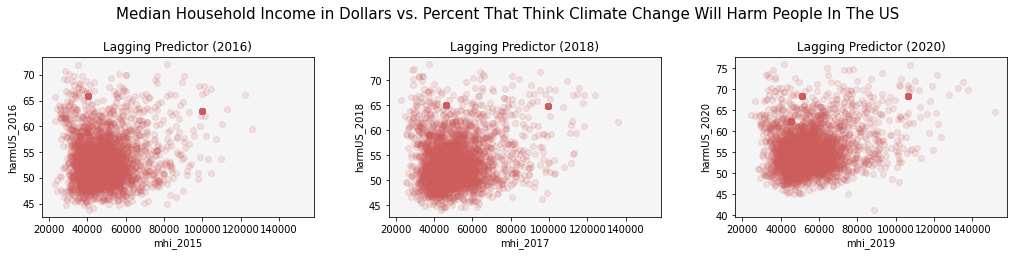

In [213]:
scatterplots_mhi1 = [
                "mhi_2017", 'CO2limits_2018',
                "mhi_2019", 'CO2limits_2020'
                ]

scatterplots_mhi2 = [
                "mhi_2017", 'worried_2018',
                "mhi_2019", 'worried_2020'
                ]

scatterplots_mhi3 = [
                "mhi_2017", 'harmUS_2018',
                "mhi_2019", 'harmUS_2020'
                ]

def plot_mhi_pop_pov(x_col, y_col, x_label, y_label, plot_num, plot_year, ax1, color):
    ax = plt.subplot(1, 3, plot_num, sharex=ax1)
    ax.scatter(final_huge[x_col], final_huge[y_col], c=color, alpha=0.15)
    plt.title(f"Lagging Predictor ({plot_year})")
    ax.set_facecolor("whitesmoke")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def plot_all_mhi_pop_pov(plot_title, x_col, y_col, scatterplots, color):
    plt.figure(figsize=(15, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax1.scatter(final_huge[x_col], final_huge[y_col], c=color, alpha=0.15)
    ax1.set_facecolor("whitesmoke")
    plt.title('Lagging Predictor (2016)')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plot_num = 2
    plot_year = 2018
    for i in range(0, 4, 2):
        plot_mhi_pop_pov(scatterplots[i], scatterplots[i + 1], scatterplots[i], scatterplots[i + 1], plot_num, plot_year, ax1, color)
        plot_num += 1
        plot_year += 2
    plt.suptitle(plot_title, fontsize = 15);
    plt.tight_layout(pad = 4)
    
plot_all_mhi_pop_pov("Median Household Income in Dollars vs. Support For CO2 Limits On Power Plants", "mhi_2015", "CO2limits_2016", scatterplots_mhi1, 'indianred')
plot_all_mhi_pop_pov("Median Household Income in Dollars vs. Percent Worried About Climate Change", "mhi_2015", "worried_2016", scatterplots_mhi2, 'indianred')
plot_all_mhi_pop_pov("Median Household Income in Dollars vs. Percent That Think Climate Change Will Harm People In The US", "mhi_2015", "harmUS_2016", scatterplots_mhi3, 'indianred')

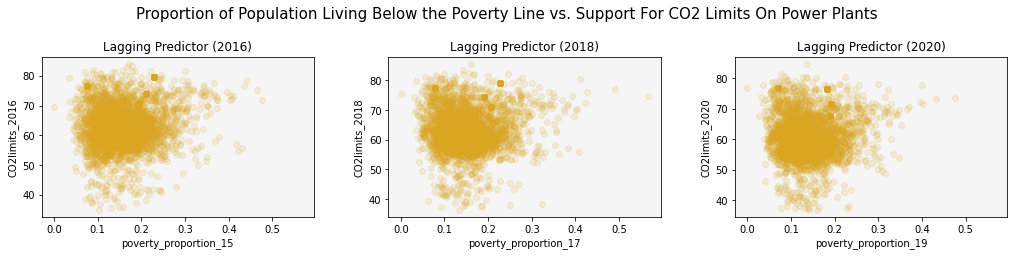

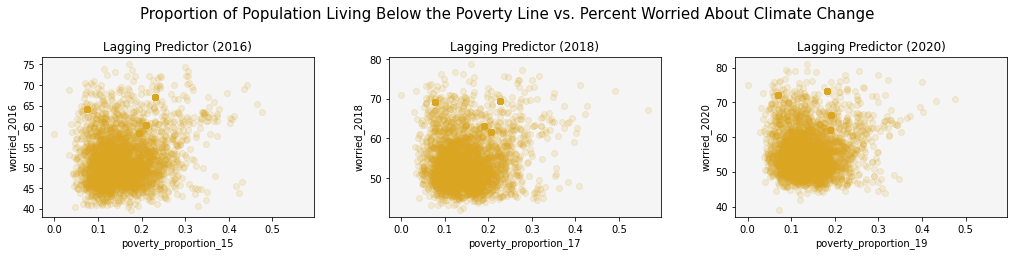

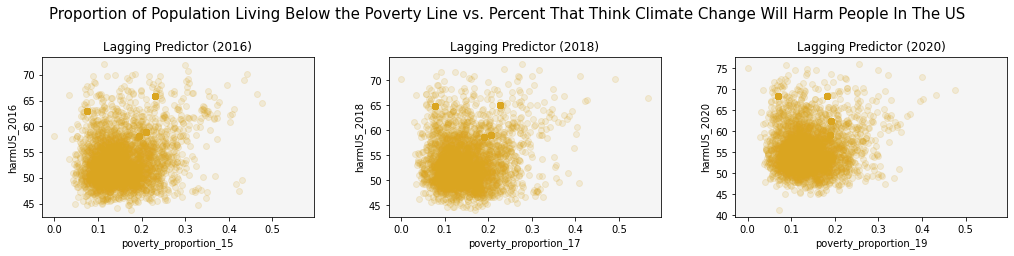

In [214]:
scatterplots_pov1 = [
                "poverty_proportion_17", 'CO2limits_2018',
                "poverty_proportion_19", 'CO2limits_2020'
                ]

scatterplots_pov2 = [
                "poverty_proportion_17", 'worried_2018',
                "poverty_proportion_19", 'worried_2020'
                ]

scatterplots_pov3 = [
                "poverty_proportion_17", 'harmUS_2018',
                "poverty_proportion_19", 'harmUS_2020'
                ]

plot_all_mhi_pop_pov("Proportion of Population Living Below the Poverty Line vs. Support For CO2 Limits On Power Plants", "poverty_proportion_15", "CO2limits_2016", scatterplots_pov1, 'goldenrod')
plot_all_mhi_pop_pov("Proportion of Population Living Below the Poverty Line vs. Percent Worried About Climate Change", "poverty_proportion_15", "worried_2016", scatterplots_pov2, 'goldenrod')
plot_all_mhi_pop_pov("Proportion of Population Living Below the Poverty Line vs. Percent That Think Climate Change Will Harm People In The US", "poverty_proportion_15", "harmUS_2016", scatterplots_pov3, 'goldenrod')

**Data Source 10:** Both of sets of scatterplots above fail to reveal a strong association between the features and target variables. While there may be some slight association, the scatterplots are too cloudy to make any qualitative or visual conclusions. Feature selection in the modeling selection will shed more light on the importance of these features in prediction.

## Notes on Transformation 

We used the scatterplots in the EDA Visualizations to inform the transformation decisions. Based on this, I decided to LOG TRANSFORM two of the features: county population totals and number of fossil fueled power plants. The transformation involved adding 1 to all values before taking the logarithm of the feature (to avoid issues with infinite values), and adding the log transformed feature as a new feature to the merged DataFrame. Because the project is only concerned with prediction problems and not the actual relationship between x and y, this non-linear transformation will not negatively imapct the conclusions. It is even possible that the transformed features will improve the accuracy of the models, which we'll be able to judge based on feature importance plots in the modeling section. I decided that the rest of the features did not need to be transformed because their correlation plots had either no clear association or a linear association.

In [216]:
#log transformation based on scatter plots

final_huge['pop_2015_log'] = np.log(final_huge['pop_2015'] + 1)
final_huge['pop_2017_log'] = np.log(final_huge['pop_2017'] + 1)
final_huge['pop_2019_log'] = np.log(final_huge['pop_2019'] + 1)

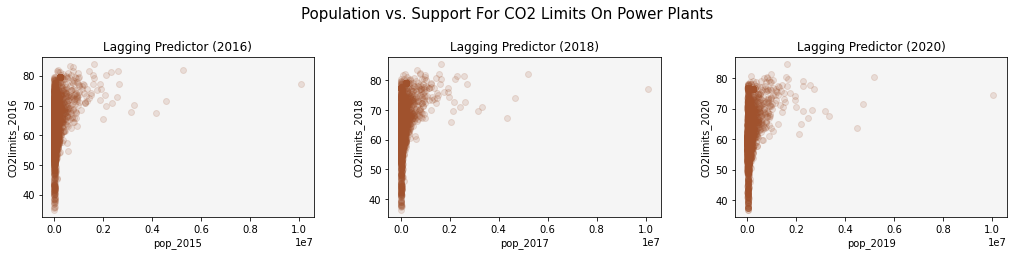

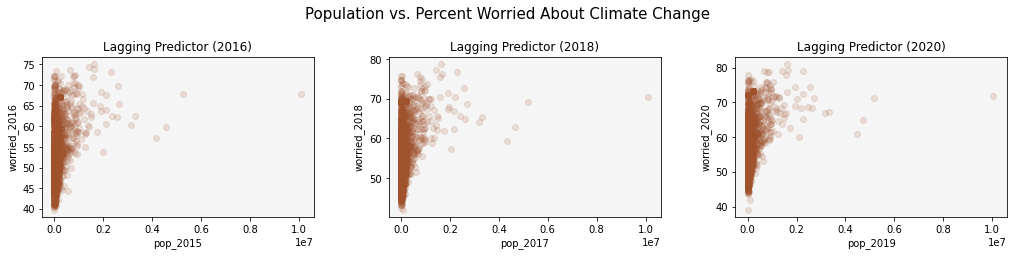

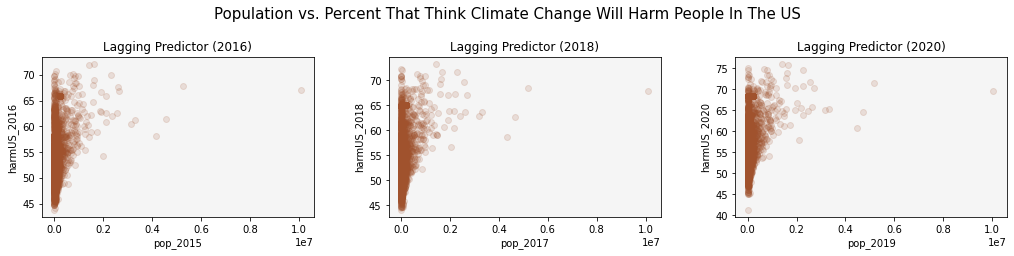

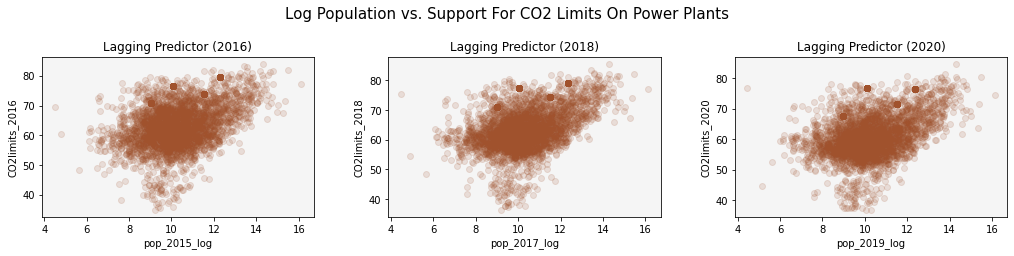

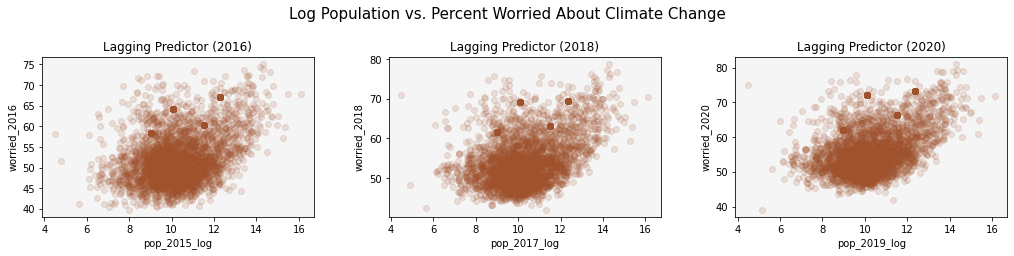

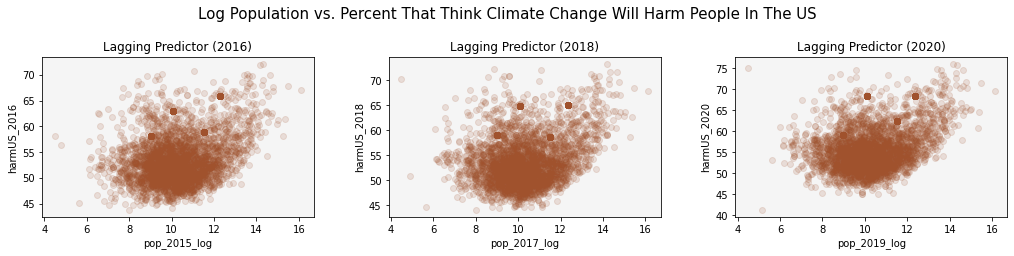

In [217]:


scatterplots_pop1 = [
                "pop_2017_log", 'CO2limits_2018',
                "pop_2019_log", 'CO2limits_2020'
                ]

scatterplots_pop2 = [
                "pop_2017_log", 'worried_2018',
                "pop_2019_log", 'worried_2020'
                ]

scatterplots_pop3 = [
                "pop_2017_log", 'harmUS_2018',
                "pop_2019_log", 'harmUS_2020'
                ]

scatterplots_pop4 = [
                "pop_2017", 'CO2limits_2018',
                "pop_2019", 'CO2limits_2020'
                ]

scatterplots_pop5 = [
                "pop_2017", 'worried_2018',
                "pop_2019", 'worried_2020'
                ]

scatterplots_pop6 = [
                "pop_2017", 'harmUS_2018',
                "pop_2019", 'harmUS_2020'
                ]

plot_all_mhi_pop_pov("Population vs. Support For CO2 Limits On Power Plants", "pop_2015", "CO2limits_2016", scatterplots_pop4, 'sienna')
plot_all_mhi_pop_pov("Population vs. Percent Worried About Climate Change", "pop_2015", "worried_2016", scatterplots_pop5, 'sienna')
plot_all_mhi_pop_pov("Population vs. Percent That Think Climate Change Will Harm People In The US", "pop_2015", "harmUS_2016", scatterplots_pop6, 'sienna')

plot_all_mhi_pop_pov("Log Population vs. Support For CO2 Limits On Power Plants", "pop_2015_log", "CO2limits_2016", scatterplots_pop1, 'sienna')
plot_all_mhi_pop_pov("Log Population vs. Percent Worried About Climate Change", "pop_2015_log", "worried_2016", scatterplots_pop2, 'sienna')
plot_all_mhi_pop_pov("Log Population vs. Percent That Think Climate Change Will Harm People In The US", "pop_2015_log", "harmUS_2016", scatterplots_pop3, 'sienna')

In [218]:
#addtl log transformations.

final_huge['num_pp_2014_log'] = np.log(final_huge['num_pp_2014'] + 1)
final_huge['num_pp_2016_log'] = np.log(final_huge['num_pp_2016'] + 1)
final_huge['num_pp_2018_log'] = np.log(final_huge['num_pp_2018'] + 1)
final_huge['num_pp_2015_log'] = np.log(final_huge['num_pp_2015'] + 1)
final_huge['num_pp_2017_log'] = np.log(final_huge['num_pp_2017'] + 1) 
final_huge['num_pp_2019_log'] = np.log(final_huge['num_pp_2019'] + 1)

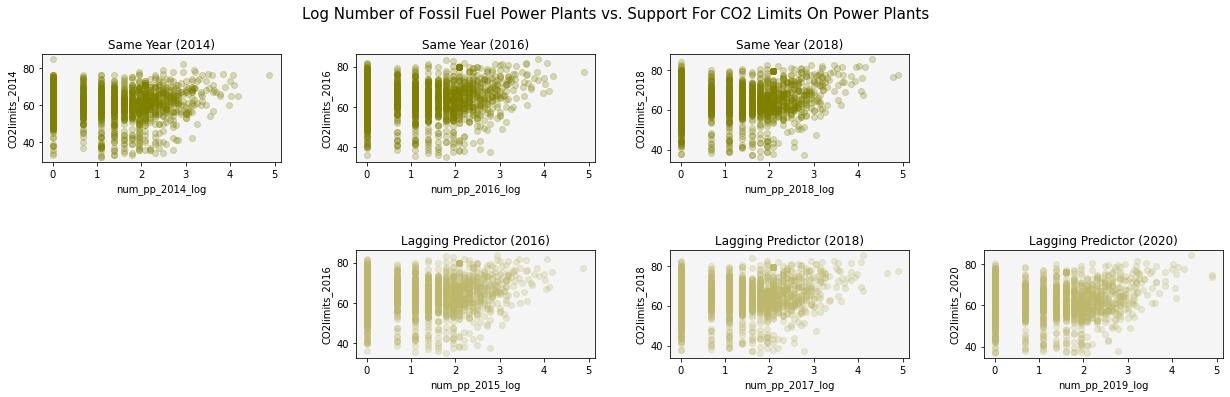

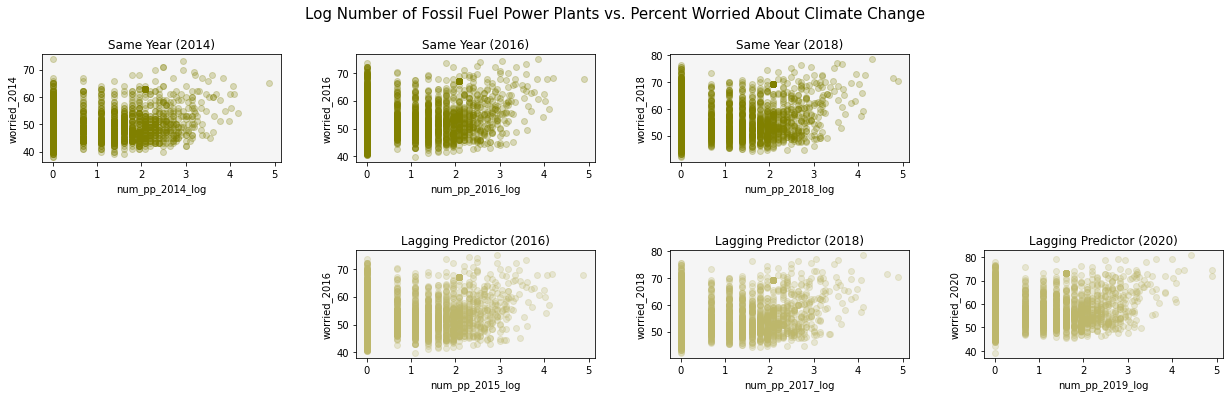

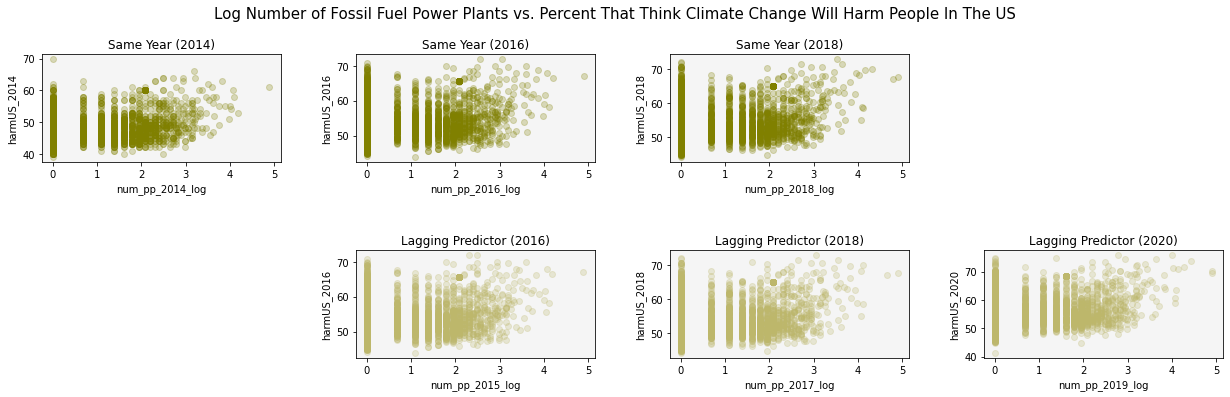

In [219]:



scatterplots_powerplants1 = [
                "num_pp_2016_log", 'CO2limits_2016',
                "num_pp_2018_log", 'CO2limits_2018', 
                "num_pp_2015_log", 'CO2limits_2016',
                "num_pp_2017_log", 'CO2limits_2018',
                "num_pp_2019_log", 'CO2limits_2020'
                ]

scatterplots_powerplants2 = [
                "num_pp_2016_log", 'worried_2016',
                "num_pp_2018_log", 'worried_2018', 
                "num_pp_2015_log", 'worried_2016',
                "num_pp_2017_log", 'worried_2018',
                "num_pp_2019_log", 'worried_2020'
                ]

scatterplots_powerplants3 = [
                "num_pp_2016_log", 'harmUS_2016',
                "num_pp_2018_log", 'harmUS_2018', 
                "num_pp_2015_log", 'harmUS_2016',
                "num_pp_2017_log", 'harmUS_2018',
                "num_pp_2019_log", 'harmUS_2020'
                ]

plot_all_extraction_num_pp("Log Number of Fossil Fuel Power Plants vs. Support For CO2 Limits On Power Plants", "num_pp_2014_log", 'CO2limits_2014', scatterplots_powerplants1)
plot_all_extraction_num_pp("Log Number of Fossil Fuel Power Plants vs. Percent Worried About Climate Change", "num_pp_2014_log", 'worried_2014', scatterplots_powerplants2)
plot_all_extraction_num_pp("Log Number of Fossil Fuel Power Plants vs. Percent That Think Climate Change Will Harm People In The US", "num_pp_2014_log", 'harmUS_2014', scatterplots_powerplants3)

**Data Source 7 & Data Source 9:** The features in both sets of scatterplots above (Population and Number of Fossil Fuel Power Plants) when originally plotted had a somewhat logarithmic trend. By taking the logarithm of the independent variables, the logarithmic model was created for each feature. These transformed plots reveal much of the data that was "squashed" close to x values of 0. These versions of the features have a more linear association, although the association is quite amorphous. Feature selection during the modeling process will highlight whether such transformation helps the predictive models perform better.

# **FORECASTING AND PREDICTION MODELING**

> **CONTENTS OF THIS SECTION**:
> * Models used
> * Create train/test data
> * Write functions for models
> * Prediction Question 1: CO2 limits
> * Prediction Question 2: Worried about global warming
> * Prediction Question 3: Global warming will harm USA
> * Predicting 2022 values for Questions 1-3 using best models from each question

# Models used
Our prediction problems are all regression. I will use both parametric and nonparametric methods—given the complexity that goes into forming beliefs, I thought trying different methods would give us the best chance at getting a high-performing model. 

> **Parametric**
We used regularization methods to avoid the overfitting that could happen with OLS. I chose **lasso** because it does feature selection—feature selection could be relevant to the resource allocation (i.e. it's probably helpful if political campaigns need to collect/find less data to use this model). However, some of the features might be correlated (i.e. perhaps median income and proportion voting dem are correlated), so I thought **Ridge** would be worth trying too. Additionally, predicting climate beliefs *could* require a lot of features, in which case Ridge would be better. 

> **Non Parametric**
We tried KNN and decision trees as non-parametric methods—they could better capture non-linearity. However, when the decision tree performed well, I thought it would make sense to add in gradient boosting. Ensemble methods like gradient boosting tend to perform better than decision trees since there is a reduction variance as a result of averaging accross multiple trees.

# Creating Train/Test Data

**Approach:** I used 2016 and 2018 YCOMM data for training and 2020 for test. I did this because the whole point of the model is that it could be used to predict unseen years, so this would be the best way to mimic that. Putting 2016, 2018, and 2020 data all into one large data table, and then splitting training-testing data from that would not convince us that the model could be trusted to predict future, unseen years. 




First I create a table of columns needed to predict 2016 results (these are features mostly from the year 2015, but also the previous year survey answer (CO2limits_2014, worried_2014, harmUS_2014), election data from 2012 (president) and 2014 (midterms). 

We also include the target variables, which are in 2016 (CO2limits_2016, harmUS_2016, worried_2016. The final result is one large table that I easily can put in SKLearn later to predict 2016 results for all 3 prediction questions.

In [220]:
huge_2015 = final_huge[['CO2limits_2016', 'CO2limits_2014', 
                        'worried_2014', 'worried_2016',
                        'harmUS_2014', 'harmUS_2016',
                        'prop_dem_house_14', 'prop_dem_pres_12', 
                        'Extreme_Heat_Events_15', 'UE_Rate_15',
                        'State Prop Employed in Extraction_2015',
                        'global 2015',	'science 2015',	
                        'environment 2015',	'climate 2015',
                        'prop_18_24_HS_14', 'prop_18_24_BS_14',
                        'prop_25_HS_14', 'prop_25_BS_14',
                        'num_pp_2015_log', 'mhi_2015', 'pop_2015_log', 
                        'poverty_proportion_15']]
huge_2015['Year'] = 2016

huge_2015 = huge_2015.rename(columns={'CO2limits_2014': 'CO2limits_prev_survey',
                                      'CO2limits_2016': 'CO2limits',
                                      'worried_2014': 'worried_prev_survey', 
                                      'worried_2016': 'worried',
                                      'harmUS_2014':'harmUS_prev_survey', 
                                      'harmUS_2016': 'harmUS',
                                      'prop_dem_house_14': 'prop_dem_house',
                                      'prop_dem_pres_12': 'prop_dem_pres',
                                      'Extreme_Heat_Events_15': 'Extreme_Heat_Events',
                                      'UE_Rate_15': 'UE_Rate',
                                      'State Prop Employed in Extraction_2015': 'State Prop Employed in Extraction',
                                      'global 2015':'global',	
                                      'science 2015': 'science',	
                                      'environment 2015': 'environment',	
                                      'climate 2015': 'climate',
                                      'num_pp_2015_log': 'num_pp_log',
                                      'prop_18_24_HS_14':'prop_18_24_HS', 
                                      'prop_18_24_BS_14':'prop_18_24_BS', 
                                      'prop_25_HS_14':'prop_25_HS', 
                                      'prop_25_BS_14':'prop_25_BS', 
                                      'mhi_2015':'mhi',  
                                      'pop_2015_log':'log_population',
                                      'poverty_proportion_15': 'poverty_proportion'
                                      })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


We do the same to create a table used to predict 2018 results using features from perior years (largely from 2017).

In [221]:
huge_2017 = final_huge[['CO2limits_2018', 'CO2limits_2016','worried_2016', 'worried_2018',
                        'harmUS_2016', 'harmUS_2018','prop_dem_house_16', 'prop_dem_pres_16',
                        'Extreme_Heat_Events_17', 'UE_Rate_17', 
                        'State Prop Employed in Extraction_2017', 'global 2017',
                        'science 2017',	'environment 2017',	'climate 2017', 
                        'prop_18_24_HS_14', 'prop_18_24_BS_14', 'prop_25_HS_14',
                        'prop_25_BS_14', 'num_pp_2017_log',
                        'mhi_2017', 'pop_2017_log', 'poverty_proportion_17']]

huge_2017['Year'] = 2018

huge_2017 = huge_2017.rename(columns={'CO2limits_2016': 'CO2limits_prev_survey',
                                      'CO2limits_2018': 'CO2limits',                                       
                                      'worried_2016': 'worried_prev_survey', 
                                      'worried_2018': 'worried',
                                      'harmUS_2016':'harmUS_prev_survey', 
                                      'harmUS_2018': 'harmUS',
                                      'prop_dem_house_16': 'prop_dem_house',
                                      'prop_dem_pres_16': 'prop_dem_pres',
                                      'Extreme_Heat_Events_17': 'Extreme_Heat_Events',
                                      'UE_Rate_17': 'UE_Rate',
                                      'State Prop Employed in Extraction_2017': 'State Prop Employed in Extraction',
                                      'global 2017':'global',	
                                      'science 2017': 'science',	
                                      'environment 2017': 'environment',	
                                      'climate 2017': 'climate',
                                      'num_pp_2017_log': 'num_pp_log',
                                      'prop_18_24_HS_14':'prop_18_24_HS', 
                                      'prop_18_24_BS_14':'prop_18_24_BS', 
                                      'prop_25_HS_14':'prop_25_HS', 
                                      'prop_25_BS_14':'prop_25_BS', 
                                      'mhi_2017':'mhi',  
                                      'pop_2017_log': 'log_population',
                                      'poverty_proportion_17': 'poverty_proportion'
                                      })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


And then also doing the same for the table used to predict 2020 results (largely data from 2019).

In [222]:
huge_2019 = final_huge[['CO2limits_2020', 'CO2limits_2018', 'worried_2018',
                        'worried_2020','harmUS_2018', 'harmUS_2020',
                        'prop_dem_house_18', 'prop_dem_pres_16', 
                        'Extreme_Heat_Events_19', 'UE_Rate_19',
                        'State Prop Employed in Extraction_2019',
                        'global 2019',	'science 2019',	'environment 2019',
                        'climate 2019', 'prop_18_24_HS_19', 'prop_18_24_BS_19', 
                        'prop_25_HS_19', 'prop_25_BS_19', 
                        'num_pp_2019_log', 'mhi_2019', 
                        'pop_2019_log', 'poverty_proportion_19']]

huge_2019['Year'] = 2020

huge_2019 = huge_2019.rename(columns={'CO2limits_2018': 'CO2limits_prev_survey',
                                      'CO2limits_2020': 'CO2limits', 
                                      'worried_2018': 'worried_prev_survey', 
                                      'worried_2020': 'worried',
                                      'harmUS_2018':'harmUS_prev_survey', 
                                      'harmUS_2020': 'harmUS',
                                      'prop_dem_house_18': 'prop_dem_house',
                                      'prop_dem_pres_16': 'prop_dem_pres',
                                      'Extreme_Heat_Events_19': 'Extreme_Heat_Events',
                                      'UE_Rate_19': 'UE_Rate',
                                      'State Prop Employed in Extraction_2019': 'State Prop Employed in Extraction',
                                      'global 2019':'global',	
                                      'science 2019': 'science',	
                                      'environment 2019': 'environment',	
                                      'climate 2019': 'climate',
                                      'num_pp_2019_log': 'num_pp_log',
                                      'prop_18_24_HS_19':'prop_18_24_HS', 
                                      'prop_18_24_BS_19':'prop_18_24_BS', 
                                      'prop_25_HS_19':'prop_25_HS', 
                                      'prop_25_BS_19':'prop_25_BS',
                                      'mhi_2019':'mhi', 
                                      'pop_2019_log': 'log_population',
                                      'poverty_proportion_19': 'poverty_proportion'
                                      })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Imputing Missing Values Using SKLearn 

Now that I have the data tables for each year that we're predicting for (2016, 2018, 2020), I are almost ready to pass into models in SKLearn. However, I must first remove missing values. **To do this, I impute using the mean**

**Justification:** As discussed in the "Checking for Missing Values in FINAL TABLE" section, very, very few of the observations have missing values. Since this is so small, I use SKLearn's SimpleImputer to replace NaN values with the mean of the entire column. 




In [223]:
#importing relevant sklearn modules

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [224]:
def imputing_nan(df):
  """takes in dataframe and returns df with missing values inputed with mean"""
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer = imputer.fit(df)
  df.iloc[:,:] = imputer.transform(df)
  return df

In [225]:
#here I actually perform NaN imputations on the 3 data frames 
#(huge_2015 is to predict for 2016, huge_2017 is to predict for 2018, huge_2019 to predict for test data, 2020)
huge_2015_imputed = imputing_nan(huge_2015)
huge_2017_imputed = imputing_nan(huge_2017)
huge_2019_imputed = imputing_nan(huge_2019)

We start creating the training data table. I are training using 2016, 2018 results (and later testing on 2020), so I combined the two tables (huge_2015_imputed and huge_2017_imputed) which contain the features (largely from 2015 and 2017) and target variables. 


In [226]:
training = pd. concat([huge_2015_imputed, huge_2017_imputed], axis=0)
training.head()

CO2limits  CO2limits_prev_survey  ...  poverty_proportion    Year
0     58.696                   54.0  ...            0.126969  2016.0
1     58.028                   55.0  ...            0.127827  2016.0
2     68.756                   54.0  ...            0.280790  2016.0
3     58.667                   50.0  ...            0.200124  2016.0
4     57.519                   59.0  ...            0.146004  2016.0

[5 rows x 24 columns]

For each prediction question (CO2limits, worried about climate change, think it will harm the USA), I create the X_train and y_train values containing the specific columns that are relevant

(i.e. for "CO2 limits", I drop columns like "worried about climate change", since that won't be used to train)

In [227]:
X_train_co2 = training.drop(columns=['Year', 'CO2limits','worried_prev_survey',	'worried',	'harmUS_prev_survey',	'harmUS'])
y_train_co2 = training['CO2limits']

X_train_worried = training.drop(columns=['Year', 'CO2limits','CO2limits_prev_survey',	'worried',	'harmUS_prev_survey',	'harmUS'])
y_train_worried = training['worried']

X_train_harmUS = training.drop(columns=['Year', 'CO2limits','CO2limits_prev_survey',	'worried',	'worried_prev_survey',	'harmUS'])
y_train_harmUS = training['harmUS']

Do the same for the testing columns (same as process above, just using huge_2019 rather than training.

In [228]:
X_test_co2 = huge_2019.drop(columns=['Year', 'CO2limits','worried_prev_survey',	'worried',	'harmUS_prev_survey',	'harmUS'])
y_test_co2 = huge_2019['CO2limits']

X_test_worried = huge_2019.drop(columns=['Year', 'CO2limits','CO2limits_prev_survey',	'worried',	'harmUS_prev_survey',	'harmUS'])
y_test_worried = huge_2019['worried']

X_test_harmUS = huge_2019.drop(columns=['Year', 'CO2limits','CO2limits_prev_survey',	'worried',	'worried_prev_survey',	'harmUS'])
y_test_harmUS = huge_2019['harmUS']

#Writing functions for models
Here I write the functions required to train and test the models.

Defining functions for modeling and visualizing results. Descriptions for each function are included underneath the definition line.

In [229]:
def get_X_y_stnd(X_train, X_test):
  """takes in X_train, X_test and returns standardized form of these variables"""
  # Standardize the data
  scaler_1 = StandardScaler()
  scaler_1.fit(X_train)
  X_train_stnd = scaler_1.transform(X_train)
  X_train_stnd_df = pd.DataFrame(X_train_stnd, index=X_train.index, columns=X_train.columns)
  
  scaler_2 = StandardScaler()
  scaler_2.fit(X_test)
  X_test_stnd = scaler_2.transform(X_test)
  X_test_stnd_df = pd.DataFrame(X_test_stnd, index=X_test.index, columns=X_test.columns)
  return X_train_stnd_df, X_test_stnd_df

In [230]:
def lasso_ridge_model_sklearncv(X_train, X_test, y_train, y_test, Model, alpha_list, num_splits):
  """This function takes uses sklearn's cross validation module to calculate the best lambda value and metrics of interest. 
     Input: training data (X and y), test data (X and y), range of alpha values to test, number of folds for cross-
     validation
     Output: best model, its coefficients and residuals"""
  
  if Model == RidgeCV:
    kf = KFold(n_splits=num_splits,shuffle=True, random_state=2021)
    ridgecv = RidgeCV(cv = kf, alphas=alpha_list)
    ridgecv.fit(X_train, y_train)
    alpha_opt = ridgecv.alpha_
    best_model = Ridge(alpha=alpha_opt, random_state=2021)

  else:
    kf = KFold(n_splits=num_splits,shuffle=True, random_state=2021)
    lassocv = LassoCV(cv = kf, alphas=alpha_list)
    lassocv.fit(X_train, y_train)
    alpha_opt = lassocv.alpha_
    best_model = Lasso(alpha=alpha_opt, random_state=2021)

  best_model.fit(X_train, y_train)
  mse_test = mean_squared_error(y_test, best_model.predict(X_test))
  coef = best_model.coef_.flatten()
  r2 = r2_score(y_test, best_model.predict(X_test))
  residual = best_model.predict(X_test) - y_test
  mse_train = mean_squared_error(y_train, best_model.predict(X_train))

  print("Optimal alpha:", alpha_opt)
  print("Training MSE", mse_train)
  print("R^2", r2)
  print("Test MSE", mse_test)

  return best_model, coef, residual


In [231]:
def model_cv_mse(SKL_model, X_train, y_train, X_test, y_test, alphas, k = 5, random_state = 2021):
    """
    This function calculates the MSE resulting from k-fold CV using Lasso or Ridge regression performed on a training subset of 
    X and y for different values of alpha.
    Inputs: 
        SKL_model (sklearn model): the type of sklearn model with which to fit the data - options include Ridge, or Lasso
        X: the set of features used to fit the model
        y: the set of response variable observations
        alphas: a list of penalty parameters
        k: number of folds in k-fold cross-validation
        random_state: a random seed to use in KFold
    Returns:
        mses: a list containing the mean squared cross-validation error corresponding to each value of alpha
    """
    mses = np.full((k, len(alphas)),np.nan) # initialize array of null values. Each row should represent one of the k folds. Each column should represent a value of alpha.
        
    kf = KFold(k, random_state=random_state,shuffle=True) # get kfold split
    
    fold = 0
    for train_i, val_i in kf.split(X_train): # loop through k folds
        # get the training and validation data for each fold
        X_f_train = X_train.iloc[train_i]
        X_f_val = X_train.iloc[val_i]
        y_f_train = y_train.iloc[train_i]
        y_f_val = np.array(y_train)[val_i]
        
        for i in range(len(alphas)): # loop through each value of alpha
            model = SKL_model(alpha=alphas[i]) # initialize model
            model.fit(X_f_train, y_f_train) # fit model
            y_pred = model.predict(X_f_val) # get predictions on the validation data
            mses[fold,i] = np.mean((y_pred - y_f_val)**2)  # save the MSE for this fold and alpha value
            
        fold += 1 # move on to the next fold
    
    average_mses = np.mean(mses, axis=0) # get the average MSE for each alpha value across all folds
    alpha_opt = alphas[np.argmin(average_mses)] 
    min_mse = min(average_mses)
    
    print("optimal alpha:", alpha_opt)
    print("Minimum MSE:", min_mse)
    
    return average_mses

def plot_mse(_range, model_CV, model_name):
    """plots average mse for each alpha value that was tested """
    plt.plot(_range, model_CV, label=model_name)
    plt.title('Alpha Value vs Average MSE: '+ model_name)
    plt.xlabel('alpha')
    plt.ylabel('MSE')

In [232]:
def knn(X_train, y_train, X_test, y_test, K_values):
  """performs 5 fold cross validation to determine optimal K for K Nearest Neighbours Regression and calculates metrics of interest"""
  cv_scores = []
  # 5-fold cross-validation
  for K in K_values:
    model = KNeighborsRegressor(n_neighbors = K)
    scores = cross_val_score(model, X_train, y_train, scoring ="neg_mean_squared_error", cv=5)
    cv_scores.append(scores.mean())
  
  best_k = K_values[np.argmax(cv_scores)] + 1
  best_model = KNeighborsRegressor(n_neighbors = K)
  best_model.fit(X_train, y_train)

  mse_test = mean_squared_error(y_test, best_model.predict(X_test))
  r2 = r2_score(y_test, best_model.predict(X_test))
  residual = best_model.predict(X_test) - y_test
  mse_train = mean_squared_error(y_train, best_model.predict(X_train))

  print("optimal K:", best_k)
  print("R^2:", r2)
  print("Test MSE:", mse_test)
  print("Train MSE:", mse_train)
  
  return cv_scores, residual

Below, I define decision tree functions. 
**Justification for why I chose to optimize the max_leaf_nodes, max_features, max_depth hyperparameters**: While decision trees have several potential hyperparameters that I could have tried to optimize, I settled on these three. Rather than increasing the computation time trying to optimize for numerous hyperparameters, I thought some simplicity would be valuable. From class and lab, I know these will help us prevent overfit, which is ultimately the goal, anyways. 


In [233]:
def decision_tree(X_train, y_train, X_test, y_test, param_dist):
  """Uses RandomizedSearchCV to perform 5 fold cross validation to determine the optimal max_leaf_nodes, max_features and max_depth values,
   calculates metrics of interest"""
  regressor = DecisionTreeRegressor(random_state=2021)
  regressor.fit(X_train, y_train)
  rnd_tree_search = RandomizedSearchCV(regressor, param_distributions=param_dist, cv=5, n_iter=10)
  rnd_tree_search.fit(X_train, y_train)
  regressor = DecisionTreeRegressor(random_state=2021, 
                                     max_leaf_nodes = rnd_tree_search.best_params_["max_leaf_nodes"],
                                     max_features = rnd_tree_search.best_params_["max_features"],
                                     max_depth = rnd_tree_search.best_params_["max_depth"]
                                    )
  regressor.fit(X_train, y_train)

  mse_test = mean_squared_error(y_test, regressor.predict(X_test))
  r2 = regressor.score(X_test, y_test)
  residual = regressor.predict(X_test) - y_test
  mse_train = mean_squared_error(y_train, regressor.predict(X_train))

  print('Train MSE:', mse_train)
  print('R^2:', r2)
  print('Test MSE:', mse_test)

  return regressor, residual 

In addition to a regression tree, I use gradient boosting, an ensemble method. I used cross validation to subsample (fraction of samples to be used for fitting the individual decision trees) and the learning rate. 

In [235]:
def gradient_boosting(X_train, y_train, X_test, y_test, param_dist):
  """Uses RandomizedSearchCV to perform 5 fold cross validation to determine the optimal learning_rate and subsample values,
   calculates metrics of interest"""
  X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2021)
  gb_tree = GradientBoostingRegressor(random_state=2021)
  gb_tree.fit(X_train_1, y_train_1)
  rnd_gb_search = RandomizedSearchCV(gb_tree, param_distributions=param_dist, cv=5, n_iter=10)
  rnd_gb_search.fit(X_train_1, y_train_1)
  gb_tree = GradientBoostingRegressor(random_state=2021, n_estimators=150, 
                                     learning_rate =rnd_gb_search.best_params_["learning_rate"],
                                     subsample = rnd_gb_search.best_params_["subsample"])
  gb_tree.fit(X_train_1, y_train_1)

  gb_train_score = gb_tree.score(X_train_1, y_train_1)
  gb_val_score = gb_tree.score(X_val, y_val)
  gb_test_score = gb_tree.score(X_test, y_test)

  mse_test = mean_squared_error(y_test, gb_tree.predict(X_test))
  r2 = gb_tree.score(X_test, y_test)
  residual = gb_tree.predict(X_test) - y_test
  mse_train = mean_squared_error(y_train, gb_tree.predict(X_train))

  print('Train MSE:', mse_train)
  print('R^2:', r2)
  print('Test MSE:', mse_test)

  return gb_tree, residual

def importance_plot(tree, X_train):
    """Creates a plot to visualize variance importance measures for each feature"""
    # YOUR CODE HERE
    feature_importance = tree.feature_importances_ # get the importance of each feature
    
    #calculate the relative feature importances 
    relative_importance = (feature_importance/max(feature_importance))*100
    
    # Save to a dataframe with two columns: One holding the names of the features, 
    # and one holding the associated relative importance of each feature.
    feat_df = pd.DataFrame({'feature':X_train.columns, 'relative importance':relative_importance})
    
    # Sort feat_df in order of importance
    feat_df = feat_df.sort_values(by='relative importance', ascending=True)
    
    plt.figure(figsize=(8, 7.5))
    plt.title('Relative Feature Importance Plot')
    
    # Create a bar chart. The widths of the bars should correspond to the importances, 
    # and y should correspond to the names of the features. 
    plt.barh(width=feat_df['relative importance'], y=feat_df['feature'])
    plt.xlabel('Relative Feature Importance Plot');

In [236]:
def visualize_coef(coef_):
  """viz lasso ridge coef""" 
  ind = np.arange(coef_.shape[1])
  width = 0.25
  pos = np.array([ind - width, ind, ind + width])
  modelNames = ["Lasso", "Ridge"]
  fig = plt.figure(figsize = (15,6))
 
  for i in np.arange(coef_.shape[0]):
    plt.bar(pos[i], height = coef_[i,:], width = width, label = modelNames[i], tick_label=np.arange(1,19,1))
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Feature coefficients")
    plt.title("Model comparisons")
    plt.yscale('symlog')
    #plt.xticks(np.arange(1,19,1))
    plt.tight_layout()

In [237]:
def plotresiduals(resid_Lasso, resid_Ridge, resid_regtree, resid_gbtree, y_test, pred_problem):
  """plots the residuals of the regression models to analyse bias"""
  ypred_Lasso = resid_Lasso + y_test
  ypred_Ridge = resid_Ridge + y_test
  ypred_regtree = resid_regtree + y_test
  ypred_gbtree = resid_gbtree + y_test
  
  fig = plt.figure(figsize = (20,16))
  fig.suptitle(pred_problem + ' Regression Results', fontsize=18)

  plt.subplot(421)
  plt.plot(y_test, y_test, color = 'red')
  plt.scatter(ypred_Lasso, y_test)
  plt.title('Predicted vs actual survey response using Lasso regression')
  plt.ylabel('Predicted survey response')
  plt.xlabel('Actual survey response');
  
  plt.subplot(422)
  plt.axhline(0, color = 'r')
  plt.scatter(y_test, resid_Lasso)
  plt.title('Residual vs actual survey response using Lasso regression')
  plt.ylabel('Residual')
  plt.xlabel('Survey response');
  
  plt.subplot(423)
  plt.plot(y_test, y_test, color = 'red')
  plt.scatter(y_test, ypred_Ridge)
  plt.title('Predicted vs actual survey response using Ridge regression')
  plt.ylabel('Predicted survey response')
  plt.xlabel('Actual survey response');
  
  plt.subplot(424)
  plt.scatter(y_test,resid_Ridge)
  plt.axhline(0, color = 'r')
  plt.title('Residual vs actual survey response using using Ridge regression')
  plt.ylabel('Residual')
  plt.xlabel('Survey Response');
  
  plt.subplot(425)
  plt.plot(y_test, y_test, color = 'red')
  plt.scatter(ypred_regtree, y_test)
  plt.title('Predicted vs actual survey response using Decision Tree')
  plt.ylabel('Predicted survey response')
  plt.xlabel('Actual survey response');
  
  plt.subplot(426)
  plt.scatter(y_test, resid_regtree)
  plt.axhline(0, color = 'r')
  plt.title('Residual vs actual survey response using using Decision Tree')
  plt.ylabel('Residual')
  plt.xlabel('Survey Response');
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

  plt.subplot(427)
  plt.plot(y_test, y_test, color = 'red')
  plt.scatter(ypred_gbtree, y_test)
  plt.title('Predicted vs actual survey response using Gradient Boosting')
  plt.ylabel('Predicted survey response')
  plt.xlabel('Actual survey response');
  
  plt.subplot(428)
  plt.scatter(y_test,resid_gbtree)
  plt.axhline(0, color = 'r')
  plt.title('Residual vs actual survey response using using Gradient Boosting')
  plt.ylabel('Residual')
  plt.xlabel('Survey Response');
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

**Choice of 5-Fold Cross Validation and Shuffle=True:** I chose a 5-fold CV based on discussions from the lab, where 5-fold seems to be a standard, and the understanding of the CV process. 5 fold created a balance between having enough folds to test on, but also ensuring that each fold had enough data to create a model that would be representative of the overall model—increasing the number of folds would create folds that are representative of the whole dataset. To that end, I also set shuffle=True, because the dataset is ordered by state, so I wanted to ensure shuffling so that some folds weren’t trained on certain states, which might bias their predictions


#Prediction Question 1: CO2 Limits

Fitting and testing models for "Should I set strict CO2 limits on coal-fired power plants"

### Model 1 & 2: Lasso and Ridge Regression




**Standardizing training and test features:** Lasso regression is a shrinkage method that allows for feature selection. Ridge is a shrinkage method known for fast computation because the model has a closed form solution and is differentiable while sending the less predictive features coefficients closer to zero. These two shrinkage methods put constraints on the size of the coefficients associated to each feature. However, the size of the constraint will depend on the magnitude of each variable. It is therefore important to standardize X_train and X_test to level the playing field for all features.

In [238]:
# standardizing data 
X_train_co2_std, X_test_co2_std = get_X_y_stnd(X_train_co2, X_test_co2)

In [239]:
X_train_co2_std.head(3)

CO2limits_prev_survey  prop_dem_house  ...  log_population  poverty_proportion
0              -1.065703       -0.420909  ...        0.388554           -0.481095
1              -0.938276       -0.784519  ...        1.282873           -0.466762
2              -1.065703        0.931512  ...       -0.114599            2.088158

[3 rows x 18 columns]

**K-Fold Cross Validation to tune hyperparameter lambda:** First, the function model_cv_mse was used to visualize hyperparamter tuning accross a wide range of lambda values of varying magnitudes of order. Once the best order was identified, lasso_ridge_model_sklearncv was used to accurately calculate the optimal lambda. The function lasso_ridge_model_sklearncv uses SKLearn's LassoCV/RidgeCV library to perform k-fold cross validation.

optimal alpha: 0.0001
Minimum MSE: 10.407100817329441


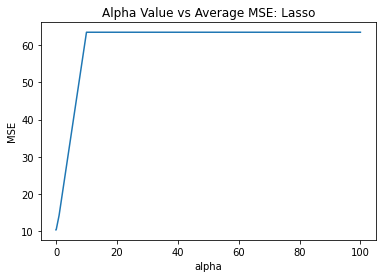

In [240]:
# Lasso CV using the own cross validation function
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
average_mses_co2_lasso = model_cv_mse(Lasso, X_train_co2_std, y_train_co2, X_test_co2_std, y_test_co2, lasso_alphas)
plot_mse(lasso_alphas, average_mses_co2_lasso, 'Lasso')

We observe that the optimal alpha is around the order of magnitude of 0.0001. Next, I zoom into this range to identify the optimal lambda.

In [242]:
# Using LassoCV from sklearn to get optimal alpha
lasso_co2, coef_co2_lasso, residual_co2_lasso = lasso_ridge_model_sklearncv(X_train_co2_std, X_test_co2_std, y_train_co2, y_test_co2, LassoCV, np.arange(0.000001,0.0001,0.000005), 5)

Optimal alpha: 6.6e-05
Training MSE 10.328281783914477
R^2 0.8194623563614749
Test MSE 11.054910992018796


In [243]:
features_space = np.array(X_train_co2_std.columns)

In [244]:
# this array shows the most highly correlated to least highly correlated features for Lasso
sorted_features_co2_LR = features_space[(-abs(coef_co2_lasso)).argsort()]
sorted_features_co2_LR

array(['CO2limits_prev_survey', 'prop_dem_pres', 'mhi', 'prop_25_HS',
       'prop_25_BS', 'UE_Rate', 'poverty_proportion',
       'State Prop Employed in Extraction', 'prop_dem_house', 'global',
       'num_pp_log', 'Extreme_Heat_Events', 'prop_18_24_HS',
       'prop_18_24_BS', 'log_population', 'science', 'environment',
       'climate'], dtype=object)

Similarly for Ridge Regression,

optimal alpha: 10
Minimum MSE: 10.406677904590245


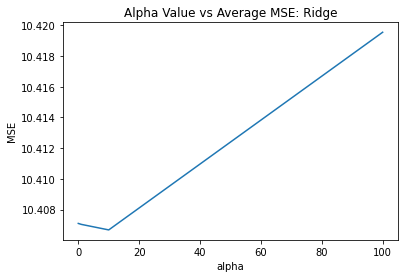

In [245]:
# Ridge regression cross validation using the own cross validation function
ridge_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
average_mses_co2_ridge = model_cv_mse(Ridge, X_train_co2_std, y_train_co2, X_test_co2_std, y_test_co2, ridge_alphas)
plot_mse(ridge_alphas, average_mses_co2_ridge, 'Ridge')

We observe that the optimal alpha is around the order of magnitude of 10. Next, I zoom into this range to identify the optimal lambda.

In [246]:
# Using RidgeCV from sklearn to get optimal alpha
ridge_co2, coef_co2_ridge, residual_co2_ridge = lasso_ridge_model_sklearncv(X_train_co2_std, X_test_co2_std, y_train_co2, y_test_co2, RidgeCV, np.arange(5,20,0.5), 5)

Optimal alpha: 16.5
Training MSE 10.3286382015095
R^2 0.81957341973455
Test MSE 11.04811021806898


In [247]:
# this array shows the most highly correlated to least highly correlated features for Lasso
sorted_features_co2_RR = features_space[(-abs(coef_co2_ridge)).argsort()]
sorted_features_co2_RR

array(['CO2limits_prev_survey', 'prop_dem_pres', 'mhi', 'prop_25_HS',
       'prop_25_BS', 'UE_Rate', 'poverty_proportion',
       'State Prop Employed in Extraction', 'prop_dem_house',
       'num_pp_log', 'Extreme_Heat_Events', 'prop_18_24_HS',
       'prop_18_24_BS', 'log_population', 'science', 'global', 'climate',
       'environment'], dtype=object)

Visualize coefficients for Lasso and Ridge

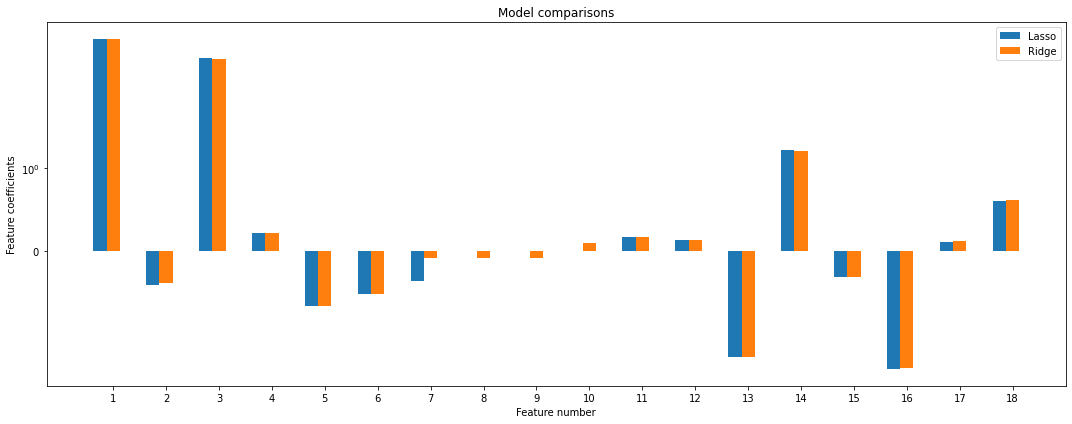

In [248]:
coef_co2 = np.array([coef_co2_lasso, coef_co2_ridge])
visualize_coef(coef_co2)

In [249]:
coef_co2_lasso.shape

(18,)

**Takeraway**: Both models found CO2limits_prev_survey, prop_dem_pres and mhi to be the most important features. As expected, Lasso performs feature selection by squashing the coefficients of less predictive features to 0.

## Model 3: KNN
We use the function knn defined above to determine the optimal k value via 5-fold cross validation. Since the optimal k is well within the range of 2-40, I don't feel a need to expand the range of K values I are testing.

In [250]:
a,b = knn(X_train_co2_std, y_train_co2, X_test_co2_std, y_test_co2, np.arange(2,40,1))

optimal K: 6
R^2: 0.8196988898527694
Test MSE: 11.040427271946946
Train MSE: 8.927365201207852


## Model 4: Decision Tree

Fit the model and use function to optimize for the specified hyperparameter ranges.

In [251]:
param_dist = {'max_leaf_nodes': np.arange(3, 100,1), 'max_features': np.arange(2, 18,1), 'max_depth': np.arange(1, 10,1)}
regtree_co2, residual_co2_regtree = decision_tree(X_train_co2_std, y_train_co2, X_test_co2_std, y_test_co2, param_dist)

Train MSE: 7.423422804278604
R^2: 0.8674438132118188
Test MSE: 8.116849299965375


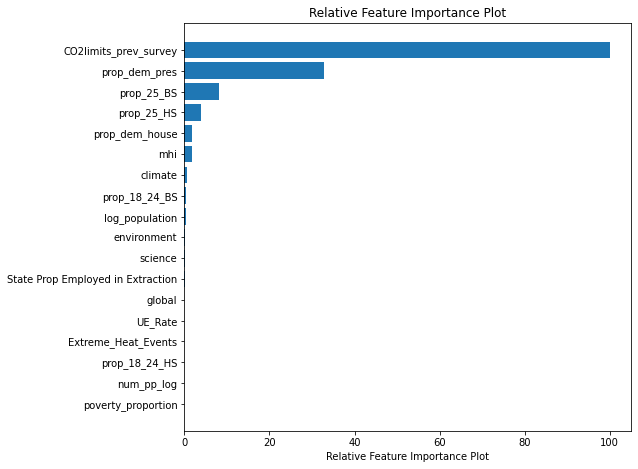

In [252]:
importance_plot(regtree_co2, X_train_co2_std)

Similar to Lasso and Ridge regression, CO2limits_prev_survey and prop_dem_pres are the most important features according to the decision tree model as well. Proportion of the county population over 25 with a Bachelor's degree is the next most important feature.

## Model 5: Gradient Boosting
Fitting the model by supplying the gradient boosting function. Small values were tested for the learning rate to slow down learning and avoid making residuals worse in some places in order to push residuals down on average.

In [253]:
param_dist = {"learning_rate":np.linspace(0.1, 0.6,10), "subsample":np.linspace(0.5,1,10)}
gb_tree_co2, residual_co2_gb_tree = gradient_boosting(X_train_co2_std, y_train_co2, X_test_co2_std, y_test_co2, param_dist)

Train MSE: 3.2505922446984656
R^2: 0.8844920254560261
Test MSE: 7.072931449181264


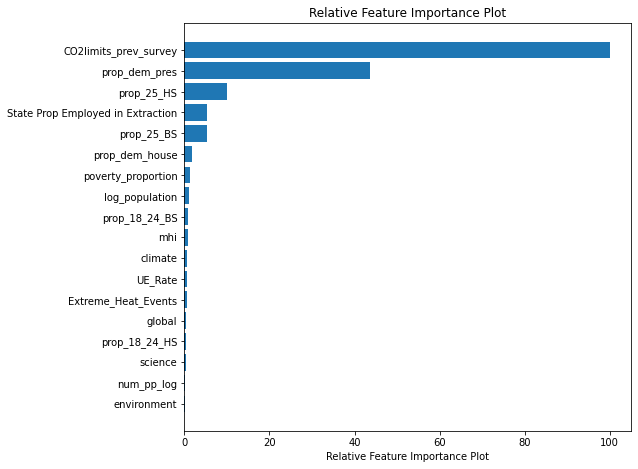

In [254]:
importance_plot(gb_tree_co2, X_train_co2_std)

Similar to Lasso, Ridge regression and decision tree, CO2limits_prev_survey and prop_dem_pres are the most important features according to the decision tree model as well. Proportion of the county population over 25 with a high school diploma is the next most important feature. <br><br> Gradient boosting was the best model with the lowest test MSE of 6.54. 

## Visualizing Predicted vs Actual Values and Residuals 

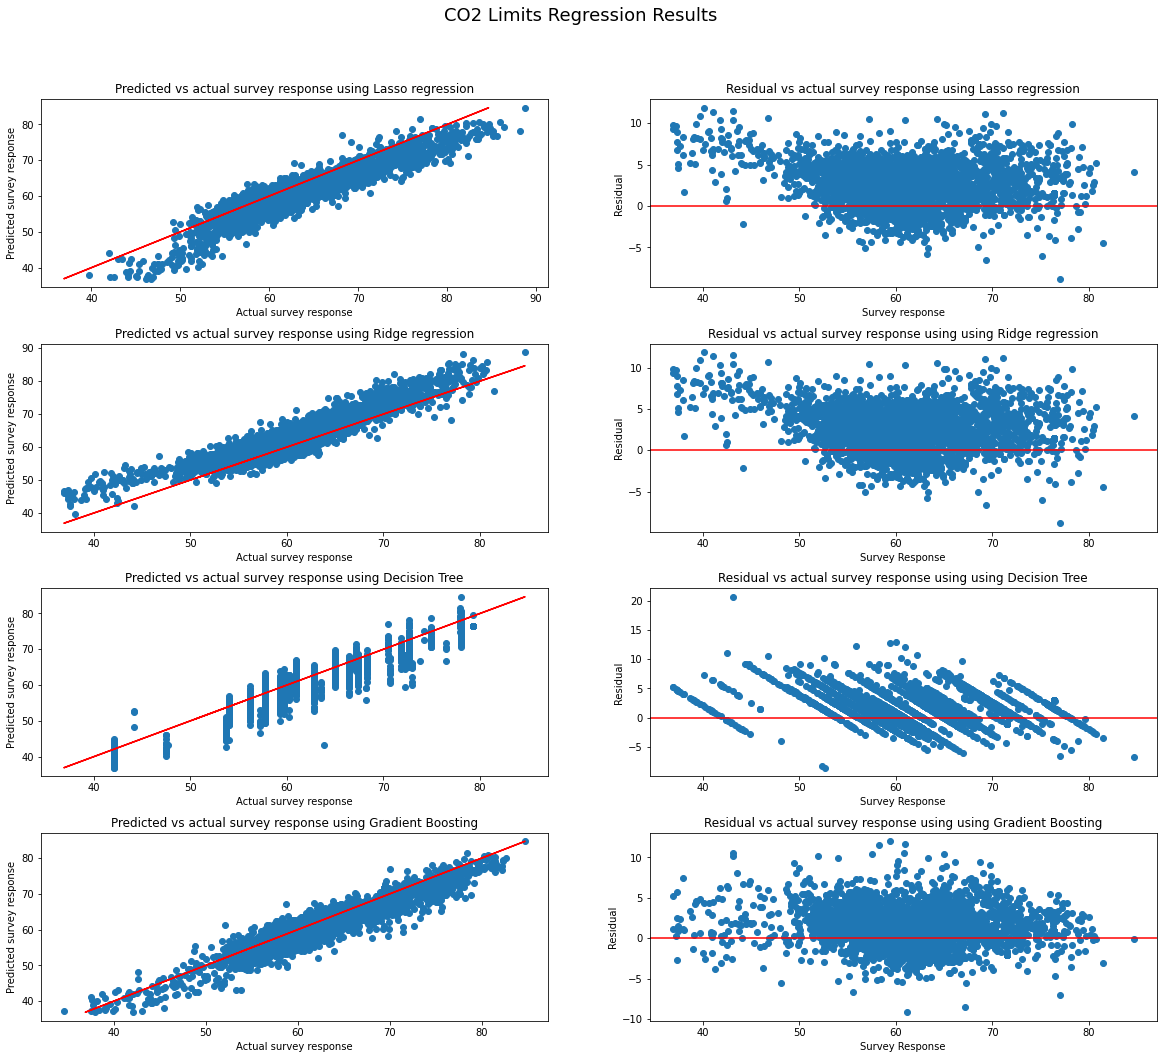

In [255]:
plotresiduals(residual_co2_lasso, residual_co2_ridge, residual_co2_regtree, residual_co2_gb_tree, y_test_co2, 'CO2 Limits')

#Prediction Question 2: Worried About Global Warming
Same method as before, fitting all models and visualizing. Same justifications as question 1 apply.

### Model 1 & 2: Lasso and Ridge Regression






**Standardizing training and test features:**

In [256]:
# standardizing data 
X_train_worried_std, X_test_worried_std = get_X_y_stnd(X_train_worried, X_test_worried)

K-Fold Cross Validation to tune hyperparameter lambda:

optimal alpha: 0.001
Minimum MSE: 4.858433945156323


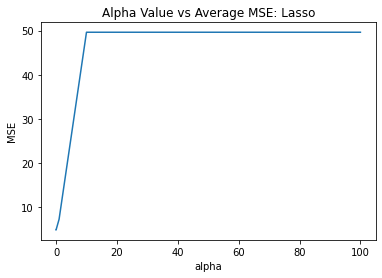

In [257]:
# Lasso CV using the own cross validation function
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
average_mses_worried_lasso = model_cv_mse(Lasso, X_train_worried_std, y_train_worried, X_test_worried_std, y_test_worried, lasso_alphas)
plot_mse(lasso_alphas, average_mses_worried_lasso, 'Lasso')

We observe that the optimal alpha is around the order of magnitude of 0.01. Next, I zoom into this range to identify the optimal lambda.

In [258]:
# Using LassoCV from sklearn to get optimal alpha
lasso_worried, coef_worried_lasso, residual_worried_lasso = lasso_ridge_model_sklearncv(X_train_worried_std, X_test_worried_std, y_train_worried, y_test_worried, LassoCV, np.arange(0.003,0.09,0.0005), 5)

Optimal alpha: 0.0055
Training MSE 4.824084897503596
R^2 0.7630516318087401
Test MSE 13.344673202992258


In [259]:
features_space_w = np.array(X_train_worried_std.columns)

In [260]:
# this array shows the most highly correlated to least highly correlated features for Lasso
sorted_features_worried_LR = features_space_w[(-abs(coef_worried_lasso)).argsort()]
sorted_features_worried_LR

array(['worried_prev_survey', 'prop_dem_pres', 'prop_25_HS',
       'poverty_proportion', 'prop_25_BS', 'global', 'mhi', 'UE_Rate',
       'prop_dem_house', 'log_population', 'prop_18_24_HS',
       'Extreme_Heat_Events', 'State Prop Employed in Extraction',
       'num_pp_log', 'prop_18_24_BS', 'science', 'climate', 'environment'],
      dtype=object)

Similarly for Ridge Regression,

optimal alpha: 10
Minimum MSE: 4.858728451159581


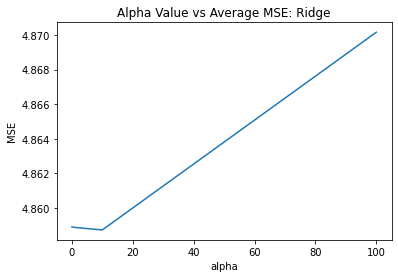

In [261]:
# Ridge regression cross validation using the own cross validation function
average_mses_worried_ridge = model_cv_mse(Ridge, X_train_worried_std, y_train_worried, X_test_worried_std, y_test_worried, ridge_alphas)
plot_mse(ridge_alphas, average_mses_worried_ridge, 'Ridge')

We observe that the optimal alpha is around the order of magnitude of 10. Next, I zoom into this range to identify the optimal lambda.

In [262]:
# Using RidgeCV from sklearn to get optimal alpha
ridge_worried, coef_worried_ridge, residual_worried_ridge = lasso_ridge_model_sklearncv(X_train_worried_std, X_test_worried_std, y_train_worried, y_test_worried, RidgeCV, np.arange(5,20,0.5), 5)

Optimal alpha: 11.0
Training MSE 4.823002379802094
R^2 0.7622491370252565
Test MSE 13.389868832379545


In [263]:
# this array shows the most highly correlated to least highly correlated features for Lasso
sorted_features_worried_RR = features_space_w[(-abs(coef_worried_ridge)).argsort()]
sorted_features_worried_RR

array(['worried_prev_survey', 'prop_dem_pres', 'prop_25_HS',
       'poverty_proportion', 'prop_25_BS', 'mhi', 'UE_Rate',
       'prop_dem_house', 'log_population', 'science', 'global',
       'environment', 'climate', 'prop_18_24_HS', 'Extreme_Heat_Events',
       'State Prop Employed in Extraction', 'prop_18_24_BS', 'num_pp_log'],
      dtype=object)

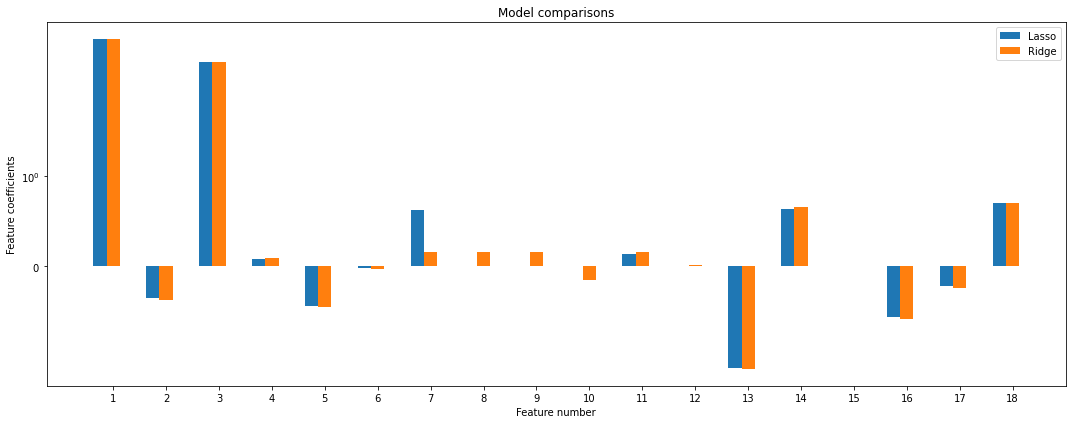

In [264]:
coef_worried = np.array([coef_worried_lasso, coef_worried_ridge])
visualize_coef(coef_worried)

Both models found worried_prev_survey, prop_dem_pres and prop_25_HS to be the most important features. As expected, Lasso performs feature selection by squashing the coefficients of less predictive features to 0.

## Model 3: KNN 


In [265]:
a,b = knn(X_train_worried_std, y_train_worried, X_test_worried_std, y_test_worried, np.arange(2,40,1))

optimal K: 9
R^2: 0.6509513115047958
Test MSE: 19.658040759925168
Train MSE: 5.032653855456819


## Model 4: Decision Tree 

In [266]:
param_dist = {'max_leaf_nodes': np.arange(3, 100,1), 'max_features': np.arange(2, 18,1), 'max_depth': np.arange(1, 10,1)}
regtree_worried, residual_worried_regtree = decision_tree(X_train_worried_std, y_train_worried, X_test_worried_std, y_test_worried, param_dist)

Train MSE: 4.481009900991004
R^2: 0.4190374262992357
Test MSE: 32.719177381918655


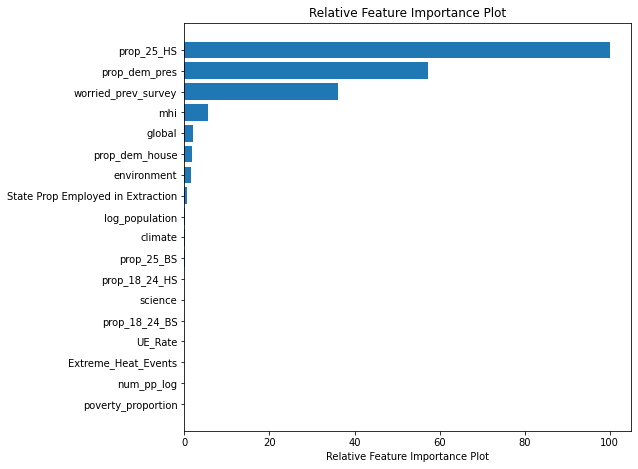

In [267]:
importance_plot(regtree_worried, X_train_worried_std)

Similar to Lasso and Ridge regression, worried_prev_survey and prop_dem_pres are the most important features according to the decision tree model as well. prop_dem_house is the next most important feature.

## Model 5: Gradient Boosting

In [268]:
param_dist = {"learning_rate":np.linspace(0.1, 0.6,10), "subsample":np.linspace(0.5,1,10)}
gb_tree_worried, residual_worried_gb_tree = gradient_boosting(X_train_worried_std, y_train_worried, X_test_worried_std, y_test_worried, param_dist)

Train MSE: 1.42692085948481
R^2: 0.646301310893995
Test MSE: 19.919923713661166


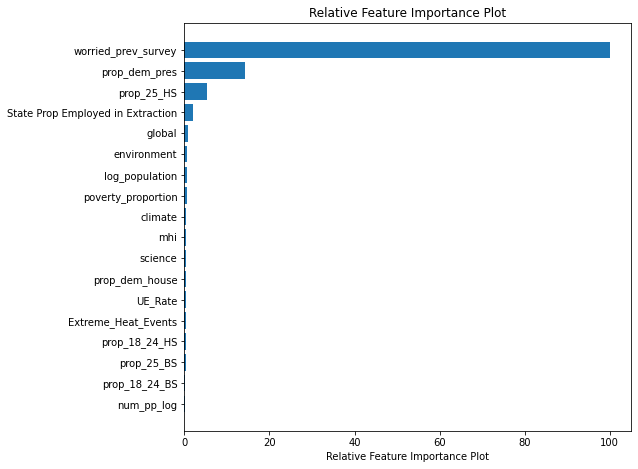

In [269]:
importance_plot(gb_tree_worried, X_train_worried_std)

Lasso regression was the best model with the lowest test MSE of 13.34

## Visualizing Predicted vs Actual and Residuals

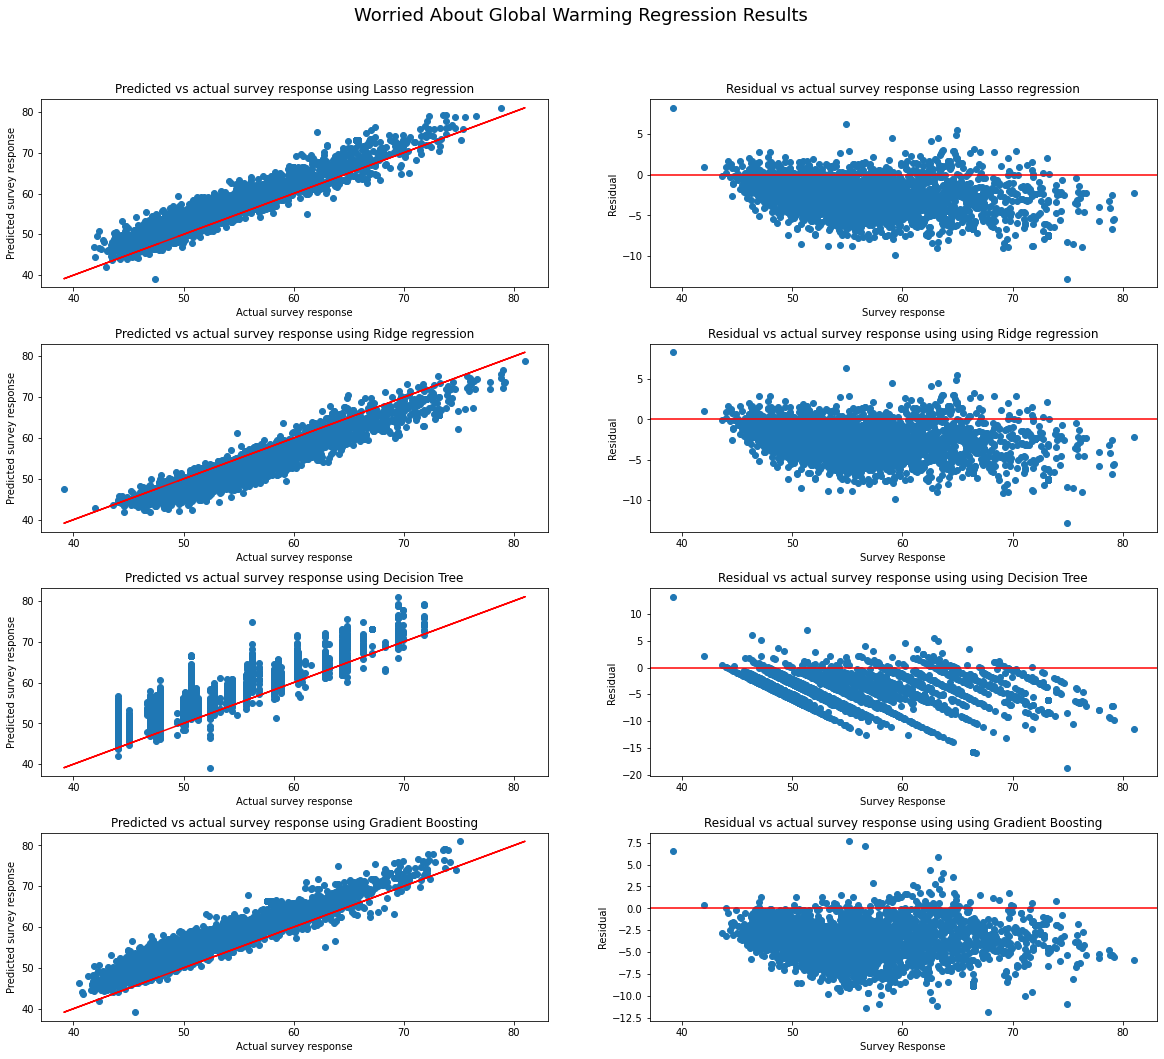

In [270]:
plotresiduals(residual_worried_lasso, residual_worried_ridge, residual_worried_regtree, residual_worried_gb_tree, y_test_worried, 'Worried About Global Warming')

#Prediction Question 3: Belief that Global Warming will Harm the USA

### Model 1 & 2: Lasso and Ridge Regression


**Standardizing training and test features:**

In [272]:
# standardizing data 
X_train_harmUS_std, X_test_harmUS_std = get_X_y_stnd(X_train_harmUS, X_test_harmUS)

**K-Fold Cross Validation to tune hyperparameter lambda:**

optimal alpha: 0.001
Minimum MSE: 3.2047537034400833


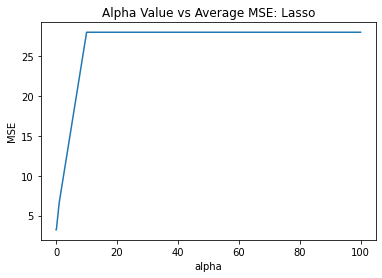

In [273]:
# Lasso CV using the own cross validation function
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
average_mses_harmUS_lasso = model_cv_mse(Lasso, X_train_harmUS_std, y_train_harmUS, X_test_harmUS_std, y_test_harmUS, lasso_alphas)
plot_mse(lasso_alphas, average_mses_harmUS_lasso, 'Lasso')

We observe that the optimal alpha is around the order of magnitude of 0.001. Next, I zoom into this range to identify the optimal lambda.

In [274]:
# Using LassoCV from sklearn to get optimal alpha
lasso_harmUS, coef_harmUS_lasso, residual_harmUS_lasso = lasso_ridge_model_sklearncv(X_train_harmUS_std, X_test_harmUS_std, y_train_harmUS, y_test_harmUS, LassoCV, np.arange(0.0008,0.009,0.00005), 5)

Optimal alpha: 0.003600000000000001
Training MSE 3.1819941865487458
R^2 0.7703117950005035
Test MSE 7.656482538955396


In [275]:
features_space_hu = np.array(X_train_harmUS_std.columns)

In [276]:
# this array shows the most highly correlated to least highly correlated features for Lasso
sorted_features_harmUS_LR = features_space_hu[(-abs(coef_harmUS_lasso)).argsort()]
sorted_features_harmUS_LR

array(['harmUS_prev_survey', 'prop_dem_pres', 'global', 'prop_25_HS',
       'poverty_proportion', 'log_population', 'prop_25_BS', 'UE_Rate',
       'State Prop Employed in Extraction', 'prop_dem_house',
       'Extreme_Heat_Events', 'prop_18_24_HS', 'mhi', 'num_pp_log',
       'prop_18_24_BS', 'science', 'environment', 'climate'], dtype=object)

Similarly for Ridge Regression,

optimal alpha: 10
Minimum MSE: 3.204941788302107


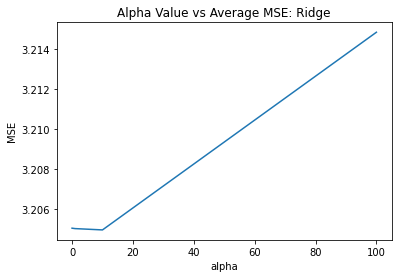

In [277]:
# Ridge regression cross validation using the own cross validation function
average_mses_harmUS_ridge = model_cv_mse(Ridge, X_train_harmUS_std, y_train_harmUS, X_test_harmUS_std, y_test_harmUS, ridge_alphas)
plot_mse(ridge_alphas, average_mses_harmUS_ridge, 'Ridge')

We observe that the optimal alpha is around the order of magnitude of 10. Next, I zoom into this range to identify the optimal lambda.

In [278]:
# Using RidgeCV from sklearn to get optimal alpha
ridge_harmUS, coef_harmUS_ridge, residual_harmUS_ridge = lasso_ridge_model_sklearncv(X_train_harmUS_std, X_test_harmUS_std, y_train_harmUS, y_test_harmUS, RidgeCV, np.arange(5,20,0.5), 5)

Optimal alpha: 8.5
Training MSE 3.181599022746396
R^2 0.7695805407404646
Test MSE 7.680858346470359


In [279]:
# this array shows the most highly correlated to least highly correlated features for Lasso
sorted_features_harmUS_RR = features_space_hu[(-abs(coef_harmUS_ridge)).argsort()]
sorted_features_harmUS_RR

array(['harmUS_prev_survey', 'prop_dem_pres', 'prop_25_HS',
       'poverty_proportion', 'log_population', 'prop_25_BS', 'science',
       'global', 'environment', 'climate', 'UE_Rate',
       'State Prop Employed in Extraction', 'prop_dem_house', 'mhi',
       'Extreme_Heat_Events', 'prop_18_24_HS', 'num_pp_log',
       'prop_18_24_BS'], dtype=object)

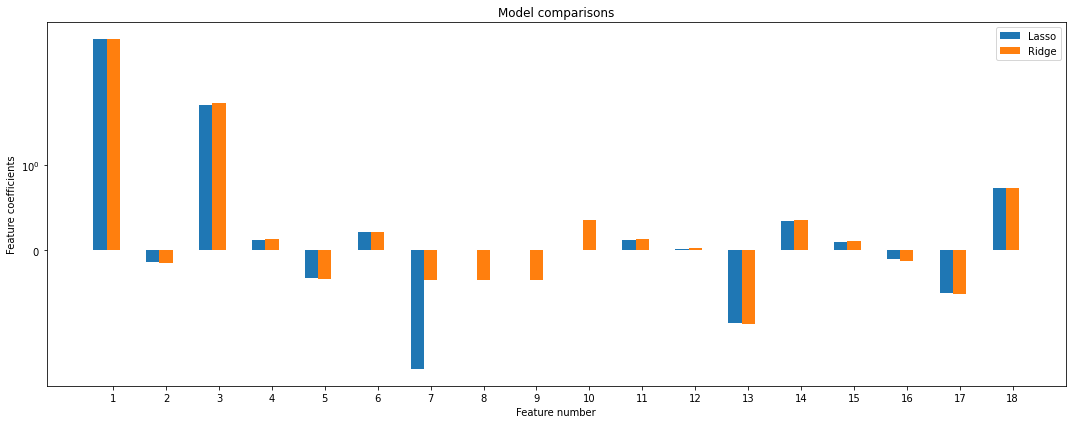

In [280]:
coef_harmUS = np.array([coef_harmUS_lasso, coef_harmUS_ridge])
visualize_coef(coef_harmUS)

## Model 3: KNN 


In [281]:
a,b = knn(X_train_harmUS_std, y_train_harmUS, X_test_harmUS_std, y_test_harmUS, np.arange(2,40,1))

optimal K: 16
R^2: 0.6198839528178762
Test MSE: 12.670880849249773
Train MSE: 3.8813940322661242


## Model 4: Decision Tree

In [282]:
param_dist = {'max_leaf_nodes': np.arange(3, 100,1), 'max_features': np.arange(2, 18,1), 'max_depth': np.arange(1, 10,1)}
regtree_harmUS, residual_harmUS_regtree = decision_tree(X_train_harmUS_std, y_train_harmUS, X_test_harmUS_std, y_test_harmUS, param_dist)

Train MSE: 2.7007779662400577
R^2: 0.6671340047910481
Test MSE: 11.095836114592553


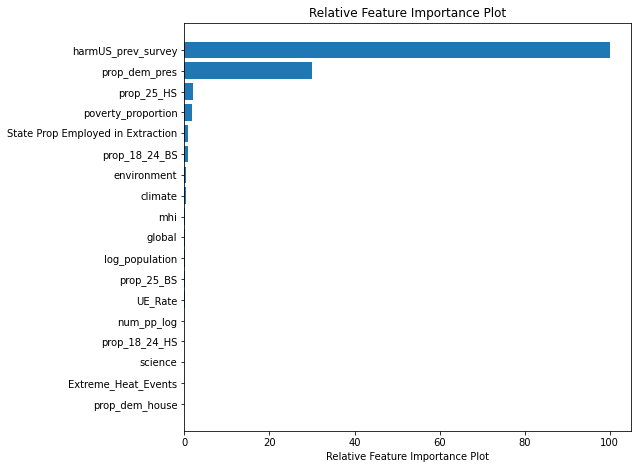

In [283]:
importance_plot(regtree_harmUS, X_train_harmUS_std)

## Model 5: Gradient Boosting

In [284]:
param_dist = {"learning_rate":np.linspace(0.1, 0.6,10), "subsample":np.linspace(0.5,1,10)}
gb_tree_harmUS, residual_harmUS_gb_tree = gradient_boosting(X_train_harmUS_std, y_train_harmUS, X_test_harmUS_std, y_test_harmUS, param_dist)

Train MSE: 1.4771319594230463
R^2: 0.7418053845150778
Test MSE: 8.606722165454435


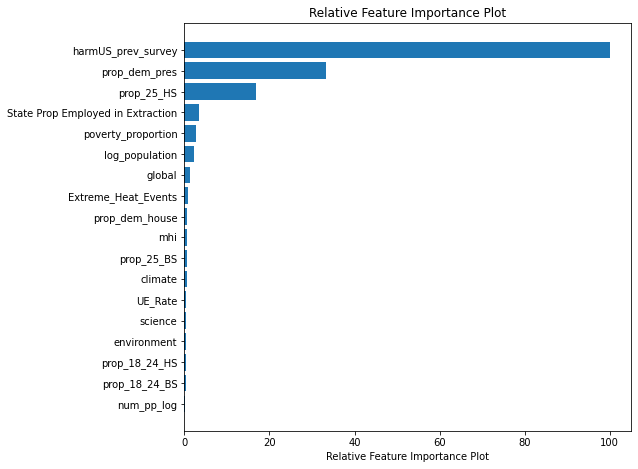

In [285]:
importance_plot(gb_tree_harmUS, X_train_harmUS_std)

Gradient boosting was the best model with the lowest test MSE of 8.6

## Visualizing Predicted vs Actual and Residuals

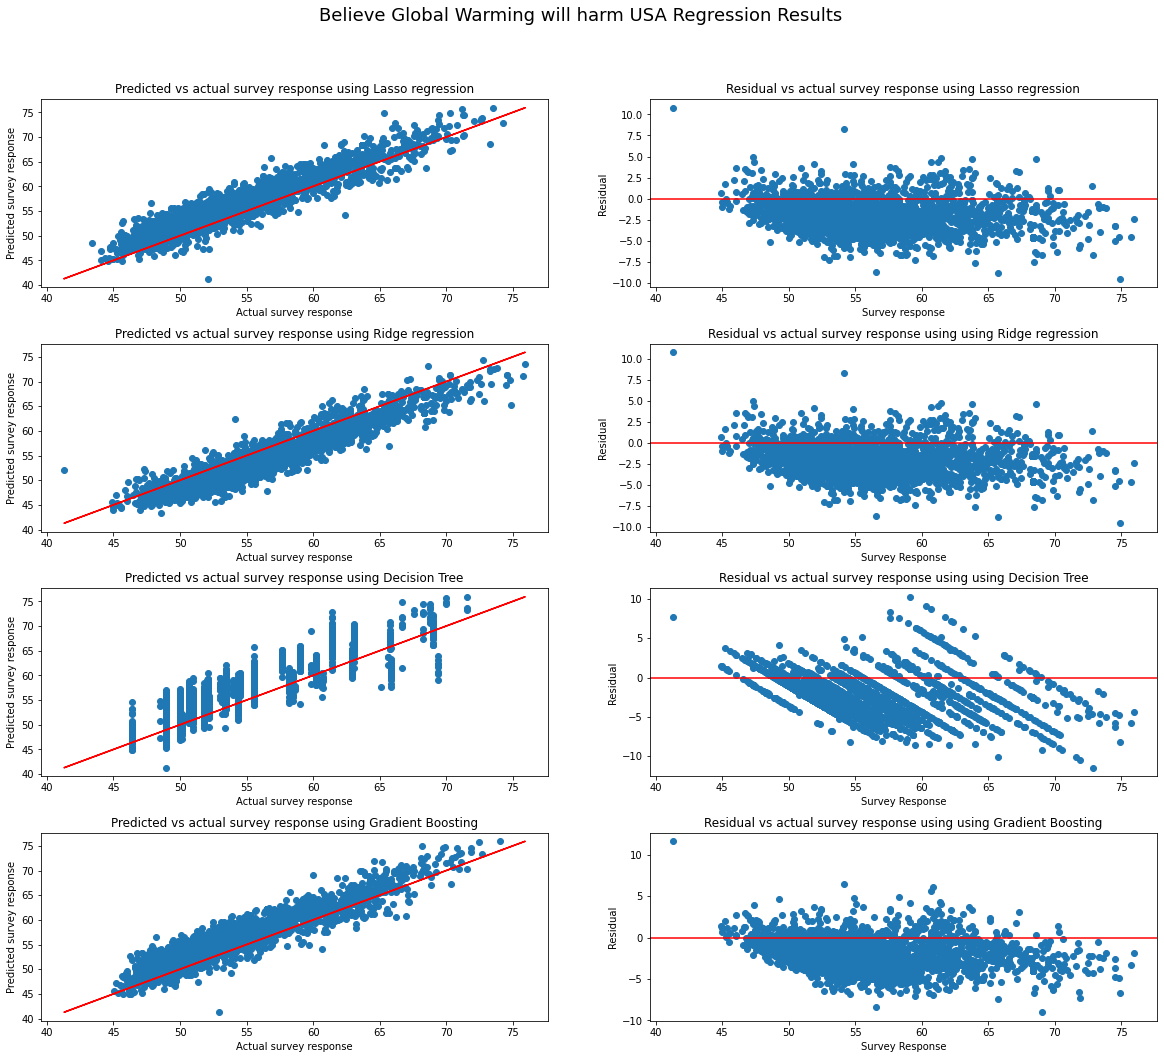

In [286]:
plotresiduals(residual_harmUS_lasso, residual_harmUS_ridge, residual_harmUS_regtree, residual_harmUS_gb_tree, y_test_harmUS, 'Believe Global Warming will harm USA')

# **Predicting Out of Sample Responses (2021)**

Note: I don't have all the data that I would normally use for 2022 predictions (i.e. Extreme heat data for 2020 has been delayed to be released, as has some updated census data due to Covid). However, I use the most recent data that I have for these prediction—for the most part (and for the improtant data like voting, prior year survey results) this is identical to the regular approach. **We used the best performing model for each question for this section BASED ON LOWEST TEST MSE**

In [288]:
huge_2019_prd = final_huge[['County', 'CO2limits_2020', 'worried_2020',
                        'harmUS_2020',
                        'prop_dem_house_18', 'prop_dem_pres_16', 
                        'Extreme_Heat_Events_19', 'UE_Rate_19',
                        'State Prop Employed in Extraction_2019',
                        'global 2019',	'science 2019',	'environment 2019',
                        'climate 2019', 'prop_18_24_HS_19', 'prop_18_24_BS_19', 
                        'prop_25_HS_19', 'prop_25_BS_19', 
                        'num_pp_2019_log', 'mhi_2019', 
                        'pop_2019_log', 'poverty_proportion_19']]
                        # used next earliest feature when 2020 not available

huge_2019_prd['Year'] = 2020

huge_2019_prd = huge_2019_prd.rename(columns={'CO2limits_2020': 'CO2limits_prev_survey',
                                      'worried_2020': 'worried_prev_survey', 
                                      'harmUS_2020':'harmUS_prev_survey', 
                                      'prop_dem_house_18': 'prop_dem_house',
                                      'prop_dem_pres_16': 'prop_dem_pres',
                                      'Extreme_Heat_Events_19': 'Extreme_Heat_Events',
                                      'UE_Rate_19': 'UE_Rate',
                                      'State Prop Employed in Extraction_2019': 'State Prop Employed in Extraction',
                                      'global 2019':'global',	
                                      'science 2019': 'science',	
                                      'environment 2019': 'environment',	
                                      'climate 2019': 'climate',
                                      'num_pp_2019_log': 'num_pp_log',
                                      'prop_18_24_HS_19':'prop_18_24_HS', 
                                      'prop_18_24_BS_19':'prop_18_24_BS', 
                                      'prop_25_HS_19':'prop_25_HS', 
                                      'prop_25_BS_19':'prop_25_BS',
                                      'mhi_2019':'mhi',  
                                      'pop_2019_log': 'log_population',
                                      'poverty_proportion_19': 'poverty_proportion'
                                      })

# drop NaN values instead of imputing
huge_2019_prd = huge_2019_prd.dropna()

X_predict_co2 = huge_2019_prd.drop(columns=['County', 'Year','worried_prev_survey', 'harmUS_prev_survey'])
X_predict_worried = huge_2019_prd.drop(columns=['County', 'Year', 'CO2limits_prev_survey',	'harmUS_prev_survey'])
X_predict_harmUS = huge_2019_prd.drop(columns=['County', 'Year', 'CO2limits_prev_survey',	'worried_prev_survey'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## Prediction Question 1: 2021 CO2 Limits

In [289]:
def get_X_stnd(X_train):
  """takes in a dataset and returns standardized form of these variables"""
  # Standardize the data
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_stnd = scaler.transform(X_train)
  X_train_stnd_df = pd.DataFrame(X_train_stnd, index=X_train.index, columns=X_train.columns)
  return X_train_stnd_df

In [290]:
X_predict_co2_std = get_X_stnd(X_predict_co2)

In [291]:
out_of_sample_co2 = gb_tree_co2.predict(X_predict_co2_std)

## Prediction Question 2: 2021 Worried About Global Warming

Lasso performed best, as evidenced in the Question 2 modeling section 

In [292]:
X_predict_worried_std = get_X_stnd(X_predict_worried)

In [293]:
out_of_sample_worried = lasso_worried.predict(X_predict_worried_std)

## Prediction Question 3: 2021 Harm USA

Gradient Boosting performed best, as evidenced in the Question 2 modeling section 

In [294]:
X_predict_harmUS_std = get_X_stnd(X_predict_harmUS)

In [295]:
out_of_sample_harmUS = gb_tree_harmUS.predict(X_predict_harmUS_std)

## Visualize Prediction Results. Titles at TOP of each graph.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

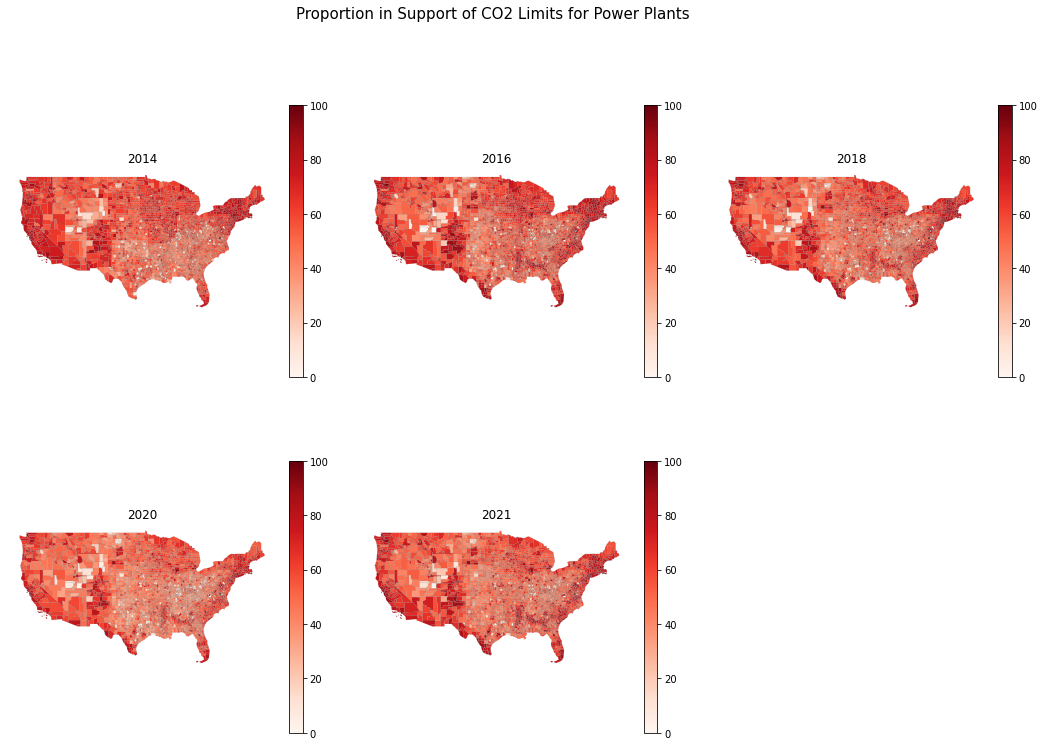

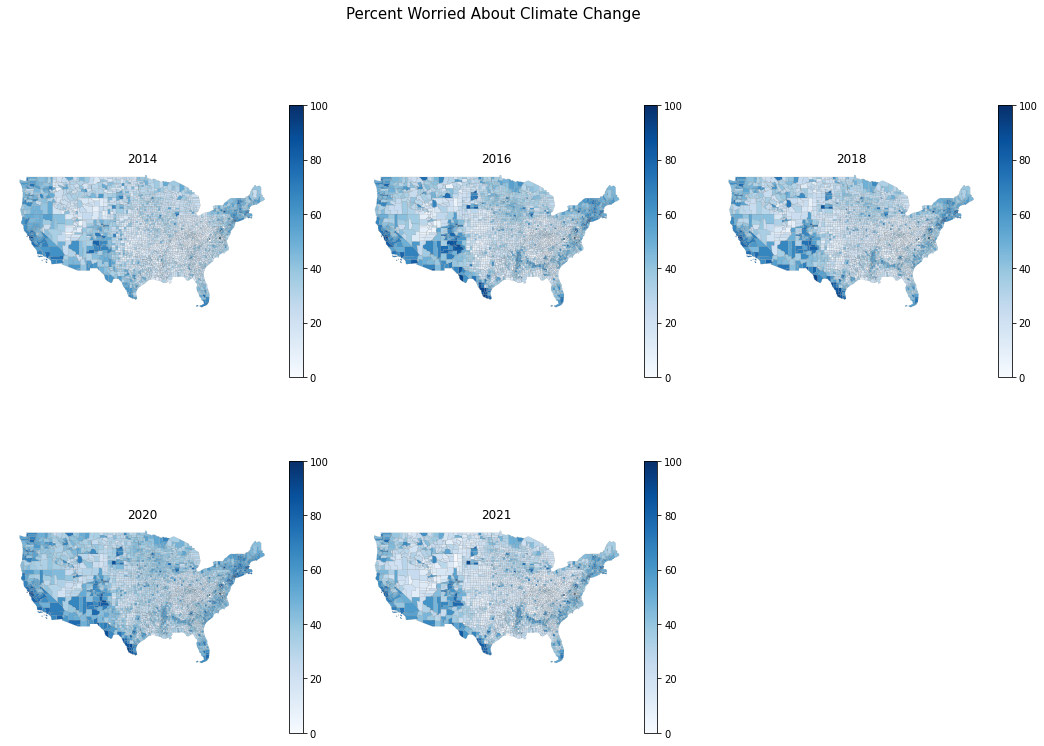

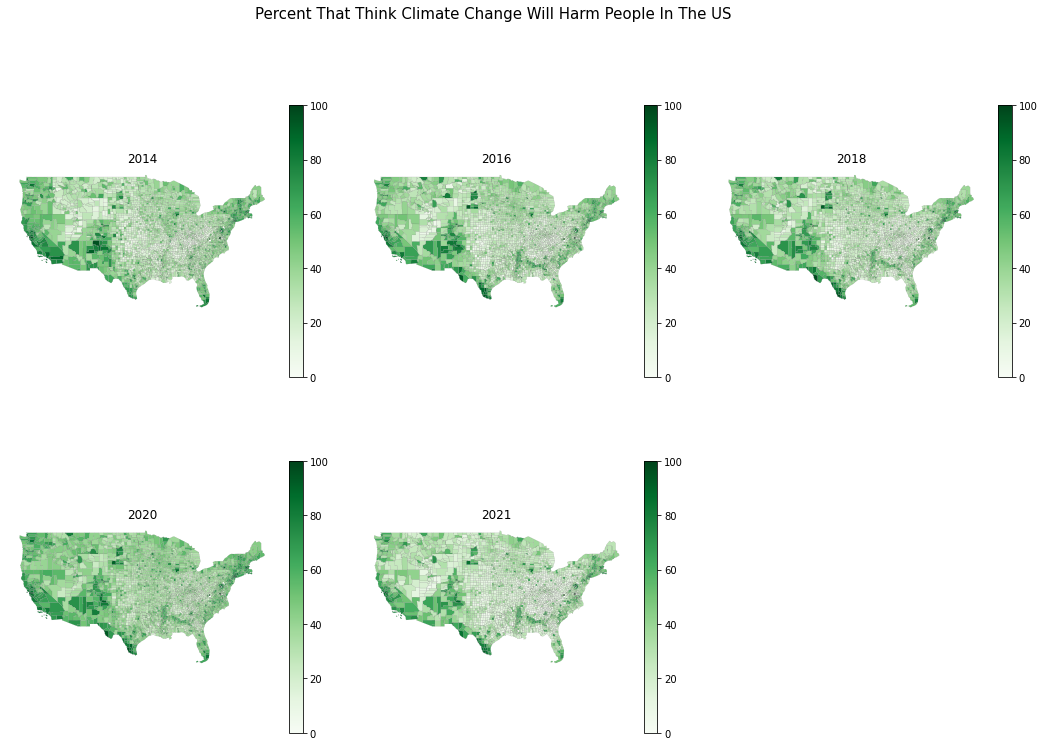

In [296]:
merge_geo = huge_2019_prd[['County']]
merge_geo["predict_CO2limits_2021"] = out_of_sample_co2
merge_geo["predict_worried_2021"] = out_of_sample_worried
merge_geo["predict_harmUS_2021"] = out_of_sample_harmUS
merge_geo.reset_index(drop=True)
merge_geo = pd.merge(merge_geo, final_huge_geo.drop_duplicates(subset=["County"]), how='left')

# floor predicted values at 0 (affects 71 counties)
# merge_geo.loc[merge_geo["predict_CO2limits_2022"] < 0, 'predict_CO2limits_2022'] = 0
merge_geo = GeoDataFrame(merge_geo)


def plot_feature_geo(col_name, pos, year, color):
    ax = plt.subplot(2, 3, pos)
    plt.xticks(rotation=90)
    plt.title(year)
    merge_geo.plot(column=col_name, cmap=color, linewidth=0.1, ax=ax, edgecolor=".4")
    bar_info = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=100))
    bar_info._A = []
    cbar = plt.colorbar(bar_info, fraction=0.046, pad=0.04)
    ax.axis("off")

def plot_all_geo(title, var, color):
    fig = plt.figure(figsize=(18, 12))
    plot_feature_geo(f"{var}_2014", 1, 2014, color)
    plot_feature_geo(f"{var}_2016", 2, 2016, color)
    plot_feature_geo(f"{var}_2018", 3, 2018, color)
    plot_feature_geo(f"{var}_2020", 4, 2020, color)
    plot_feature_geo(f"predict_{var}_2021", 5, 2021, color)
    fig.suptitle(title, fontsize=15)

plot_all_geo("Proportion in Support of CO2 Limits for Power Plants", "CO2limits", "Reds")
plot_all_geo("Percent Worried About Climate Change", "worried", "Blues")
plot_all_geo("Percent That Think Climate Change Will Harm People In The US", "harmUS", "Greens")

# **Interpretations and Conclusions**

This section includes
> the results (i.e. which models performed better and potential reasons why) <br>
> resource allocation implications (and bias) <br>
> limitations


## Model Results, Potential Reasons, and Bias:

**Discussing relative performance of models** <br>
KNN performed by far the worst consistently.  One reason for this could be the research described in the background, where similar events can impact climate beliefs differently based on one’s differently. So, as an example, high extreme events, high fossil fueled plants per county, and high unemployment in a Democratic country might increase support for climate regulation (i.e. CO2 limits), but in a Republican county, the exact same features might not increase support. KNN assumes that observations with largely similar feature values are similar, and that isn’t always the case with climate.

Ridge/Lasso: Lasso and ridge performed quite similarly—lasso usually performed only slightly better, which could reflect the fact that these 2 prediction problems require only a few features,, rather than the many features Ridge outputs, but the results were so close that I aren’t firm in this conclusion. This is probably more true for question 2, where Lasso performed the best, than for the other questions.
<br><br>
**Ensemble methods**: In general however, the non-parametric method (our ensemble method of gradient boosting), proved to be the best method. It was the best method for questions 1 and 3—non-parametric methods likely capture the nonlinearity better, and the power of crowds ability of gradient boosting proved advantageous. 
<br><br>
**Analyzing which feature were important** <br>
Across all models, but especially seen in the decision trees, I consistently see that prop_dem and previous year survey results are the most relevant features (worth noting that when I removed previous year survey results, the R^2 dropped to below 0.4). This could be due to two reasons: either climate change is still seen as largely a political issue and beliefs are hard to change, or the features I identified weren’t extremely relevant. Ideally, I would be able to retry this model with a wider range of data (i.e. EV adoption, solar on rooftop), but that data was not available for the scope, as discussed in the limitations section later.
<br><br>
**Hypothesizing was question 2 the worst performing (i.e. the best model performed the worst)?** <br>
One large takeaway from this section: it’s probably worth more exploration to improve the prediction of question 2 (worried). It was strange that the features performed quite worse on question 3 (harmUS) than the other questions: why is predicting if someone thinks climate will harm the US different from predicting their worry about climate change (i.e. connection between harm and worry seems clear). While this is pure conjecture, this could point to the more complex cognitive processes that go into being personally worried (climate cognitive dissonance is certainly thing—you can acknowledge climate change will harm US but then not be worried to avoid the stress of worry). Again, just a hypothesis
<br><br>

**Resource Allocation:**
What do the answers mean? What advice would you give a decision maker on the basis of your results? How might they allocate their resources differently with the results of your model? Why should the reader care about your results?

One objective was to be able to make YCOMM data accessible earlier using prediction models. Based on the results (we had lots of R^2 in the high 0.8), it seems that the results are pretty useful in predicting what the YCOMM data will end up being—we would feel comfortable advising a campaign decision maker to make a decision on this data. 
	With the data available at this date, the data can only predict 2021 results (which Yale doesn’t publish). I don’t have the full end-of-year 2021 data to predict for 2022. So, I will analyze the 2021 predictions to illustrate how the model can shape resource allocation (acknowledging that 2021 resource decisions have already been made). Understanding at what point in the year the feature data sources are updated would be a key next step in making sure that the model can provide insight into the future year as early as possible. 
From this map, there are a lot of recommendations I could make (and can definitely talk about more in q/a). In this section, I focus on 2 key recommendations:

> **More advertising resources to the midwest**  <br>
	First, across all three questions, I see a need for increased advertising resources in the midwest: while other parts of the country (especially west) continue to increase their “yes” responses, the Midwest falls: in fact, the model predicts less support in 2021 than in 2020 for all three questions in numerous regions throughout the midwest. Given the Midwest’s experience with agriculture and flooding, which are connected to climate change, I believe that increasing advertising funding to midwestern states would be beneficial in lifting these numbers. Additionally, the Midwest has an outsized electoral college/Senate influence, so prioritizing Midwestern voters on climate-issues would be helpful. Specifically, messaging should connect recent events in the midwest (i.e. flooding, crop losses) specifically to climate change.

> **Democrats in conservative states should lean into climate issues:** <br>
Additionally, in Florida and south Texas I predict high support for all three questions, despite these being conversative states. This means I see an opportunity for Democratic candidates in these states to lean into climate in their campaigns—climate change is an issue people care about in these regions, but Republicans won’t cater to. Focusing on an issue like support for CO2 limits on power plants is a relatively non-divisive issue that could help bring voters to the table on climate change.  

<br> 
**Bias**:  <br>
While I feel confident in the results, I would caution the decision maker about the bias of the model.
For question 1, the predictions are on average clear the value, but each prediction is usually 2-4 points off from the true value. For lower percentages I tend to overpredict more than for medium and high values. 
For question 2, I are under prediction, especially so for larger percentages, and I would urge extra skepticism with the results to this question because it was the worst performing model (out of the best performing models to questions 1-3). 
For question 3, the residual plots show that I are also underpredicing by 2-4 points. 

So in general, the predictions (on average) aren’t extremely far off.

## Limitations: 
There are limitations with the model that relate both to the resource allocation conclusions. 
<br><br>
**Polling vs voting**: <br>
First, I use polling data from Yale as the source of truth. However, what people say to pollsters can be different than their actual behavior and attitudes—this concept limits the model’s usefulness to campaigns, since their ultimate goal is to translate this data into votes. If people behave differently at the polls than what they say to pollsters, then using this data might not help a politician get as many votes as possible.
<br><br>
**Variation in target**: <br>
Reasons the results were flawed include variation in the target: for variables like CO2 limits, there was generally high support for it across the country—having less variation in the y variable (than if support fluctuated widely) probably made the prediction model worse, because I were fitting data with different features to somewhat similar y variables. If I had this opinion data dating back to 2008 or so, when climate change was even deprioritized to most voters, the model probably would have improved. 
<br><br>
**Data availability**:<br>
From a data perspective, since I tried to model for every county in the US (except Alaska), I could only use datasets available for every county over 2015-2020. This severely limited the type of data I could collect and led us to focus a lot on demographic data. Other data that might have been useful and more climate-specific, such as EV adoption or solar panels on roofs, was not available for each county. If a politician wanted to adopt the approach for a specific location (i.e. a state or region), I recommend taking advantage of the smaller scope to collect more environment/sustainability-specific data.
<br><br>
**Future changes in human thinking** <br>
At the same time, the model relies on past data, which limits its ability to respond to drastic future changes. For example, if a very successful messaging campaign or economic recession or other large change (i.e. the GOP changes its stance on climate) results in a significant change in public opinion, the predictive ability of the features (i.e. prop_dem) and model would not account for that. Essentially, since the model does not model a natural process (where you might assume is probably unchanging over time), I have to be wary of how human opinions (and what influences them) could change. However, the approach could be adapted so that the overall concept retains relevance. 
<br><br>